Загружаем необходимые для работы библиотеки (Pandas, Numpy ScikitLearn, Matplotlib - стандартный набор библиотек применяемых в Data Science) языка Python а так же включаем диррективу %matplotlib inline необходимую для отрбражения изображений построенных посредством библиотеки Matplotlib.

In [36]:
import math
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import minmax_scale
from sklearn import cluster
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as mlines
import matplotlib.collections as collections
import matplotlib.mlab as mlab
import shapefile
%matplotlib inline
import seaborn as sns

Замечание: в дальнейшем термин \verb'"класс"' используется в двух различных значениях
\begin{enumerate}
\item Концепция ООП программирования, широко используемая в большинстве современных языков программирования, служащая для объединения программного кода в некие семантически/логически/функционально связанные сущьности, и предоставляющая средства для оперирования с этими сущьностями.
\item Как класс в задачах классификации машинного обучения. В данном случае смысл термина класс близок к бытовому его восприятию (например классом в таком понимании является сорт цветка - роза, тюльпан, и т.д. тип траспортного средства - автомобиль, мотоцикл, самолёт и т.д.)
\end{enumerate}
Читаем источник данных (файл в формате .xlsx) с помощью метода read_excel библиотеки Pandas предазначенной для работы 
с данными, прежде всего для операций с DataFrames - основным способом представления данных используемым различным программным обеспечением в области Machine Learning / Data Science. Каждый лист Excel-я читаем отдельно
получая для каждого листа отдельный датафрейм.

In [37]:
excel_file = pd.ExcelFile('source_data.xlsx')

In [38]:
sheet0 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[0],
        skiprows=[0],
        header=1,
    )
sheet0 = sheet0[sheet0.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet0.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [39]:
sheet1 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[1],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet1 = sheet1[sheet1.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet1.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [40]:
sheet2 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[2],
        skiprows=[0, 1],
        header=1,
    )
sheet2 = sheet2[sheet2.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet2.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [41]:
sheet3 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[3],
        skiprows=[0, 1],
        header=1,
    )
sheet3 = sheet3[sheet3.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet3.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [42]:
sheet4 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[4],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet4 = sheet4[sheet4.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet4.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [43]:
sheet5 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[5],
        skiprows=[0, 1],
        header=1,
    )
sheet5 = sheet5[sheet5.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet5.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [44]:
sheet6 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[6],
        skiprows=[0, 1, 2, 3, 4],
        header=1,
    )
sheet6 = sheet6[sheet6.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet6.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [45]:
sheet7 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[7],
        skiprows=[0, 1, 2, 3],
        header=1,
    )
sheet7 = sheet7[sheet7.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet7.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [46]:
sheet8 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[8],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet8 = sheet8[sheet8.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet8.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [47]:
sheet9 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[9],
        skiprows=[0, 1, 2, 3],
        header=1,
    )
sheet9 = sheet9[sheet9.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet9.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [48]:
sheet10 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[10],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet10 = sheet10[sheet10.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet10.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [49]:
sheet11 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[11],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet11 = sheet11[sheet11.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet11.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [50]:
sheet12 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[12],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet12 = sheet12[sheet12.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet12.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [51]:
sheet13 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[13],
        skiprows=[0, 1],
        header=1,
    )
sheet13 = sheet13[sheet13.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet13.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [52]:
sheet14 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[14],
        skiprows=[0, 1],
        header=1,
    )
sheet14 = sheet14[sheet14.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet14.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [53]:
sheet15 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[15],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet15 = sheet15[sheet15.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet15.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [54]:
sheet16 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[16],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet16 = sheet16[sheet16.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet16.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [55]:
sheet17 = pd.read_excel('source_data_1.xlsx')
sheet17 = sheet17[sheet17.columns.drop(
    ['Unnamed: 11', 'ВНУТРЕННИЕ ЗАТРАТЫ НА НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ']
)]
sheet17.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

Для дальнейших операций объединяем полученные датафреймы в список, который в свою очередь состоит из подсписков 
содержащих собственно сам датафрейм и ассоциированное с ним название максимально соответствующее русскому названию
экселевского листа. В дальнейшем, эти названия станут именами столбцов датафреймов содержащих информацию разбитую по годам.

In [56]:
list_of_df = []
list_of_df.append([sheet0, 'OrganizationNum'])
list_of_df.append([sheet1, 'StaffNum'])
list_of_df.append([sheet2, 'PhDNum'])
list_of_df.append([sheet3, 'Ph.DNum'])
list_of_df.append([sheet4, 'PostgraduateNum'])
list_of_df.append([sheet5, 'DoctoralNum'])
list_of_df.append([sheet6, 'PatentNum'])
list_of_df.append([sheet7, 'UsefulPatentsNum'])
list_of_df.append([sheet8, 'CreatedTechnologyNum'])
list_of_df.append([sheet9, 'UsefulTechnologyNum'])
list_of_df.append([sheet10, 'ProportionOfOrganizationsToUseInternet'])
list_of_df.append([sheet11, 'ProportionOfInnovativeOrgainzations'])
list_of_df.append([sheet12, 'TechnologicalInnovationsCost'])
list_of_df.append([sheet13, 'AmountOfInnovativeProducts'])
list_of_df.append([sheet14, 'ProportionOfInnovativeProducts'])
list_of_df.append([sheet15, 'Population'])
list_of_df.append([sheet16, 'GrossProduct'])
list_of_df.append([sheet17, 'InternalCosts'])

Отдельно сохраняем соответствующие русскоязычные названия в виде списка, в том же порядке в котором идут датафреймы в списке датафреймов.

In [57]:
features_names_ru = [
    'ОРГАНИЗАЦИИ, ВЫПОЛНЯЮЩИЕ НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ',
    'численность персонала без ученых степеней, занятых НИОКР',
    'Численность исследователей, имеющих ученую степень,\n'
    'по субъектам Российской Федерации показатель\n'
    'кандидата наук- человек',
    'Численность исследователей, имеющих ученую степень,\n'
    'по субъектам Российской Федерации показатель\n'
    'доктора наук - человек',
    'Численность аспирантов по субъектам Российской Федерации - человек',
    'Численность докторантов по субъектам Российской Федерации 0человек',
    'КОЛИЧЕСТВО ПАТЕНТОВ, ВЫДАННЫХ НА ИЗОБРЕТЕНИЯ',
    'КОЛИЧЕСТВО ПАТЕНТОВ, ВЫДАННЫХ НА ПОЛЕЗНЫЕ МОДЕЛИ',
    'РАЗРАБОТАННЫЕ ПЕРЕДОВЫЕ ПРОИЗВОДСТВЕННЫЕ ТЕХНОЛОГИИ\n'
    'ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ',
    'ИСПОЛЬЗУЕМЫЕ ПЕРЕДОВЫЕ ПРОИЗВОДСТВЕННЫЕ ТЕХНОЛОГИИ\n'
    'ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ',
    'УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ ИСПОЛЬЗОВАВШИХ  ИНТЕРНЕТ\n'
    'ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ\n'
    '(В ПРОЦЕНТАХ ОТ ОБЩЕГО ЧИСЛА ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ\n'
    'СООТВЕТСТВУЮЩЕГО СУБЪЕКТА РОССИЙСКОЙ ФЕДЕРАЦИИ)',
    'ИННОВАЦИОННАЯ АКТИВНОСТЬ ОРГАНИЗАЦИЙ\n'
    '(УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ, ОСУЩЕСТВЛЯВШИХ ТЕХНОЛОГИЧЕСКИЕ,\n'
    'ОРГАНИЗАЦИОННЫЕ, МАРКЕТИНГОВЫЕ ИННОВАЦИИ В ОТЧЕТНОМ ГОДУ,\n'
    'В ОБЩЕМ ЧИСЛЕ ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ ( %)',
    'ЗАТРАТЫ НА ТЕХНОЛОГИЧЕСКИЕ ИННОВАЦИИ ОРГАНИЗАЦИЙ (руб)',
    'ОБЪЕМ ИННОВАЦИОННЫХ ТОВАРОВ, РАБОТ, УСЛУГ (МИЛЛИОНОВ РУБЛЕЙ)',
    'УДЕЛЬНЫЙ ВЕС ИННОВАЦИОННЫХ ТОВАРОВ, РАБОТ, УСЛУГ\n'
    'В ОБЩЕМ ОБЪЕМЕ ОТГРУЖЕННЫХ ТОВАРОВ, ВЫПОЛНЕННЫХ РАБОТ,\n'
    'УСЛУГ, ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ (%)',
    'численность населения по субъектам российской федерации\n'
    '(оценка на конец года; тысяч человек)',
    'Валовой региональный продукт по субъектам Российской Федерации\n'
    '(в текущих  ценах;миллионов рублей)',
    'ВНУТРЕННИЕ ЗАТРАТЫ НА НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ\n'
    'миллионов рублей'
]

Избаляемся от строчки \verb'"ВСЕГО"' в каждом датафрейме из списка.

In [58]:
for i, df_container in enumerate(list_of_df):
    df = df_container[0]
    list_of_df[i][0] = df[df.Region != 'ВСЕГО']  

In [59]:
'''
for df_container in list_of_df:
    df = df_container[0]
    for substitution_pair in (
        ('Кабардино0Балкарская Республика', 'Кабардино-Балкарская Республика'),
        ('Ханты0Мансийский автономный округ - Югра', 'Ханты-Мансийский автономный округ - Югра'),
        ('Карачаево0Черкесская Республика', 'Карачаево-Черкесская Республика'),
        ('Санкт0Петербург', 'Санкт-Петербург'),
        ('Ямало0Ненецкий автономный округ', 'Ямало-Ненецкий автономный округ'),
        ('Ханты0Мансийский автономный округ 0 Югра', 'Ханты-Мансийский автономный округ - Югра'),
        ('Республика Северная Осетия  Алания', 'Республика Северная Осетия - Алания'),
        ('Республика Северная Осетия 0 Алания', 'Республика Северная Осетия - Алания')
    ):
        incorrect_name, correct_name = substitution_pair
        df.loc[df['Region'] == incorrect_name, 'Region'] = correct_name
'''

"\nfor df_container in list_of_df:\n    df = df_container[0]\n    for substitution_pair in (\n        ('Кабардино0Балкарская Республика', 'Кабардино-Балкарская Республика'),\n        ('Ханты0Мансийский автономный округ - Югра', 'Ханты-Мансийский автономный округ - Югра'),\n        ('Карачаево0Черкесская Республика', 'Карачаево-Черкесская Республика'),\n        ('Санкт0Петербург', 'Санкт-Петербург'),\n        ('Ямало0Ненецкий автономный округ', 'Ямало-Ненецкий автономный округ'),\n        ('Ханты0Мансийский автономный округ 0 Югра', 'Ханты-Мансийский автономный округ - Югра'),\n        ('Республика Северная Осетия  Алания', 'Республика Северная Осетия - Алания'),\n        ('Республика Северная Осетия 0 Алания', 'Республика Северная Осетия - Алания')\n    ):\n        incorrect_name, correct_name = substitution_pair\n        df.loc[df['Region'] == incorrect_name, 'Region'] = correct_name\n"

In [60]:
for df_container in list_of_df:
    df = df_container[0]
    for substitution_pair in (
        ('Кабардино0Балкарская Республика', 'Кабардино-Балкарская Республика'),
        ('Ханты-Мансийский автономный округ - Югра', 'Ханты-Мансийский автономный округ'),
        ('Ханты0Мансийский автономный округ - Югра', 'Ханты-Мансийский автономный округ'),
        ('Карачаево0Черкесская Республика', 'Карачаево-Черкесская Республика'),
        ('Санкт0Петербург', 'Санкт-Петербург'),
        ('Ямало0Ненецкий автономный округ', 'Ямало-Ненецкий автономный округ'),
        ('Ханты0Мансийский автономный округ 0 Югра', 'Ханты-Мансийский автономный округ'),
        ('Республика Северная Осетия - Алания', 'Республика Северная Осетия'),
        ('Республика Северная Осетия  Алания', 'Республика Северная Осетия'),
        ('Республика Северная Осетия 0 Алания', 'Республика Северная Осетия')
    ):
        incorrect_name, correct_name = substitution_pair
        df.loc[df['Region'] == incorrect_name, 'Region'] = correct_name

Создаём список \verb'"годовых"' датафреймов, каждый из которых содержит полный список показателей (features в терминах Data Science) для каждого региона (Столбцы - показатели, строки - регионы). Используем стандартную операцию Pandas-овских датафреймов merge (для объединения \verb'"показательных"' датафреймов в \verb'"годовые"'). В качестве столбца используемого для объединения используем столбец \verb'"Region"'. Т.е. объединяем все показатели по данному региону за год. Необходимо отметить, что не на все регионы есть данные по всем показателям, поэтому в итоге мы получаем полный набор показателей только для 77 регионов. Для шести регионов: Ханты-Мансийского автономног округа, Северной Осетии, Ямало-Ненецкого автономного округа, Карачаево-Черкесской Республике, Кабардино-Балкарской Республики, Санкт-Петербурга - сведения о некоторых показателях отсутсвуют, либо имеються некоректные данные того или иного типа (несовпадение названий регионов в разных датафреймах и т.д.)

In [61]:
merged_df_list = []
for year in range(2005, 2015):
    result_df, feature_name = list_of_df[0]
    result_df = result_df[['Region', year]]
    result_df = result_df.rename_axis({year: feature_name} ,axis='columns')
    
    merged_df_list.append(result_df)
    
    for i in range(1, 18):
        merged_df, feature_name = list_of_df[i]
        merged_df = merged_df[['Region', year]]
        merged_df = merged_df.rename_axis({year: feature_name} ,axis='columns')
        merged_df_list[year - 2005] = pd.merge(
            merged_df_list[year - 2005],
            merged_df,
            on='Region')

In [62]:
merged_df_list[0].loc[36, :]

Region                                    Республика Ингушетия
OrganizationNum                                              1
StaffNum                                                    11
PhDNum                                                       7
Ph.DNum                                                      0
PostgraduateNum                                              0
DoctoralNum                                                  0
PatentNum                                                    0
UsefulPatentsNum                                             0
CreatedTechnologyNum                                         0
UsefulTechnologyNum                                          0
ProportionOfOrganizationsToUseInternet                    27.7
ProportionOfInnovativeOrgainzations                          0
TechnologicalInnovationsCost                                 0
AmountOfInnovativeProducts                                   0
ProportionOfInnovativeProducts                         

In [63]:
for region_name in merged_df_list[0].loc[:, 'Region']:
    if 'ченская' in region_name:
        print(region_name)
print(merged_df_list[0].loc[merged_df_list[0]['Region'] == 'Чеченская Республика', :])

Чеченская Республика
                  Region  OrganizationNum  StaffNum  PhDNum  Ph.DNum  \
40  Чеченская Республика                5        55      82       39   

   PostgraduateNum  DoctoralNum  PatentNum  UsefulPatentsNum  \
40               -            0          1                 0   

    CreatedTechnologyNum  UsefulTechnologyNum  \
40                     0                    0   

    ProportionOfOrganizationsToUseInternet  \
40                                     0.0   

   ProportionOfInnovativeOrgainzations TechnologicalInnovationsCost  \
40                                   0                            0   

   AmountOfInnovativeProducts ProportionOfInnovativeProducts  Population  \
40                          0                              0        1163   

    GrossProduct InternalCosts  
40       22898.9          15,2  


Вспомогательные функции для корректировки некорректно представленных значений (например содержащих в качестве десятичного разделителя запятую) в датафреймах.

In [64]:
def str_to_num(s):
    if isinstance(s, str):
        s = s.replace(',', '.')
        s1 = s.replace(',', '')
        if s1.isdigit():
            return float(s)
    return s

In [65]:
def detect_minus(x):
    if x == '-':
        print(x)
        return True
    return False

Импортируем стандартный класс библиотеки ScikitLearn для приведения значений к одному и тому же масштабу. Создаём экземпляр этого класса.

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler = MinMaxScaler()

Корректируем вручную одно из неправильных значений, а ко всему остальному применяем функции коррктировки.

In [68]:
print(merged_df_list[0].loc[36, 'PostgraduateNum'])
merged_df_list[0].loc[merged_df_list[0]['Region'] == 'Республика Ингушетия', 'PostgraduateNum'] = 0

0


In [69]:
#merged_df_list[0].set_value(36, 'PostgraduateNum', 0)
merged_df_dict = {}
for i in range(0, 10):
    prepared_df = merged_df_list[i].applymap(str_to_num)
    prepared_df = prepared_df.applymap(lambda x: 0.0 if x in ['-', '0)'] else x)
    merged_df_dict[i + 2005] = prepared_df   

Объединяем список \verb'"годовых"' датафреймов в один датафрейм с иеррархическим индексом \verb'"Год/Регион"'. В дальнейшем будем производить кластеризацию используя именно этот датафрейм. Кластер в общем случае объединяет \verb'"в чём то схожие"' регионы, причём кластер при этом имеет временную (ударение на \verb'"у"') проятжённость. Т.е. каждый кластер простирается от 2005-го года до 2014-го. И один и тот же регион в разные годы может принадлежать к различным кластерам (например в 2005 - к \verb'"первому"', в 2006 - ко \verb'"второму"', а в остальные годы - к \verb'"четвёртому"') а может и всё время оставаться в одном и том же кластере. 

In [70]:
hier_concatenated_df = pd.concat(merged_df_dict, names=['Year', 'Region'])

In [71]:
hier_concatenated_df = hier_concatenated_df.applymap(str_to_num)
hier_concatenated_df = hier_concatenated_df.applymap(
    lambda x: 0.0 if x in ['-', '0)'] else x
)

Корректируем вручную ещё два неверных значения.

In [72]:
#print(hier_concatenated_df.loc[(2014, 41), 'GrossProduct'])
#hier_concatenated_df.loc[(2014, 41), 'GrossProduct'] = 1671397.10

In [73]:
#print(hier_concatenated_df.loc[(2014, 8), 'GrossProduct'])
#hier_concatenated_df.loc[(2014, 8), 'GrossProduct'] = 395700.10

In [74]:
print(hier_concatenated_df[hier_concatenated_df.loc[:, 'GrossProduct'] == '1.671.397.1.6'])
hier_concatenated_df.loc[hier_concatenated_df.loc[:, 'GrossProduct'] == '1.671.397.1.6', 'GrossProduct'] = 1671397.10
hier_concatenated_df.loc[hier_concatenated_df.loc[:, 'GrossProduct'] == '395.700.1', 'GrossProduct'] = 395700.10
print()
print(hier_concatenated_df[hier_concatenated_df.loc[:, 'GrossProduct'] == 1671397.10])

                           Region  OrganizationNum  StaffNum  PhDNum  Ph.DNum  \
Year Region                                                                     
2014 45      Республика Татарстан              114      4994    1255      331   

             PostgraduateNum  DoctoralNum  PatentNum  UsefulPatentsNum  \
Year Region                                                              
2014 45               3603.0        105.0      781.0               832   

             CreatedTechnologyNum  UsefulTechnologyNum  \
Year Region                                              
2014 45                        37                 6025   

             ProportionOfOrganizationsToUseInternet  \
Year Region                                           
2014 45                                        95.1   

            ProportionOfInnovativeOrgainzations TechnologicalInnovationsCost  \
Year Region                                                                    
2014 45                         

In [75]:
droped_regions_hier_concatenated_df = hier_concatenated_df[
    hier_concatenated_df.columns.drop('Region')
]

Приводим к единому масштабу, используя ранее созданный экземпляр класса MinMaxScaler.

In [76]:
scaled_with_dropped_regions_hier_concantenated_df = pd.DataFrame(
        scaler.fit_transform(droped_regions_hier_concatenated_df),
        columns=droped_regions_hier_concatenated_df.columns
    )

Алгоритмы машинного обучения в библиотеке ScikitLearn оформлены в виде классов, получающих на входе (при создании экземпляра класса) параметры  определяюще работу соответствующего алгоритма. Далее при вызове метода fit созданный экземпляр класса получает значения используемые для обучения в виде массивов библиотеки Numpy.
Извлекаем из датафрейма соответствующий массив Numpy просто обращаясь к полю датафрейма values.
\\В качестве алгоритма класстеризации используем MeanShift \cite{litlink2} \cite{litlink5}.
\\Для неформального понимания того как он работает рассмотрим самый простой случай. Пусть у нас есть некий набор точек в одномерном пространстве, т.е. попросту говоря на прямой. Набор точек произвольный, единственное ограничение налагаемое на него - конечное количество точек. Понятно, что в общем случае где то точки могут быть расположены чаще (более плотно), где то - реже (менее плотно). Таких уплотнений в общем случае может быть несколько, и интуитивно понятно, что для каждого такого уплотнения можно найти центр, и вычислить его координаты (а координат у нас в рассматриваемом случае одна). Понятно, что в частном случае равномерно расположенных точек в качестве центра можно взять просто среднее арифметическое координат точек (расстояний от 0) - центр масс.
Для наглядности нарисуем набор точек удовлятворящий сформулированным требованиям.

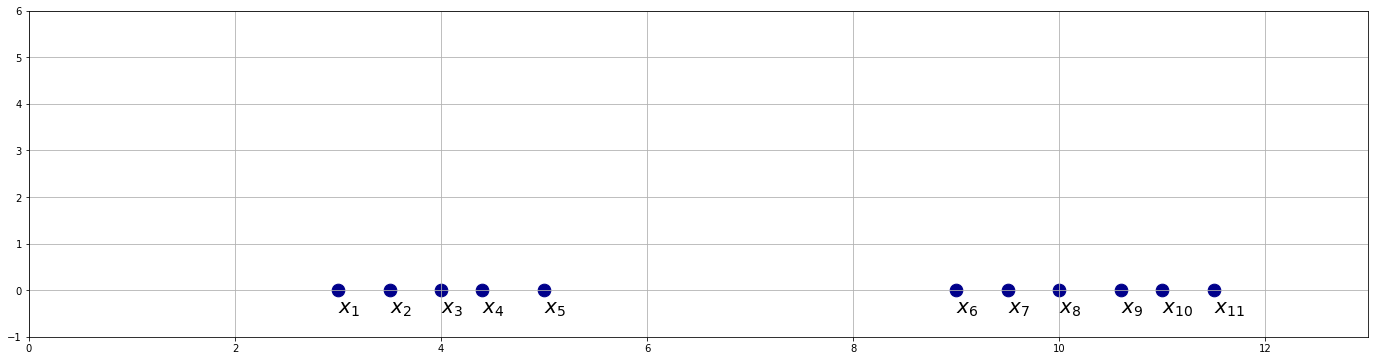

In [77]:
mean_shift_figure = plt.figure(figsize=(24, 6))
mean_shift_axes = mean_shift_figure.add_subplot(111)
x_array = np.array([3, 3.5, 4, 4.4, 5, 9, 9.5, 10, 10.6, 11, 11.5])
y_array = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
mean_shift_axes.scatter(x_array, y_array, marker='o', s=160, color='darkblue')
for i, x in enumerate(x_array):
    mean_shift_axes.text(x, -0.5, "$x_{%s}$" % str(i + 1), fontsize=20)
mean_shift_axes.set_xlim(0, 13)
mean_shift_axes.set_ylim(-1, 6)
mean_shift_axes.grid()
plt.show()

\\Далее мы принимаем следующее утверждение: Центры \verb'"уплотнений"' и есть центры кластеров, а точки входящие в данное \verb'"уплотнение"' относяться к одному кластеру. Интуитивно понятно, что если точки где то расположены более тесно, то их можно считать в чём то близкими. Тут уже можно сделать первое формальное уточнение. Что означает \verb'"относящиеся к данному уплотнению"'? Очевидно это те точки расстояние от которых до центра данного уплотнения меньше чем до центра любого другого уплотнения.
\\Теперь нам надо как то превратить неформальный термин \verb'"уплотнение"' который не взвесишь и не измеришь в что-то что мы можем посчитать, сравнить и т.д. Приведём цепочку математически нестрогих, но достаточно наглядныхх построений которые подведут к основной идее того как это сделать.
\\Во первых раз мы хотим как то измерить эту самую \verb'"степень уплотнённости"', мы должны поставить в соответствие этой самой \verb'"степени уплотнённости"' некое число. И если где-то точки расположены более плотно то там в этом самом \verb'"где-то"' это число должно быть больше чем там где точки расположены менее плотно. Т.е. переходя всё таки к математической формулировке без которой нам таки или иначе не обойтись: мы хотим ввести некоторую функцию от \verb'"где-то"' которая ставит в соответствие этому \verb'"где-то"' некое число показывающее \verb'"степень уплотнённости"'. Уточняем наше определение дальше. Что такое \verb'"где-то"'? Это координаты точки, в случае одного измерения - просто одно число $x$ - расстояние от начала координат, в случае двух измерений - $(x, y)$ (или $(x_1, x_2)$ если угодно) в случае 3-ёх измерений $(x, y, z)$ или $(x_i, x_2, x_3)$ и так далее. А что такое \verb'"степень уплотнённости"'? Собственно само слово \verb'"плотность"' уже содержит в себе ответ. В физике \verb'"плотность'" - вполне определённый термин - отношение массы заключённой в каком-то объёме к этому самомоу объёму. Ну или в более обобщённом виде (и более строго) - количество чего-то заключенного в каком-то замкнутой области $n$-мерного пространства к $n$-мерному обёму этой области. В случае опять же одного измерения $n$-мерный объём - это просто длинна (измеряемая, например в метрах), в случае двух измерений - площадь (т.е. метры квадратные), в случае трёх - привычный нам обычный трёхмерный объём (измеряемый, например в литрах или метрах кубических), в случае 4-ёх измерений - некий гиперобём 4-й степени (т.е. имеющий размерность ${\mbox{м}}^4$) и так далее.
\\Пойдём дальше по пути наибольшей наглядности и интуитивной понятности, и ещё больше упростим ситуацию. Возмём начало координат т.е. точку с координатой $0$ в случае одного измерения или $(0, 0)$ в случае двух измерений. Более \verb'"высокомерные"' случаи нам, для общего понимания, рассматривать нет необходимости. Измерим плотность точек которые нам необходимо прокластеризовать \verb'"вокруг"' начала координат. В случае одного измерения, возмём отрезок длинны $1$ с центром в начале координат,  в случае двух измерений - возьмём квадрат со стороной длинны $1$, стороны которого параллельны осям координат, и центром в начале координат (слово \verb'"вокруг"' пока оставим, хотя потом мы к нему вернёмся). Определим очень простую функцию. Пусть она равна 1 если произвольная точка попадает \verb'"внутрь"' нашего отрезка или квадрата, иначе пусть она равна нулю. В общем случае (для $n$ измерений) наша функция запишется так.
$$
\phi(u) = \left\lbrace
            \begin{aligned}
            1 && \; |u_j| \le \frac{1}{2} && \; j = 1\ldots n \\
            0 && \; \mbox{иначе} &&
           \end{aligned}
          \right.
$$

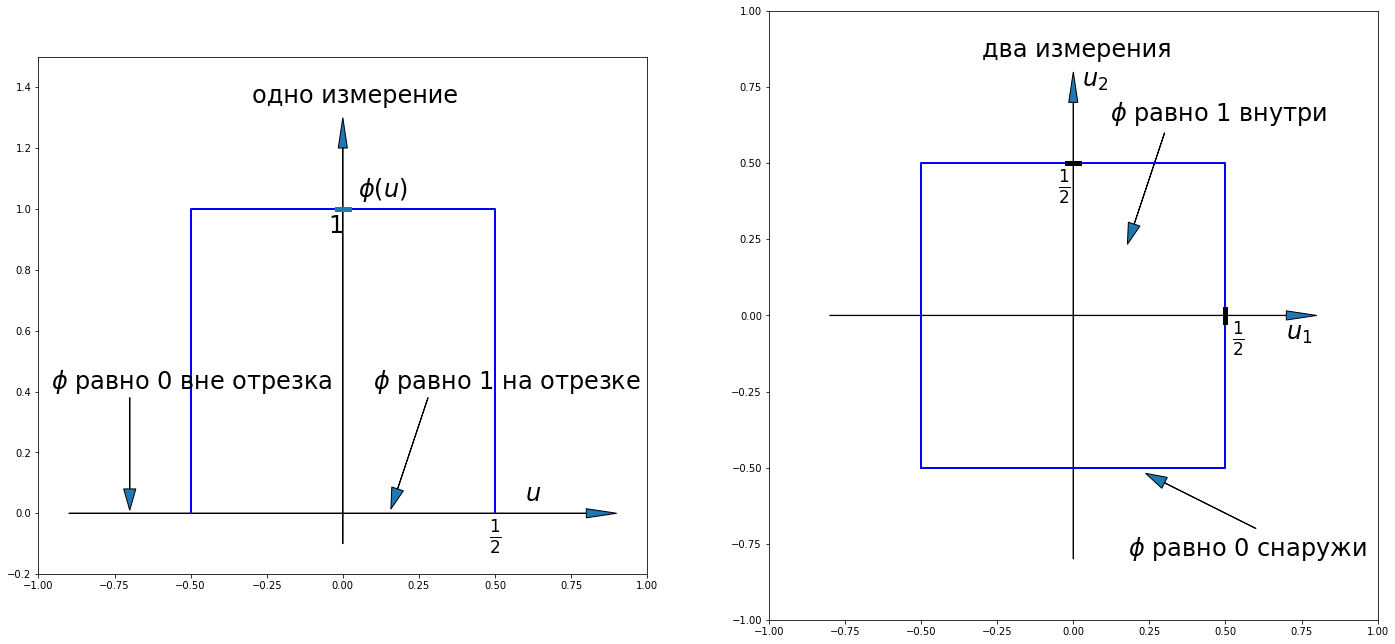

In [78]:
window_func_figure = plt.figure(figsize=(24, 12))
window_1_axes = window_func_figure.add_subplot(121)
window_2_axes = window_func_figure.add_subplot(122)

window_1_axes.set_xlim(-1, 1)
window_1_axes.set_ylim(-0.2, 1.5)
window_1_axes.set_aspect('equal')
window_1_axes.plot((-0.5, -0.5, 0.5, 0.5), (0, 1, 1, 0), color='blue', linewidth=2)
window_1_axes.arrow(-0.9, 0, 1.7, 0, head_width=0.03, head_length=0.1)
window_1_axes.arrow(0, -0.1, 0, 1.3, head_width=0.03, head_length=0.1)
window_1_axes.plot((-0.02, 0.02), (1, 1), linewidth=5)
window_1_axes.text(-0.05, 0.92, "$1$", fontsize=24)
window_1_axes.text(0.48, -0.1, "$\\frac{1}{2}$", fontsize=24)
window_1_axes.text(0.05, 1.04, "$\phi(u)$", fontsize=24)
window_1_axes.text(0.6, 0.04, "$u$", fontsize=24)
window_1_axes.arrow(0.28, 0.38, -0.1, -0.3, head_width=0.04, head_length=0.07)
window_1_axes.text(0.10, 0.41, "$\phi$ равно 1 на отрезке", fontsize=24)
window_1_axes.arrow(-0.7, 0.38, 0.0, -0.3, head_width=0.04, head_length=0.07)
window_1_axes.text(-0.96, 0.41, "$\phi$ равно 0 вне отрезка", fontsize=24)
window_1_axes.text(-0.3, 1.35, "одно измерение", fontsize=24)

window_2_axes.set_xlim(-1, 1)
window_2_axes.set_ylim(-1, 1)
window_2_axes.set_aspect('equal')
window_2_axes.plot((-0.5, -0.5, 0.5, 0.5, -0.5), (-0.5, 0.5, 0.5, -0.5, -0.5), color='blue', linewidth=2)
window_2_axes.arrow(-0.8, 0, 1.5, 0, head_width=0.03, head_length=0.1)
window_2_axes.text(0.52, -0.1, "$\\frac{1}{2}$", fontsize=24)
window_2_axes.text(0.7, -0.08, "$u_1$", fontsize=24)
window_2_axes.arrow(0, -0.8, 0, 1.5, head_width=0.03, head_length=0.1)
window_2_axes.text(-0.05, 0.4, "$\\frac{1}{2}$", fontsize=24)
window_2_axes.text(0.03, 0.75, "$u_2$", fontsize=24)
window_2_axes.plot((0.5, 0.5), (-0.02, 0.02), linewidth=5, color="black")
window_2_axes.plot((-0.02, 0.02), (0.5, 0.5), linewidth=5, color="black")
window_2_axes.arrow(0.3, 0.6, -0.1, -0.3, head_width=0.04, head_length=0.07)
window_2_axes.text(0.12, 0.64, "$\phi$ равно 1 внутри", fontsize=24)
window_2_axes.arrow(0.6, -0.7, -0.3, 0.15, head_width=0.04, head_length=0.07)
window_2_axes.text(0.18, -0.79, "$\phi$ равно 0 снаружи", fontsize=24)
window_2_axes.text(-0.3, 0.85, "два измерения", fontsize=24)
plt.show()

\\Теперь возмём для наглядности, произвольную двумерную точку $x$ c координатами $(x_1, x_2)$. Пусть она является центром квадрата с длинной сторон $h$.  Тогда для любой точки $x_i$, принадлежащей множеству точек $x_1, x_2, \ldots , x_N$ которые мы хотим прокластеризоварь, имеющей координаты $(x_{1i}, x_{2i})$ выполняется соотношение:
$$
\phi\left(\frac{x - x_i}{h}\right) = \left\lbrace
            \begin{aligned}
            1 && \; |x_j - x_{ij}| \le \frac{h}{2} && \; j = 1\ldots n \\
            0 && \; \mbox{иначе} &&
           \end{aligned}
          \right.
$$
где $n$ количество координат (измерений), это число не надо путать с $N$ - количеством точек которые надо прокластеризовать.

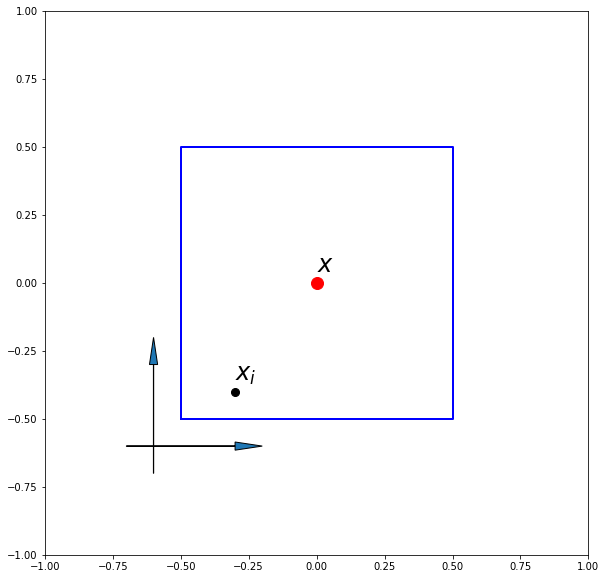

In [79]:
window_func_figure = plt.figure(figsize=(10, 10))
window_2_axes = window_func_figure.add_subplot(111)
window_2_axes.set_xlim(-1, 1)
window_2_axes.set_ylim(-1, 1)
window_2_axes.set_aspect('equal')
window_2_axes.plot((-0.5, -0.5, 0.5, 0.5, -0.5), (-0.5, 0.5, 0.5, -0.5, -0.5), color='blue', linewidth=2)
window_2_axes.arrow(-0.7, -0.6, 0.4, 0, head_width=0.03, head_length=0.1)
window_2_axes.arrow(-0.6, -0.7, 0, 0.4, head_width=0.03, head_length=0.1)
window_2_axes.plot((0,), (0,), color='red', marker='o', markersize=12)
window_2_axes.text(0.0, 0.04, "$x$", fontsize=24)
window_2_axes.plot((-0.3,), (-0.4,), color='black', marker='o', markersize=8)
window_2_axes.text(-0.3, -0.36, "$x_i$", fontsize=24)
plt.show()


$$
\phi\left(\frac{x - x_i}{h}\right) = \left\lbrace
            \begin{aligned}
            1 && \mbox{если} \: x_i \: \mbox{находится} && \mbox{в середине гиперкуба со стороной}\: h \: \mbox{и центром в} \: x \\
            0 && \mbox{в ином случае} &&
           \end{aligned}
          \right.
$$
Теперь мы може подсчитать общее количество точек из множества точек $x_i, x_2 \ldots x_N$, которые находятся внутри гиперкуба со стороной $h$ и центром в точке $x$.
$$
k = \sum\limits_{i = 1}^{N}\phi\left(\frac{x - x_i}{h}\right)
$$
Далее мы можем разделить полученную величину на $h^n$ -- объём нашего $n$-мерного куба (гиперкуба), получив плотность кластеризуемых точек в гиперкубе с центром в произвольной точке $x$. В случае одномерного гиперкуба, то есть отрезка длинны $h$, получим количество точек приходящихся на единицу длинны.
\\Здесь мы остановимся и посмотрим на нашу функцию $\phi(u)$ несколько повнимательнее. Она очень проста, но обладает несколькими не очень приятными свойствами, например она обладает некоей симметрией, но не полностью симметрича относительно оси $Y$ (для двумерного случая). Она так же несколько \verb'"угловата"' -- не является везде гладкой, если говорить строго, и значит в некоторых точках у этой функции нет производной. Можно ли применить для определения плотности кластеризуемых точек в окрестности произвольной точки каки то более подходящие классы функций? Оказывается можно. Собственно, мы подошли к концу нашей \verb'"наводящей"' цепочки рассуждений. Сделаем ещё несколько оговорок.
\\ Авторы идеи, очень упрощённый вариант которой мы привели выше, Emanuel Parzen и Murray Rosenblatt, в своих рассуждениях (более математически строгих чем наши), оперируют не с количеством точек, а с количеством точек попадающих в \verb'"зону действия"' функции, делённом  на количество всех точек $N$. Фактически, с вероятностью. Ну и деля на  гиперобъём, получают плотность вероятности попадания произвольной точки в \verb'"зону действия"' функции $\phi$ (Эта \verb'"зона действия"' называется \verb'"окно Парзена"' (Parzen window) \cite{litlink0} и определяется параметром $h$). Т.е. функция с помощью которой мы вычисляем плотность, -- это плотность вероятности, и должна обладать свойствами таковой.

\\Формулируем более строго. 
Вводим непрерывную функцию плотности (вероятности). Т.е. с этой функцией мы можем оперировать привычными нам средствами матанализа, например найти её максимумы, которые и являються центрами уплотнений т.е. кластеров. Ну а наш набор точек $x_i, i = 1 \ldots N$ - это некое дискретное подмножество области определения функции плотности. И нам надо на основе этого набора точек построить функцию плотности. Находим плотность вероятности как линейную сумму функцций, удовлетворяющих определённым свойствам. В англоязычной литературе по статистике/машинному обучению такие функции называються kernel --  \verb'"ядро"' Или, если угодно \verb'"ядерной функцией'". kernel-функция $K(x)$ обладает следующими свойствами (считаем что точка в окрестности  которой нам надо вычислить плотность вероятности -- это начало координат):
\begin{enumerate}
\item $K(x)$ \verb'"быстро"' (например экспоненциально) стремится к нулю по мере удаления от начала координат
\item $K(x)$ имеет максимум в начале координат
\item $K(x)$ симметрична
\item Ну и для полной определённости можно сразу же и добавить что $\int\limits_{-\infty}^{+\infty}K(x)dx = 1$
\end{enumerate}
Для наглядности можно представить график функции обладающей вышеперечисленным свойствами (один из возможных вариантов):

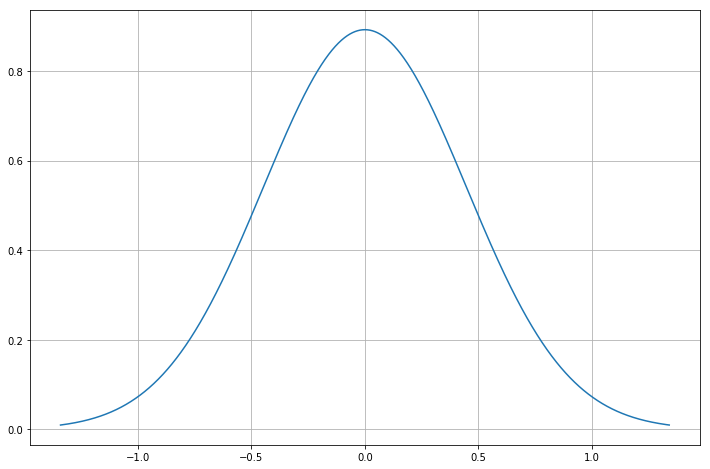

In [80]:
variance = 0.2
sigma = math.sqrt(variance)
kernel_figure = plt.figure(figsize=(12, 8))
kernel_axes = kernel_figure.add_subplot(111)
x_range = np.arange(-3 * sigma, 3 * sigma, 0.001)
kernel_axes.plot(x_range, mlab.normpdf(x_range, 0, sigma))
kernel_axes.grid()
plt.show()

Функция график которой приведён выше - это функция Гаусса, т.е. плотность вероятности нормально распределённой случайной величины.
$$
k(x) = ce^{-\frac{x^2}{2\sigma^2}}
$$
Теперь мы можем для каждой точки $x_i$ нашего набора точек определить свой kernel $K(x - x_i)$ с центром в данной точке $x_i$.
Выглядят точки с их kernel-ами примерно так:

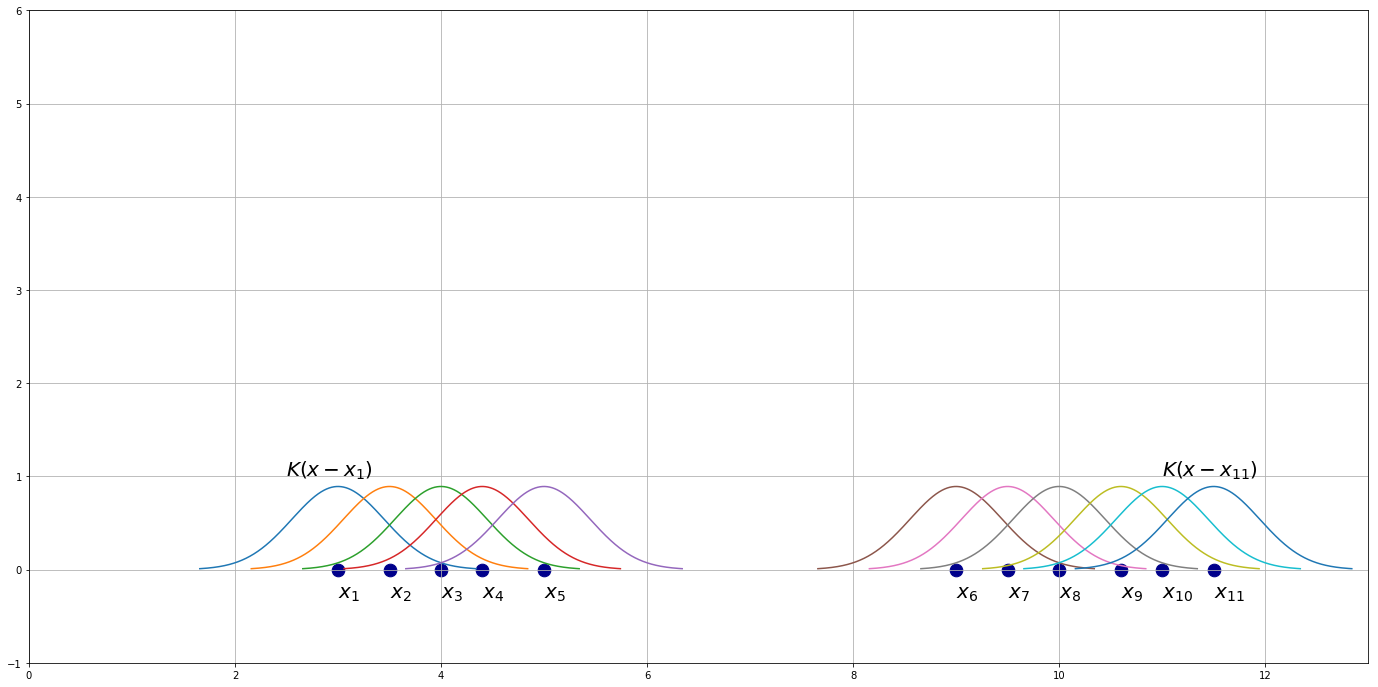

In [81]:
variance = 0.2
sigma = math.sqrt(variance)
mean_shift_figure = plt.figure(figsize=(24, 12))
mean_shift_axes = mean_shift_figure.add_subplot(111)
mean_shift_axes.scatter(x_array, y_array, marker='o', s=160, color='darkblue')
for i, x in enumerate(x_array):
    mean_shift_axes.text(x, -0.3, "$x_{%s}$" % str(i + 1), fontsize=20)
for x in x_array:
    x_range = np.arange(x - 3 * sigma, x + 3 * sigma, 0.001)
    mean_shift_axes.plot(x_range, mlab.normpdf(x_range, x, sigma))
mean_shift_axes.text(x_array[0] - 0.5, 1.0, "$K(x - x_{1})$", fontsize=20)
mean_shift_axes.text(x_array[-1] - 0.5, 1.0, "$K(x - x_{11})$", fontsize=20)
mean_shift_axes.set_xlim(0, 13)
mean_shift_axes.set_ylim(-1, 6)
mean_shift_axes.grid()
plt.show()

Далее мы суммируем все эти kernel-ы, деля сумму на количество $N$ точек в нашем наборе, находя таким образом функцию плотности распределения наших точек, осуществив переход к непрерывной функции распределения плотности:
$$ f(x) = \frac{1}{N}\sum\limits_{i = 1}^{N}K(x - x_i) $$
\\В принципе, мы можем думать о kernel как о некой \verb'"мере схожести"', или \verb'"мере подобия"' двух произвольных точек $x_i$ и $x_j$ нашего набора точек. Т.е. чем больше значение $K(x_i - x_j)$ тем более \verb'"похожи"' точки $x_i$ и $x_j$.
\\Сделаем ещё один шаг, уточняя понятие kernel. На самом деле kernel -- это, для большинства применяемых на практике kernel-ов, функция от расстояния $\|x_i - x_j\|$ между точками:
$$ K(x) = ck\left(\left\|\frac{x - x_i}{h}\right\|\right)$$
$c$ -- это просто нормировочная константа, для того что бы интеграл от kernel по всей области определения был равен 1. В англоязычной литературе по статистике/машинному обучению $h$ bandwidth или window bandwidth - "ширина окна". Имеется ввиду ширина Парзеновского окна.
\\Для нас важно, то что величина $h$ характеризует \verb'"радиус влияния"' точки $x_i$. От выбора величины этого параметра зависит ключевой момент применения MeanShift алгоритма о котором будет сказанно дальше.
\\Итак, введя расстояние между точками нашего набора точек мы фактически дали описание не только одномерного случая, но и многомерного. Хотя, если под расстоянием, подразумевается обычное Евклидово расстояние, то мы тогда ограничиваем себя так называемыми radially symmetric kernels, то есть \verb'"кругосимметричными ядрами"' (в начале наших рассуждений уже была формулировка \verb'"вокруг начала координат"'). Впрочем, для обобщения на многомерный случай радиальность kernel-а значения не имеет. Но для упрощения рассуждений и вычислений будем оперировать именно с radially symmetric kernel.
\\Итак, в общем случае в пространстве с Евклидовой метрикой такой kernel имеет вид:
$$
K(x) = ck\left(\left\|\frac{x - x_i}{h}\right\|^2\right)
$$
Соответственно, функция плотности имеет вид:
$$
f(x) = \frac{1}{N}\sum\limits_{i = 1}^{N}ck\left(\left\|\frac{x - x_i}{h}\right\|^2\right)
$$
В англоязычной литературе по статистике/машинному обучению данный метод апроксимации плотности вероятности на конечном множестве точек называется Kernel Smoothing (Ядерное сглаживание).
\\Теперь мы можем найти локальные максимумы функции плотности воспользовавшись gradient asscent методом, т.е. методом градиентного восхождения, который на самом деле ничем не отличается от метода градиентного спуска за исключением знака с которым берётся градиент.
\\Итак в общем виде алгоритм нахождения всех максимумов функции плотности выглядит так:
\begin{enumerate}
\item Для всех $i=1 \ldots N$ повторять:
$$
x \gets x_i + \nabla f(x) = x_i + \frac{1}{N}\nabla\sum\limits_{i = 1}^{N}ck\left(\left\|\frac{x - x_i}{h}\right\|^2\right)
$$
\item До тех пор пока $x$ не перестанет изменяться.
\end{enumerate}
$\nabla$ -- набла-оператор, векторная сумма первых частных производных, ну или в случае одного измерения. просто первая производная.
\\Но тут есть одна тонкость, которая значительно упрощает алгоритм. Найдём градиент $\nabla f(x)$, вводя обозначение $g(t) = -k'(t)$:
\begin{gather*}
\nabla f(x) = \frac{1}{N}\nabla\sum\limits_{i = 1}^{N}ck\left(\left\|\frac{x - x_i}{h}\right\|^2\right) = \frac{2c}{Nh^2}\sum\limits_{i = 1}^{N}\left(x - x_i \right)g\left(\frac{\left\|x - x_i\right\|^2}{h^2}\right) \\
\Downarrow \\
\nabla f(x) = \frac{2c}{Nh^2}\sum\limits_{i = 1}^{N}g\left(\frac{\left\|x - x_i\right\|^2}{h^2}\right)\left(\frac{\sum\limits_{i = 1}^{N}x_i g\left(\frac{\left\|x - x_i\right\|^2}{h^2}\right)}{\sum\limits_{i = 1}^{N}g\left(\frac{\left\|x - x_i\right\|^2}{h^2}\right)} - x \right)
\end{gather*}
\\Выражение
$$
\boxed{\frac{\sum\limits_{i = 1}^{N}x_i g\left(\frac{\left\|x - x_i\right\|^2}{h^2}\right)}{\sum\limits_{i = 1}^{N}g\left(\frac{\left\|x - x_i\right\|^2}{h^2}\right)} - x}
$$
то есть разность между $x$ и средневзвешенным по $g(\bullet)$ от точек которые лежат \verb'"близко'" от $x$ (то есть тех которые попадают в window точки $x$) и называется mean shift вектор. Обозначается как $M(x)$. Очевидно, что он имеет то же направление что и градиент. Воспользовавшись $M(x)$ окончательно запишем выражение для каждого последующего $x$ в нашем алгоритме как:
$$
x \gets x + M(x) = x + \left(\frac{\sum\limits_{i = 1}^{N}x_i g\left(\frac{\left\|x - x_i\right\|^2}{h^2}\right)}{\sum\limits_{i = 1}^{N}g\left(\frac{\left\|x - x_i\right\|^2}{h^2}\right)} - x \right) = \frac{\sum\limits_{i = 1}^{N}x_i g\left(\frac{\left\|x - x_i\right\|^2}{h^2}\right)}{\sum\limits_{i = 1}^{N}g\left(\frac{\left\|x - x_i\right\|^2}{h^2}\right)}
$$
\\Чаще всего в качестве $k(x)$ используется уже упоминавшаяся функция Гаусса (т.е. функция плотности нормального распределения вероятностей В случае функции Гаусса $h$ - это среднеквадратическое отклонение (обычно обозначается как $\sigma$).
\\И о подборе величины параметра $h$ (bandwidth). Если мы его выберем слишком малым, то у нас получится множество кластеров, общая картина получится слишком \verb'"зашумленной"'. Если же задать его слишком большим, то картина получится слишком сглаженной, с малым количеством кластеров, из за чего мы рискуем не увидеть важные закономерности.
\\Уточнение по поводу \verb'"близко-далеко"' и \verb'"зоны влияния"'. Конечно же для Гауссова ядра зона влияния - это вся числовая ось. Но на практике точки лежащие например, за пределами широкоизвестных \verb'"трёх сигма"' можно не учитывать. Для некоторых же типов kernel-ов \verb'"зона действия"' имеет чёткую границу (например для функции $\phi$ которую мы использовали выше. Ну или для Epanechnikov kernel (ядро Епанечникова):
$$
K\left( u \right) = \left\lbrace
            \begin{aligned}
            c\left( 1 - u^2 \right) && \; |u| \le 1 && \\
            0 && \; \mbox{иначе} &&
           \end{aligned}
          \right.
$$
\\Важнейшее преимущество MeanShift алгоритма это то что он не требует заранее задавать количество кластеров (в отличие например от наиболее популярного алгоритма \verb'"обучения без учителя"' K-Means), т.е. не заставляет заранее нас делать какие либо предположения (а скорее, догадки) о количестве или расположении кластеров.
В простейшем, одномерном случае мы можем проиллюстрировать работу алгоритма, дополняя предыдущий рисунок с набором точек и их kernela-ми:

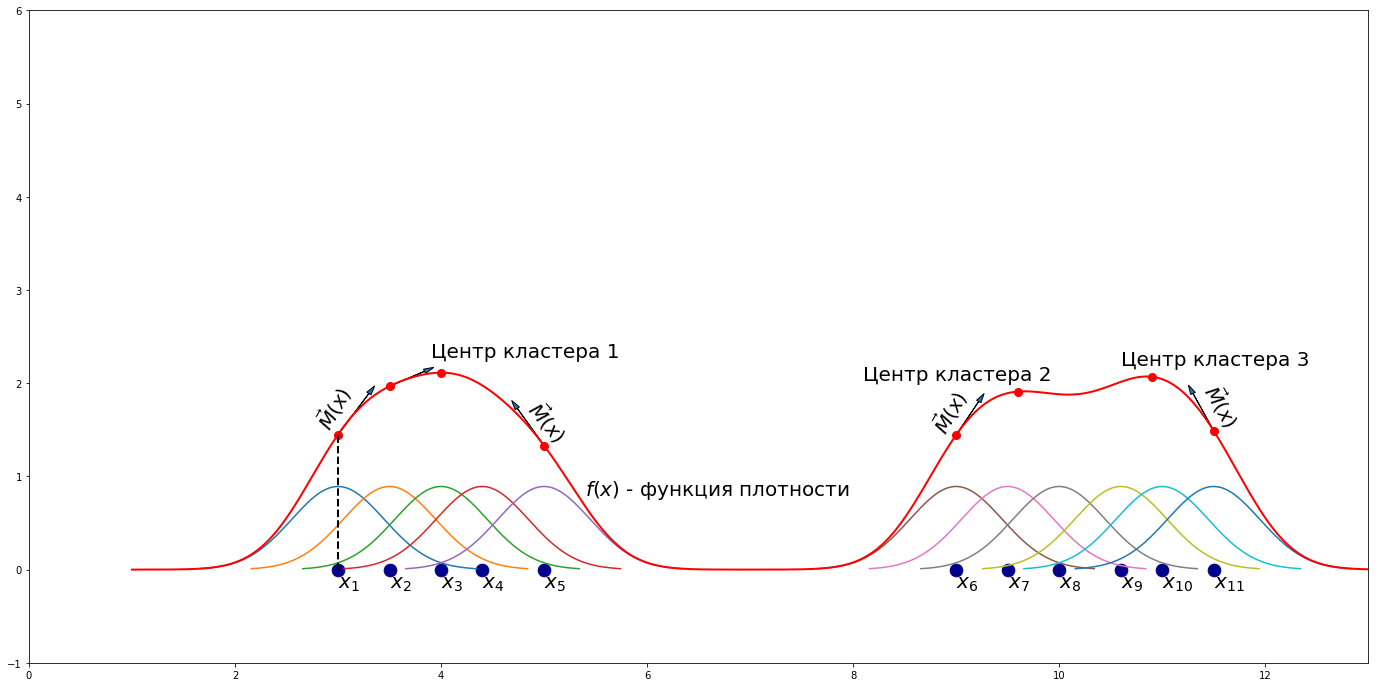

In [82]:
def density_func(x, kernel_centres):
    return sum(mlab.normpdf(x, centre , sigma) for centre in kernel_centres)

variance_sum = 0.4
variance_sum_1 = 0.6
sigma_sum = math.sqrt(variance_sum)
sigma_sum_1 = math.sqrt(variance_sum_1)
mean_shift_figure = plt.figure(figsize=(24, 12))
mean_shift_axes = mean_shift_figure.add_subplot(111)
mean_shift_axes.scatter(x_array, y_array, marker='o', s=160, color='darkblue')
for i, x in enumerate(x_array):
    mean_shift_axes.text(x, -0.2, "$x_{%s}$" % str(i + 1), fontsize=20)
mean_shift_axes.grid()
for x in x_array:
    x_range = np.arange(x - 3 * sigma, x + 3 * sigma, 0.001)
    mean_shift_axes.plot(x_range, mlab.normpdf(x_range, x, sigma))
global_x_range = np.arange(1, 13, 0.001)
mean_shift_axes.plot(
    global_x_range,
    sum(mlab.normpdf(global_x_range, x , sigma) for x in x_array),
    color='red', 
    linewidth=2.0
)
mean_shift_axes.text(5.4, 0.8, "$f(x)$ - функция плотности", fontsize=20)
point0y = density_func(x_array[0], x_array)
mean_shift_axes.plot(
    x_array[0],
    point0y,
    marker='o',
    markersize=8,
    color='red'
)
mean_shift_axes.plot(
    (x_array[0], x_array[0]), (0, point0y), linestyle='--', linewidth=2, color='k'
)
point1y = density_func(x_array[0] + 0.5, x_array)
mean_shift_axes.plot(
    x_array[0] + 0.5,
    point1y,
    marker='o',
    markersize=8,
    color='red'
)
point2y = density_func(x_array[0] + 1, x_array)
mean_shift_axes.plot(
    x_array[0] + 1,
    point2y,
    marker='o',
    markersize=8,
    color='red'
)
point3y = density_func(x_array[0] + 2, x_array)
mean_shift_axes.plot(
    x_array[0] + 2,
    point3y,
    marker='o',
    markersize=8,
    color='red'
)
mean_shift_axes.text(x_array[0] + 0.9, point2y + 0.16, "Центр кластера 1", fontsize=20)
mean_shift_axes.arrow(x_array[0], point0y, 0.3, 0.44, head_width=0.05, head_length=0.1)
mean_shift_axes.text(x_array[0] - 0.26, point0y + 0.34, "$\\vec M(x)$", rotation=60, fontsize=20)
mean_shift_axes.arrow(x_array[0] + 0.5, point1y, 0.34, 0.16, head_width=0.05, head_length=0.1)
mean_shift_axes.arrow(x_array[0] + 2, point3y, -0.26, 0.4, head_width=0.05, head_length=0.1)
mean_shift_axes.text(x_array[0] + 1.8, point3y + 0.3, "$\\vec M(x)$", rotation=-50, fontsize=20)

point4y = density_func(x_array[6] + 0.1, x_array)
mean_shift_axes.plot(
    x_array[6] + 0.1,
    point4y,
    marker='o',
    markersize=8,
    color='red'
)
mean_shift_axes.text(x_array[6] - 1.4, point4y + 0.12, "Центр кластера 2", fontsize=20)
point5y = density_func(x_array[-2] - 0.1, x_array)
mean_shift_axes.plot(
    x_array[-2] - 0.1,
    point5y,
    marker='o',
    markersize=8,
    color='red'
)
mean_shift_axes.text(x_array[-2] - 0.4, point5y + 0.12, "Центр кластера 3", fontsize=20)
point6y = density_func(x_array[5], x_array)
mean_shift_axes.plot(
    x_array[5],
    point6y,
    marker='o',
    markersize=8,
    color='red'
)

mean_shift_axes.arrow(x_array[5], point6y, 0.22, 0.36, head_width=0.05, head_length=0.1)
mean_shift_axes.text(x_array[5] - 0.28, point6y + 0.3, "$\\vec M(x)$", rotation=60, fontsize=20)
point7y = density_func(x_array[-1], x_array)
mean_shift_axes.plot(
    x_array[-1],
    point7y,
    marker='o',
    markersize=8,
    color='red'
)
mean_shift_axes.arrow(x_array[-1], point7y, -0.2, 0.4, head_width=0.05, head_length=0.1)
mean_shift_axes.text(
    x_array[-1] - 0.14, point7y + 0.32, "$\\vec M(x)$", rotation=-60, fontsize=20
)

mean_shift_axes.set_xlim(0, 13)
mean_shift_axes.set_ylim(-1, 6)
mean_shift_axes.grid()
plt.show()

Подитожив сказанное, вкратце Mean Shift алгоритм можно описать следующим образом:
\begin{enumerate}
\item Строим на множестве точек которые надо прокластеризовать непрерывную функцию плотности воспользовавшись ядерным сглаживание (kernel smoothing).
\item Используя модифицированный метод градиентного восхождения, в котором собственно градиент от функции плотности полученной на предыдушем шаге, заменён на вектор сдвига от данной точки к средневзвешенному значению координат точек попадающих в Парзеновское окно данной точки (Mean Shift vector), приходим из каждой точки из набора точек которые нам необходимо прокластеризовать, в ближайший к точке локальный максимум.
\\item Точки для которых локальные максимумы совпадают, объявляем принадлежащими к одному кластеру.
\end{enumerate}

Создаём экземпляр класса MeanShift, задавая bandwidth. ScikitLearn предоставляет возможность во многих случаях вычислить его при помощи функции estimate_bandwidht избавив нас от необходимости его угадывать. Далее вызываем стандартный для всех классов ScikitLearn реализующих методы машинного обучения метод fit передавая ему массив обучающих значений.
После обращаясь уже к \verb'"обученному"' (произведшему класстеризацию) экземпляру класса выводим количество получившихся кластеров.

In [83]:
prepared_df_values = scaled_with_dropped_regions_hier_concantenated_df.values
bandwidth = cluster.estimate_bandwidth(
    prepared_df_values,
    quantile=0.1,
    n_samples=prepared_df_values.shape[0]
)
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(prepared_df_values)
labels = ms.labels_
cluster_centres = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("Количество кластеров: %d" % n_clusters_)

Количество кластеров: 4


Выводим (используя библиотеку Seaborn) кроскорреляционную матрицу. Кроме значения коэффициента корреляции степень корреляции выделяется цветом.

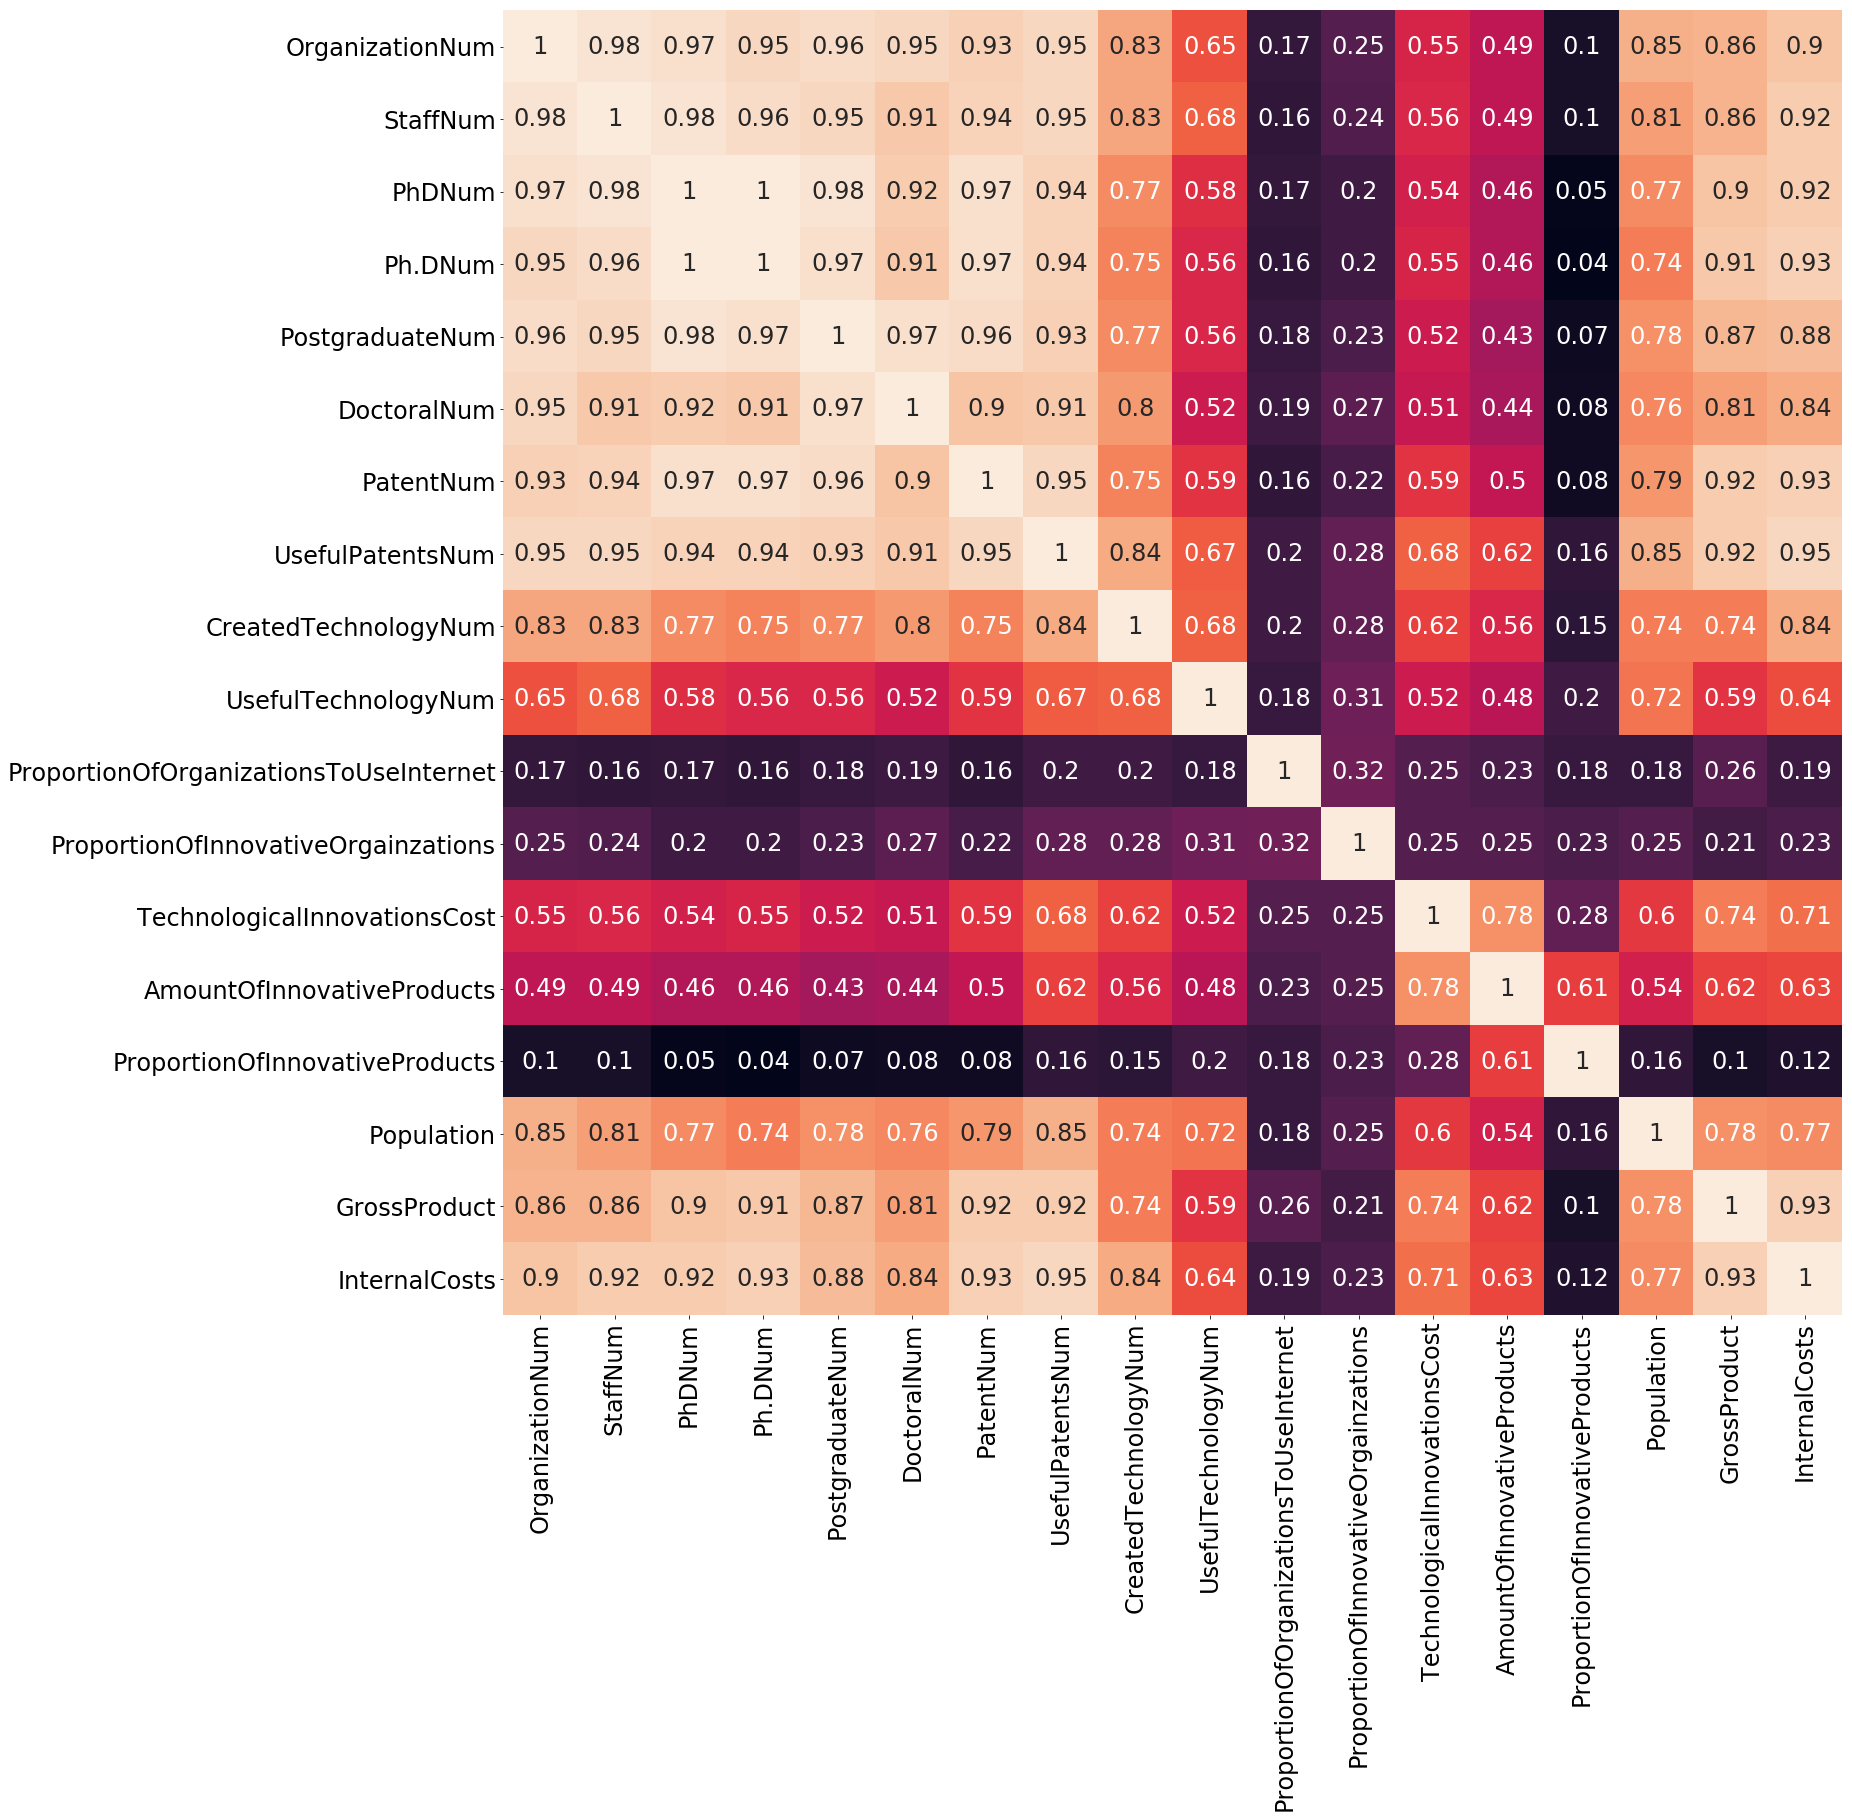

In [84]:
plt.figure(figsize=(24, 24))
heatmap_fig = sns.heatmap(
    scaled_with_dropped_regions_hier_concantenated_df.corr().round(2),
    annot=True, annot_kws={"size":24},
    cbar=False
)
for item in heatmap_fig.get_xticklabels():
    item.set_fontsize(24)
for item in heatmap_fig.get_yticklabels():
    item.set_fontsize(24)
for item in heatmap_fig.get_label():
    item.set_fontsize(24)

Для упрощения восприятия выводим соответсвие между названиями (англоязычными) столбцов в датафрейме и соответсвующими русскоязычными названиями показетелей. Так же выводим и соответтвующие номера столбцов. Нумерация начинается с нуля, как это принято в большинстве языков программирования.

In [85]:
for i, column_name_en, feature_name_ru in zip(
    range(len(features_names_ru)),
    scaled_with_dropped_regions_hier_concantenated_df.columns,
    features_names_ru
):
    print("{} {}\n\t{}\n".format(i, column_name_en, feature_name_ru))

0 OrganizationNum
	ОРГАНИЗАЦИИ, ВЫПОЛНЯЮЩИЕ НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ

1 StaffNum
	численность персонала без ученых степеней, занятых НИОКР

2 PhDNum
	Численность исследователей, имеющих ученую степень,
по субъектам Российской Федерации показатель
кандидата наук- человек

3 Ph.DNum
	Численность исследователей, имеющих ученую степень,
по субъектам Российской Федерации показатель
доктора наук - человек

4 PostgraduateNum
	Численность аспирантов по субъектам Российской Федерации - человек

5 DoctoralNum
	Численность докторантов по субъектам Российской Федерации 0человек

6 PatentNum
	КОЛИЧЕСТВО ПАТЕНТОВ, ВЫДАННЫХ НА ИЗОБРЕТЕНИЯ

7 UsefulPatentsNum
	КОЛИЧЕСТВО ПАТЕНТОВ, ВЫДАННЫХ НА ПОЛЕЗНЫЕ МОДЕЛИ

8 CreatedTechnologyNum
	РАЗРАБОТАННЫЕ ПЕРЕДОВЫЕ ПРОИЗВОДСТВЕННЫЕ ТЕХНОЛОГИИ
ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ

9 UsefulTechnologyNum
	ИСПОЛЬЗУЕМЫЕ ПЕРЕДОВЫЕ ПРОИЗВОДСТВЕННЫЕ ТЕХНОЛОГИИ
ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ

10 ProportionOfOrganizationsToUseInternet
	УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ 

Для понимания полученной в резултате кластеризации информации нам необходимо эту информацию отобразить графически. А для этого нам необходимо выделить из набора всех показателей наиболее \verb'"важные"' или значимые. Мы можем для этого использовать полученную шагом ранее кроскореляционную матрицу выбрав наименее коррелирующие пары показателей. Но этот подход выявляет только линейные зависимости, и к тому же нам придётся самим как-то писать дополнительный программный код для автоматизации этого выбора (что довольно громоздко) либо выбирать пары вручную что трудно и времязатратно.
Попробуем применить другой подход. Воспользуемся тем что некоторые методы \verb'"обучения с учителем"' (supervised learning) могут ранжировать признаки (features, столбцы) по степени важности. В частности таким свойством обладают методы основанные на объединении (ensemble) деревьев решений, например Random Forest (\verb'"Лес случайных деревьев"'  Алгоритм предложен Лео Брейманом и Адель Катлер: \cite{litlink4}, \cite{litlink1} \cite{litlink5} \cite{litlink7}. Имеются ввиду decision trees - \verb'"решаюшие деревья"' или \verb'"деревья решений'" \cite{litlink1}, \cite{litlink5} \cite{litlink6}, \cite{litlink7}). В каждом узле такого дерева присходит вычисление энтропии по Шеннону либо значения \verb'"критерия загрязнённости"' Джинни (Gini impurity) \cite{litlink3} \cite{litlink5}, \cite{litlink7}, что автоматически даёт нам так же выявление нелинейных зависимостей. А разметка по классам необходимая для применения методов supervised learning у нас уже есть - принадлежность к тому или иному кластеру мы можем трактовать как принадлежность к соответсвующему классу.
Создаём копию датафрейма

In [86]:
prepared_for_supevised_df = scaled_with_dropped_regions_hier_concantenated_df.copy()

Создаём отдельное поле (столбец) которое и будет содержать метку класса (номер кластера).

In [87]:
prepared_for_supevised_df['cluster_class'] = labels

Определяем вспомогательную функцию которая понадобиться для определения лучшего сочетания параметров выбранного метода supervised learning (Random Forest-а)

In [88]:
def report_best_score(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Ранг модели: {0}".format(i))
            print("Точность: {0:.3f} (среднеквадратичное отклонение: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Значения параметров:\n")
            for name, value in results['params'][candidate].items():
                print("\t{}: {}".format(name, value))
            print("")

Создаём экземпляр стандартного ScikitLearn  класса RandomForestClassifier

In [188]:
clf = RandomForestClassifier(n_estimators=20)

Произвёдем определение наилучшего сочетания значений параметров RandomForestClassifier-а посредством простого пойска по сетке значений параметров. Определяем допустимые диапазоны значений различных параметров Random Forest-а, для дальнейшего применения пойска наилучшего сочетания значений параметров по сетке значений. Создаём экземпляр класса GridSearchCV реализующего алгоритм пойска по сетке. 

In [186]:
param_grid = {
    "max_depth": [3, 7],
    "max_features": [1, 3, 10],
    "min_samples_split": [2, 3, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"],
}
grid_search = GridSearchCV(clf, param_grid=param_grid)

Производим пойск по сетке значений параметров.

In [190]:
grid_search.fit(prepared_df_values, labels)
report_best_score(grid_search.cv_results_)

Ранг модели: 1
Точность: 0.954 (среднеквадратичное отклонение: 0.012)
Значения параметров:

	bootstrap: True
	criterion: entropy
	max_depth: 7
	max_features: 3
	min_samples_leaf: 1
	min_samples_split: 2

Ранг модели: 2
Точность: 0.952 (среднеквадратичное отклонение: 0.048)
Значения параметров:

	bootstrap: True
	criterion: entropy
	max_depth: 7
	max_features: 10
	min_samples_leaf: 1
	min_samples_split: 3

Ранг модели: 3
Точность: 0.947 (среднеквадратичное отклонение: 0.019)
Значения параметров:

	bootstrap: False
	criterion: gini
	max_depth: 7
	max_features: 3
	min_samples_leaf: 1
	min_samples_split: 2

Ранг модели: 3
Точность: 0.947 (среднеквадратичное отклонение: 0.052)
Значения параметров:

	bootstrap: False
	criterion: entropy
	max_depth: 7
	max_features: 10
	min_samples_leaf: 1
	min_samples_split: 2



Создаём экземпляр RandomForestClassifier-а подставляя найденный наилучший набор значений параметров.

In [94]:
better_clf = RandomForestClassifier(
    n_estimators=20,
    bootstrap=False,
    criterion='entropy',
    max_depth=7,
    max_features=3,
    min_samples_leaf=1,
    min_samples_split=3,
)

Запускаем процесс обучения классификатора.

In [99]:
better_clf.fit(prepared_df_values, labels)

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=7, max_features=3,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Определяем важность показателей (features) инновационности (номера соответсвующих столбцов). И выводим диаграмму в графическом виде представляющую важность показателей (в виде высоты столбцов).

Ранжированные показатели:
10
1. Показатель 10 (0.216056)
	УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ ИСПОЛЬЗОВАВШИХ  ИНТЕРНЕТ
ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ
(В ПРОЦЕНТАХ ОТ ОБЩЕГО ЧИСЛА ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ
СООТВЕТСТВУЮЩЕГО СУБЪЕКТА РОССИЙСКОЙ ФЕДЕРАЦИИ)
11
2. Показатель 11 (0.178214)
	ИННОВАЦИОННАЯ АКТИВНОСТЬ ОРГАНИЗАЦИЙ
(УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ, ОСУЩЕСТВЛЯВШИХ ТЕХНОЛОГИЧЕСКИЕ,
ОРГАНИЗАЦИОННЫЕ, МАРКЕТИНГОВЫЕ ИННОВАЦИИ В ОТЧЕТНОМ ГОДУ,
В ОБЩЕМ ЧИСЛЕ ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ ( %)
14
3. Показатель 14 (0.092327)
	УДЕЛЬНЫЙ ВЕС ИННОВАЦИОННЫХ ТОВАРОВ, РАБОТ, УСЛУГ
В ОБЩЕМ ОБЪЕМЕ ОТГРУЖЕННЫХ ТОВАРОВ, ВЫПОЛНЕННЫХ РАБОТ,
УСЛУГ, ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ (%)
0
4. Показатель 0 (0.077778)
	ОРГАНИЗАЦИИ, ВЫПОЛНЯЮЩИЕ НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ
7
5. Показатель 7 (0.057781)
	КОЛИЧЕСТВО ПАТЕНТОВ, ВЫДАННЫХ НА ПОЛЕЗНЫЕ МОДЕЛИ
3
6. Показатель 3 (0.055347)
	Численность исследователей, имеющих ученую степень,
по субъектам Российской Федерации показатель
доктора наук - человек
1
7. Показатель 1 (0.0512

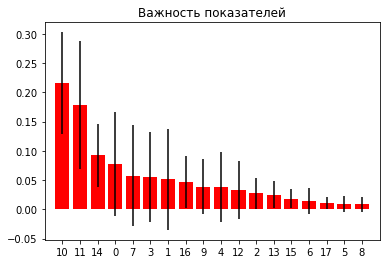

In [100]:
importances = better_clf.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in better_clf.estimators_],
    axis=0
)
indices = np.argsort(importances)[::-1]
print("Ранжированные показатели:")

for f in range(prepared_df_values.shape[1]):
    print(indices[f])
    print("%d. Показатель %d (%f)\n\t%s" % (
        f + 1,
        indices[f],
        importances[indices[f]],
        features_names_ru[indices[f]]))

plt.figure()
plt.title("Важность показателей")
plt.bar(range(prepared_df_values.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(prepared_df_values.shape[1]), indices)
plt.xlim([-1, prepared_df_values.shape[1]])
plt.show()

\\Как видим самым важным (весомым) показателем оказался показатель с номером десять (считая от нуля) - \verb'"УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ ИСПОЛЬЗОВАВШИХ  ИНТЕРНЕТ ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ"'
Вообще, было проведено множество запусков RandomForest для выявления закономерностей в упорядочивании показателей по значимости. В каждом узле дерева решений (каждого из деревьев решений которые строит Random Forest) сплит (англ. split), т.е. разбиение по значениям очередного показателя, происходит среди показетелей случайно отобранных  из всего множества показетелей, почему алгоритм и называется Random Forest. По этой причине от запуска к запуску, в общем случае, упорядочение меняется. Мы можем, конечно, изменить это поведение алгоритма посредством задания параметра random_state но нас интересуют именно статистические закономерности.
\\Показатели 10 и 11 входят в пятёрку самых значимых почти при каждом перезапуске (по крайней мере один из них, чаще - оба) причём обычно 10-й оказывается на 1-ом месте. Очень часто входят в пятёрку показатели 16, 13, 1, 9, 14. Мы остановились на варианте когда в пятёрке самых значимых присутствуют 10-й и 14-й показатели, так как 14-й к тому же весьма слабо коррелирует (линейно) со всеми остальными показтелями, как видно из кроскореляционной матрицы приведённой выше. Так же наличие 14-го показателя на scatter plot диаграммах весьма чётко иллюстрирует один из выводов работы сделанных далее.

Далее нам надо отобразить класстеризованные регионы на двумернных проекциях попарных сочетаний соответсвующих показателей. Для этого мы и выбирали наиболее значимые показатели - что бы сократить число выводимых двумерных проекций.
Задача графического отображения класстеризованных регионов на проекциях требует указания множества различных параметров отображения, и является довольно громоздкой. Для её решения был создан класс ClustersDrawer, исходный код (текст) которого вынесен в отдельный файл clusters_drawer.py

In [100]:
X = prepared_df_values
cluster_labels = ms.labels_

In [140]:
import clusters_drawer

Среди задаваемых параметров следует выделить ms - обученный MeanShift кластеризатор содержащий информацию о кластерах (принадлежности того или иного региона к тому или иному кластеру) и список significant_features - номера наиболее важных показателей.

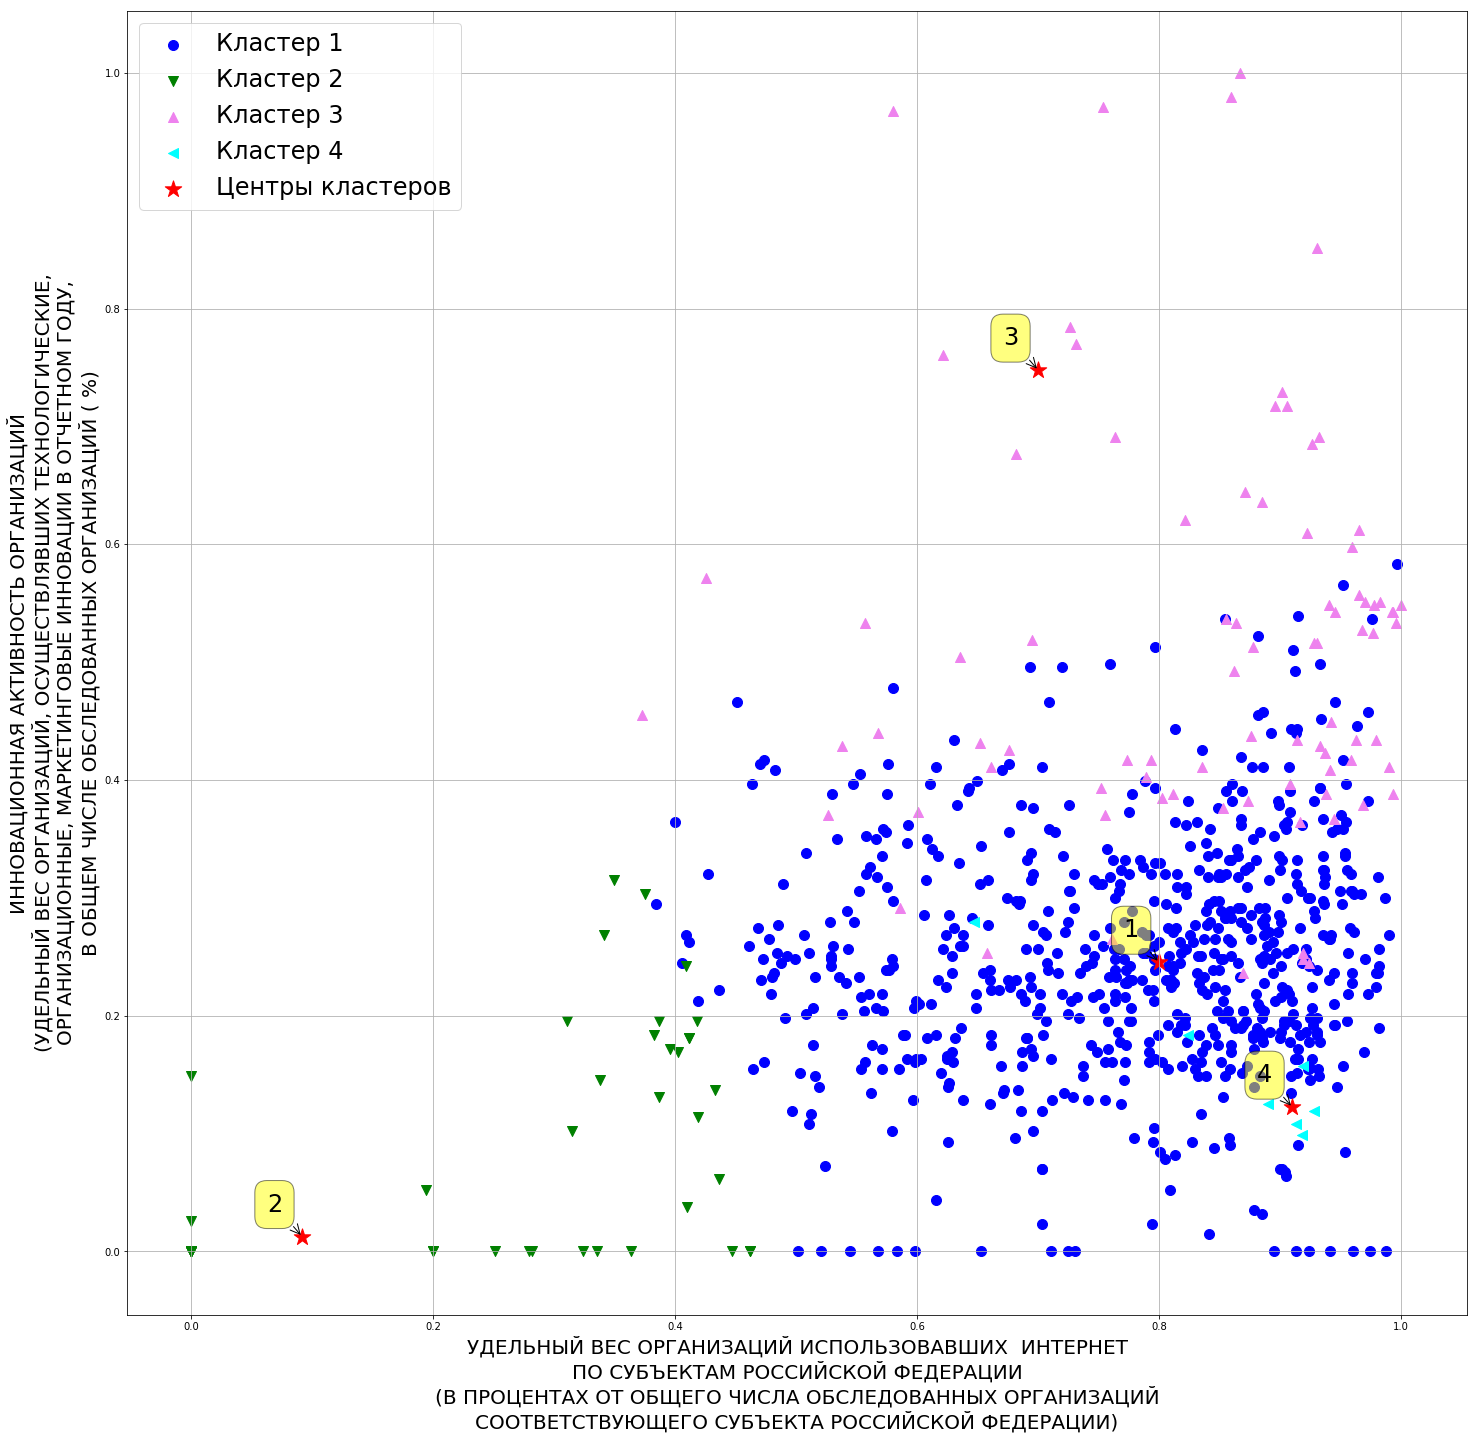

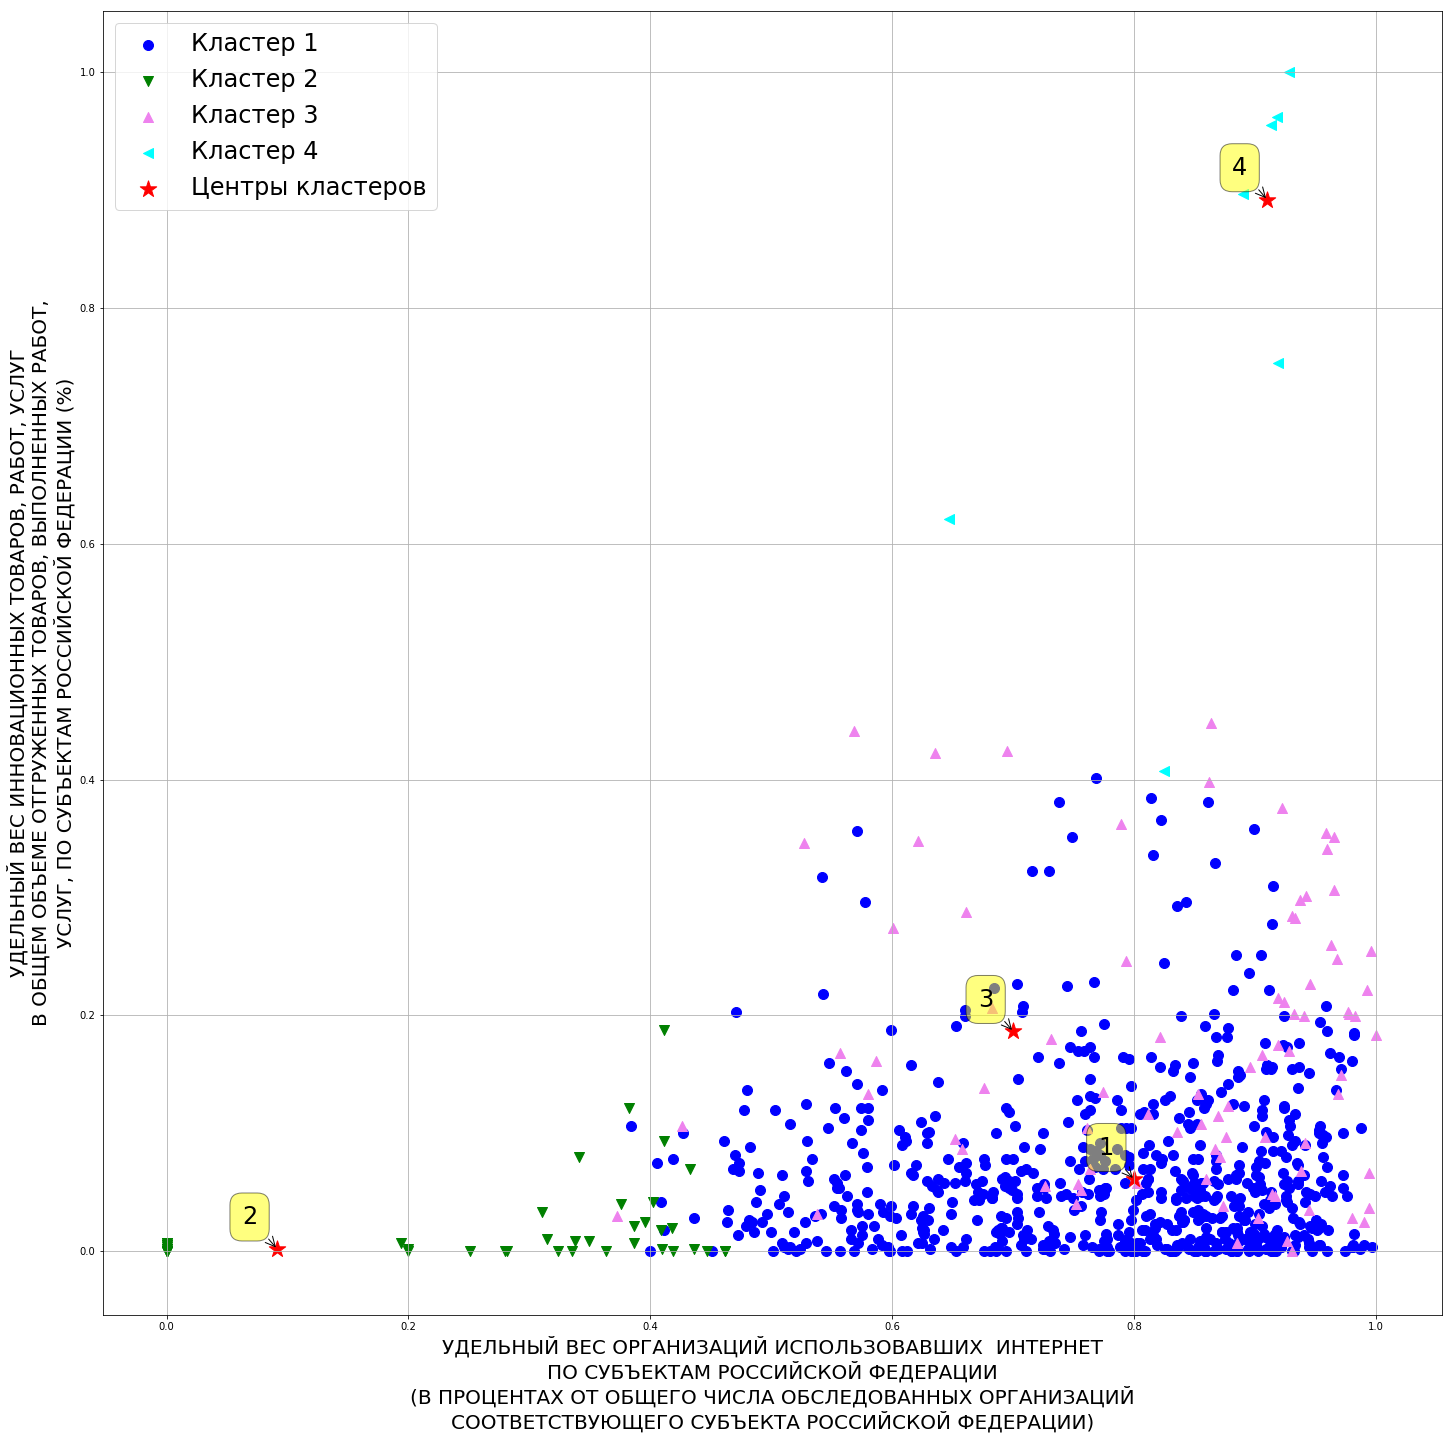

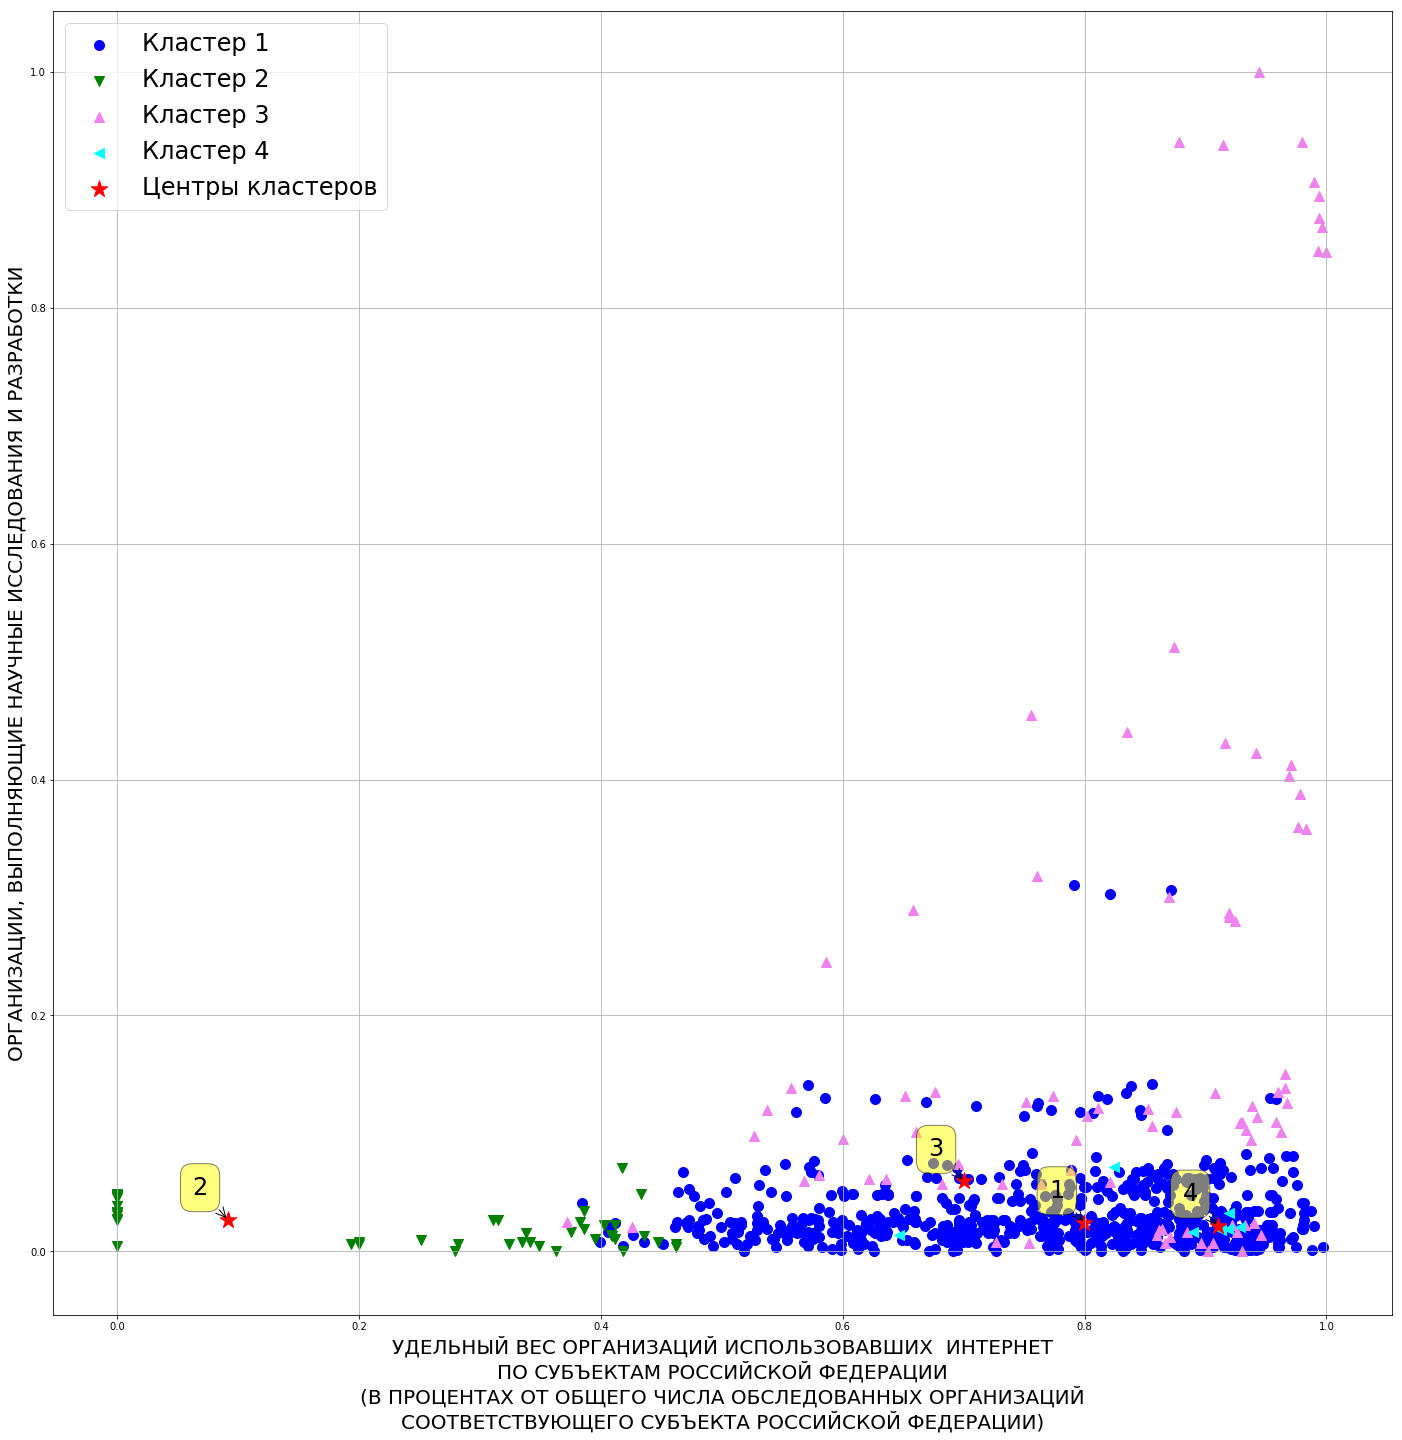

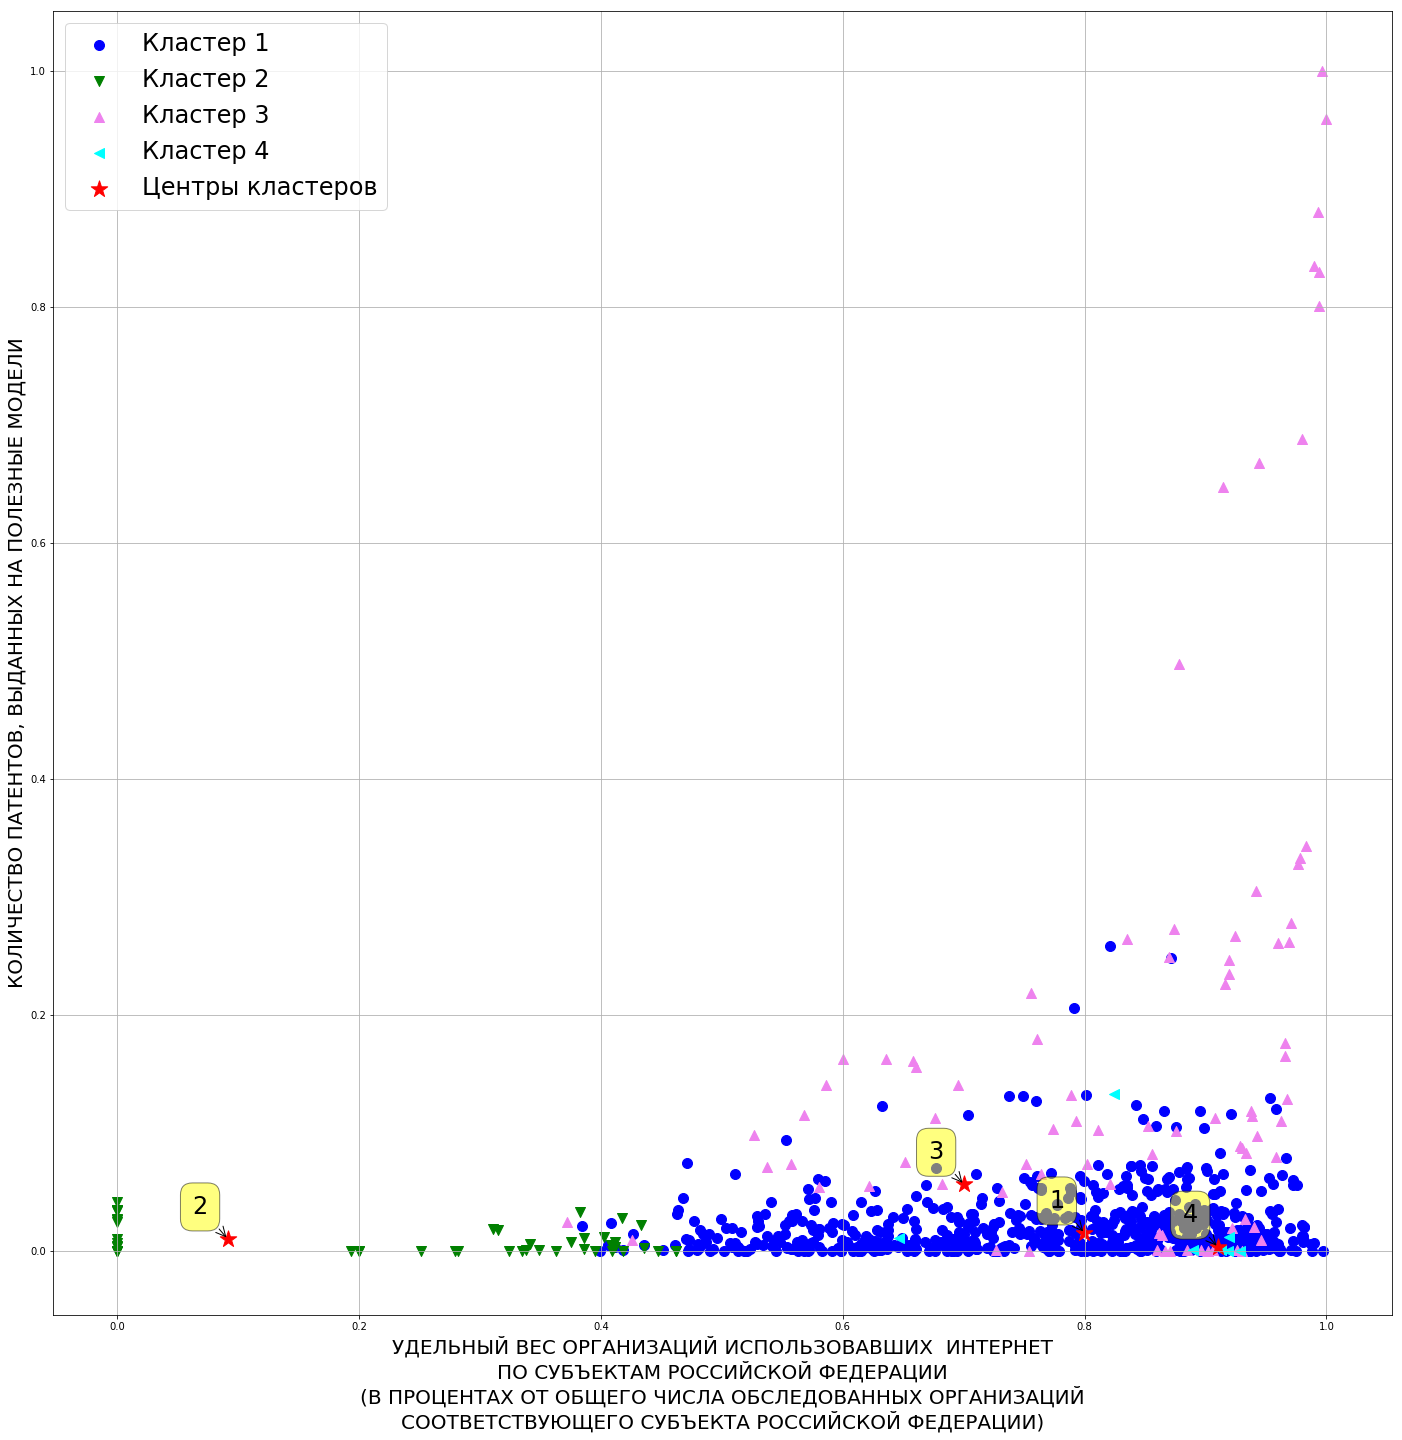

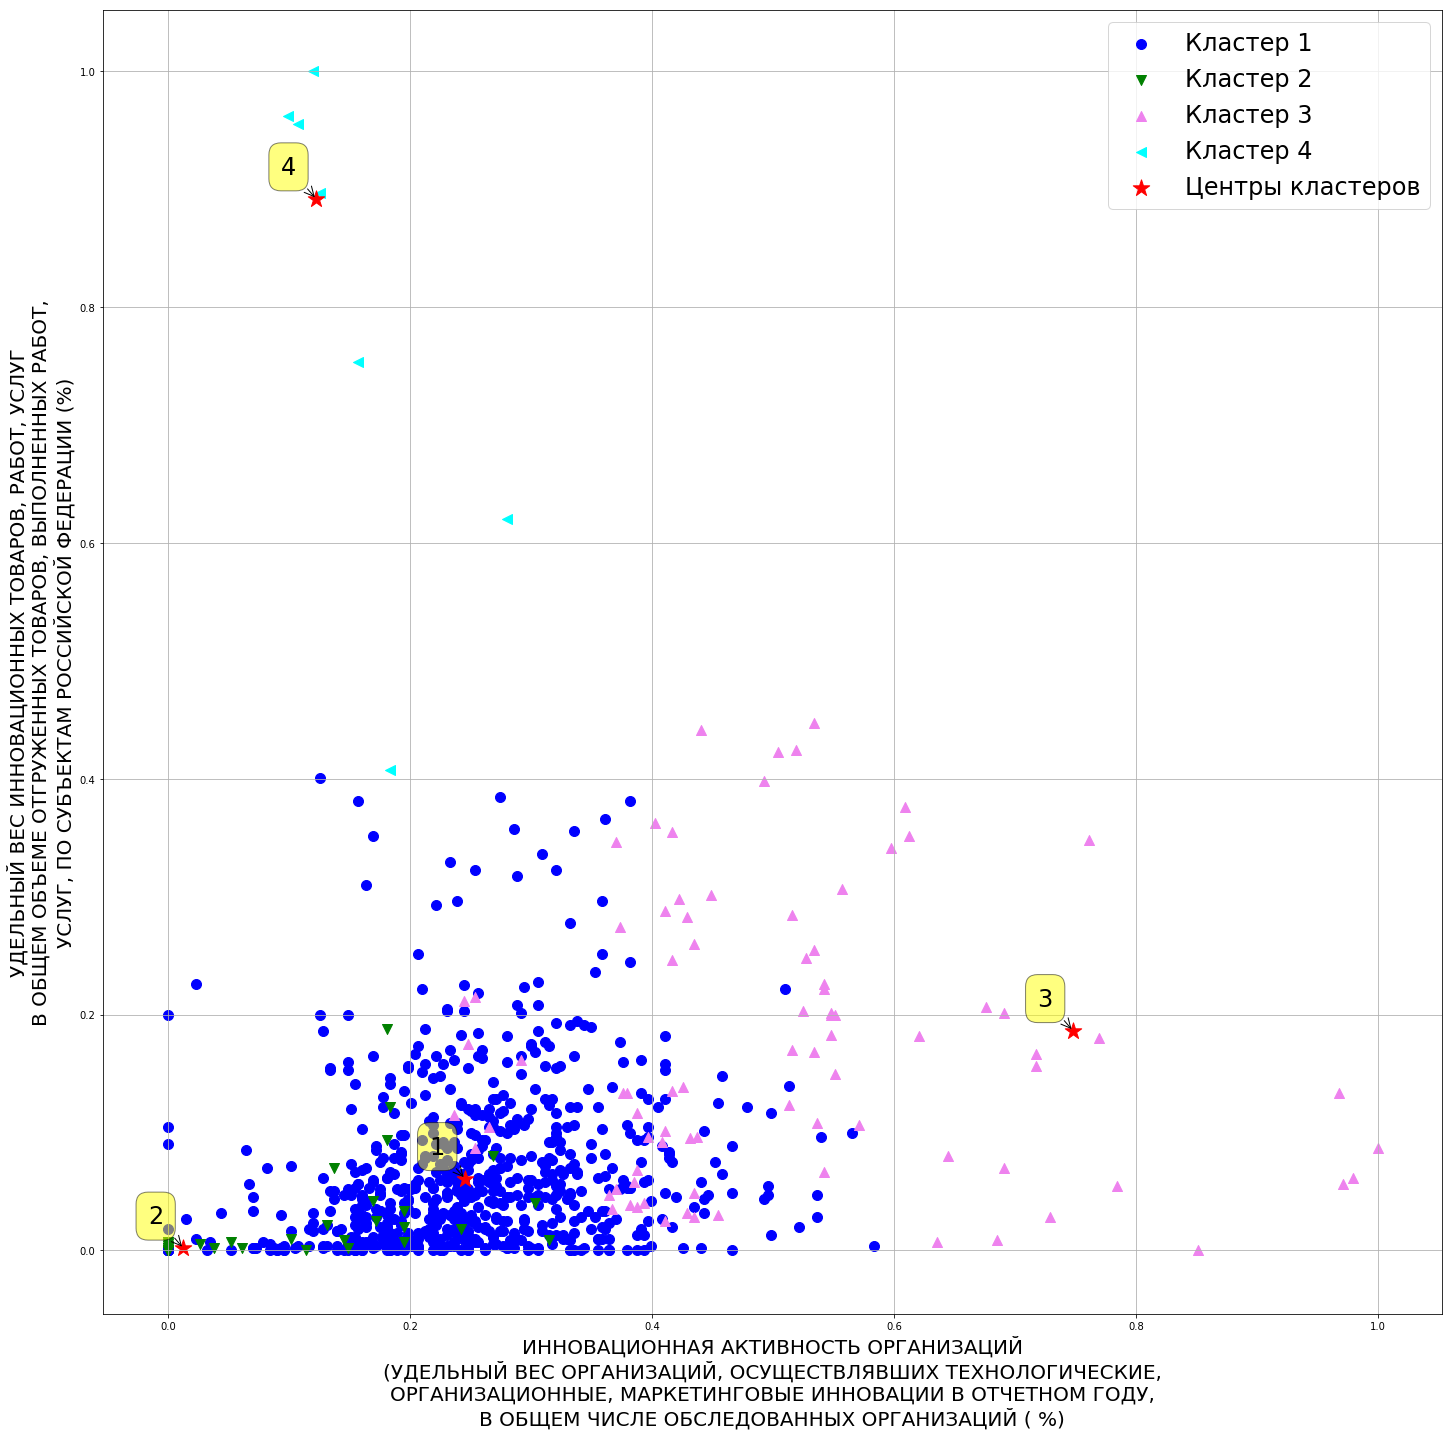

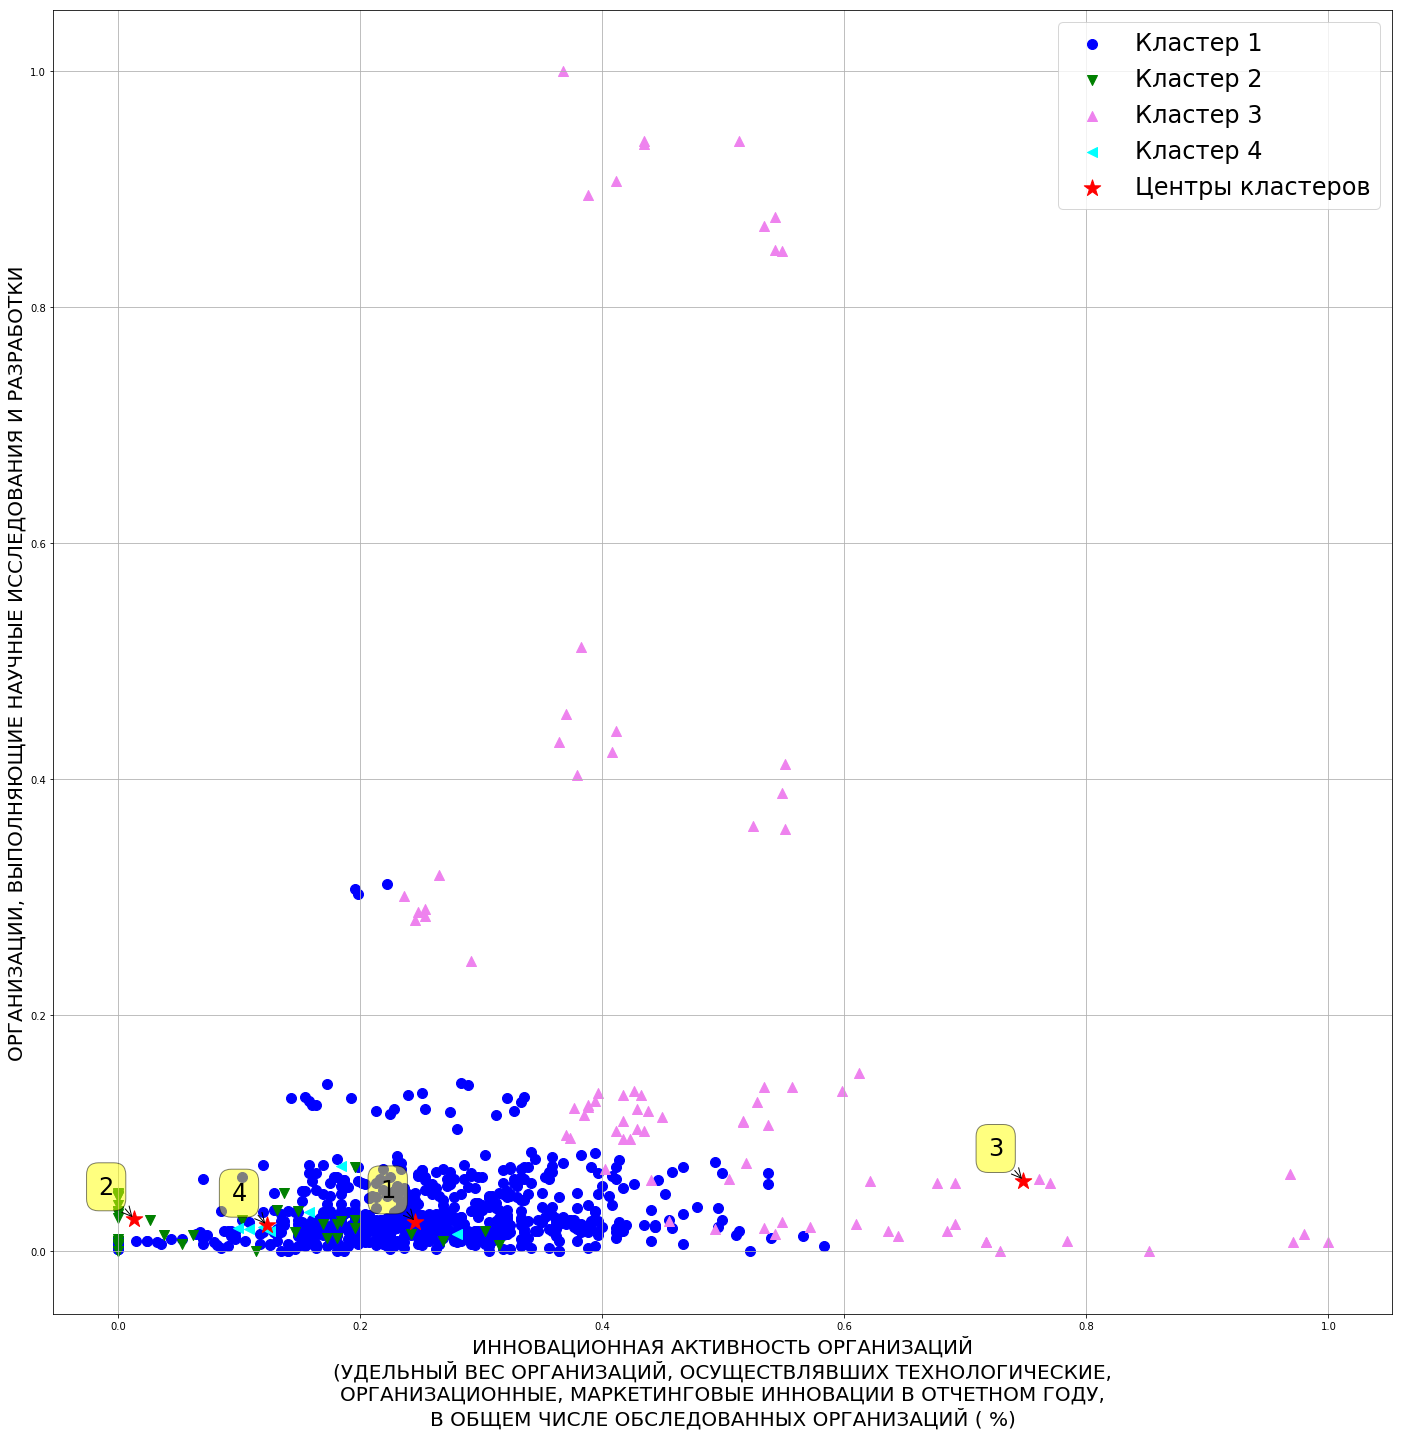

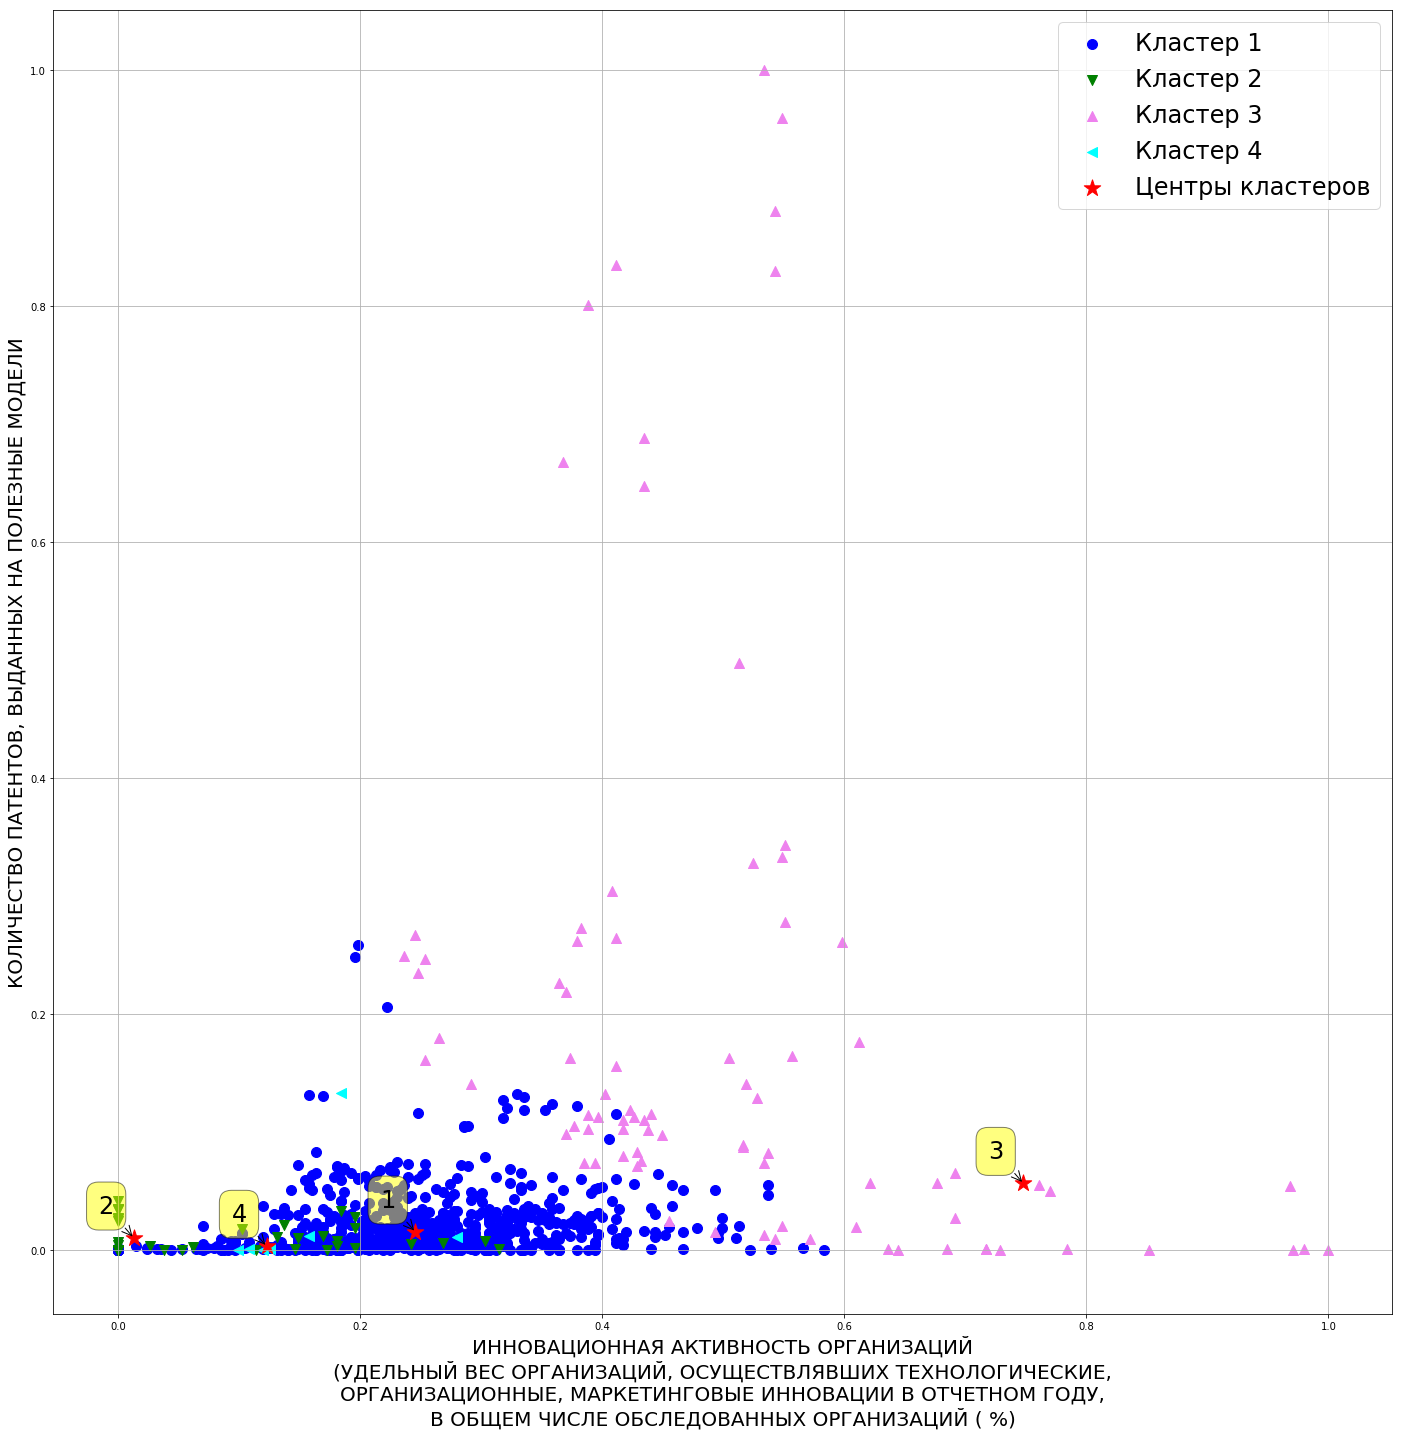

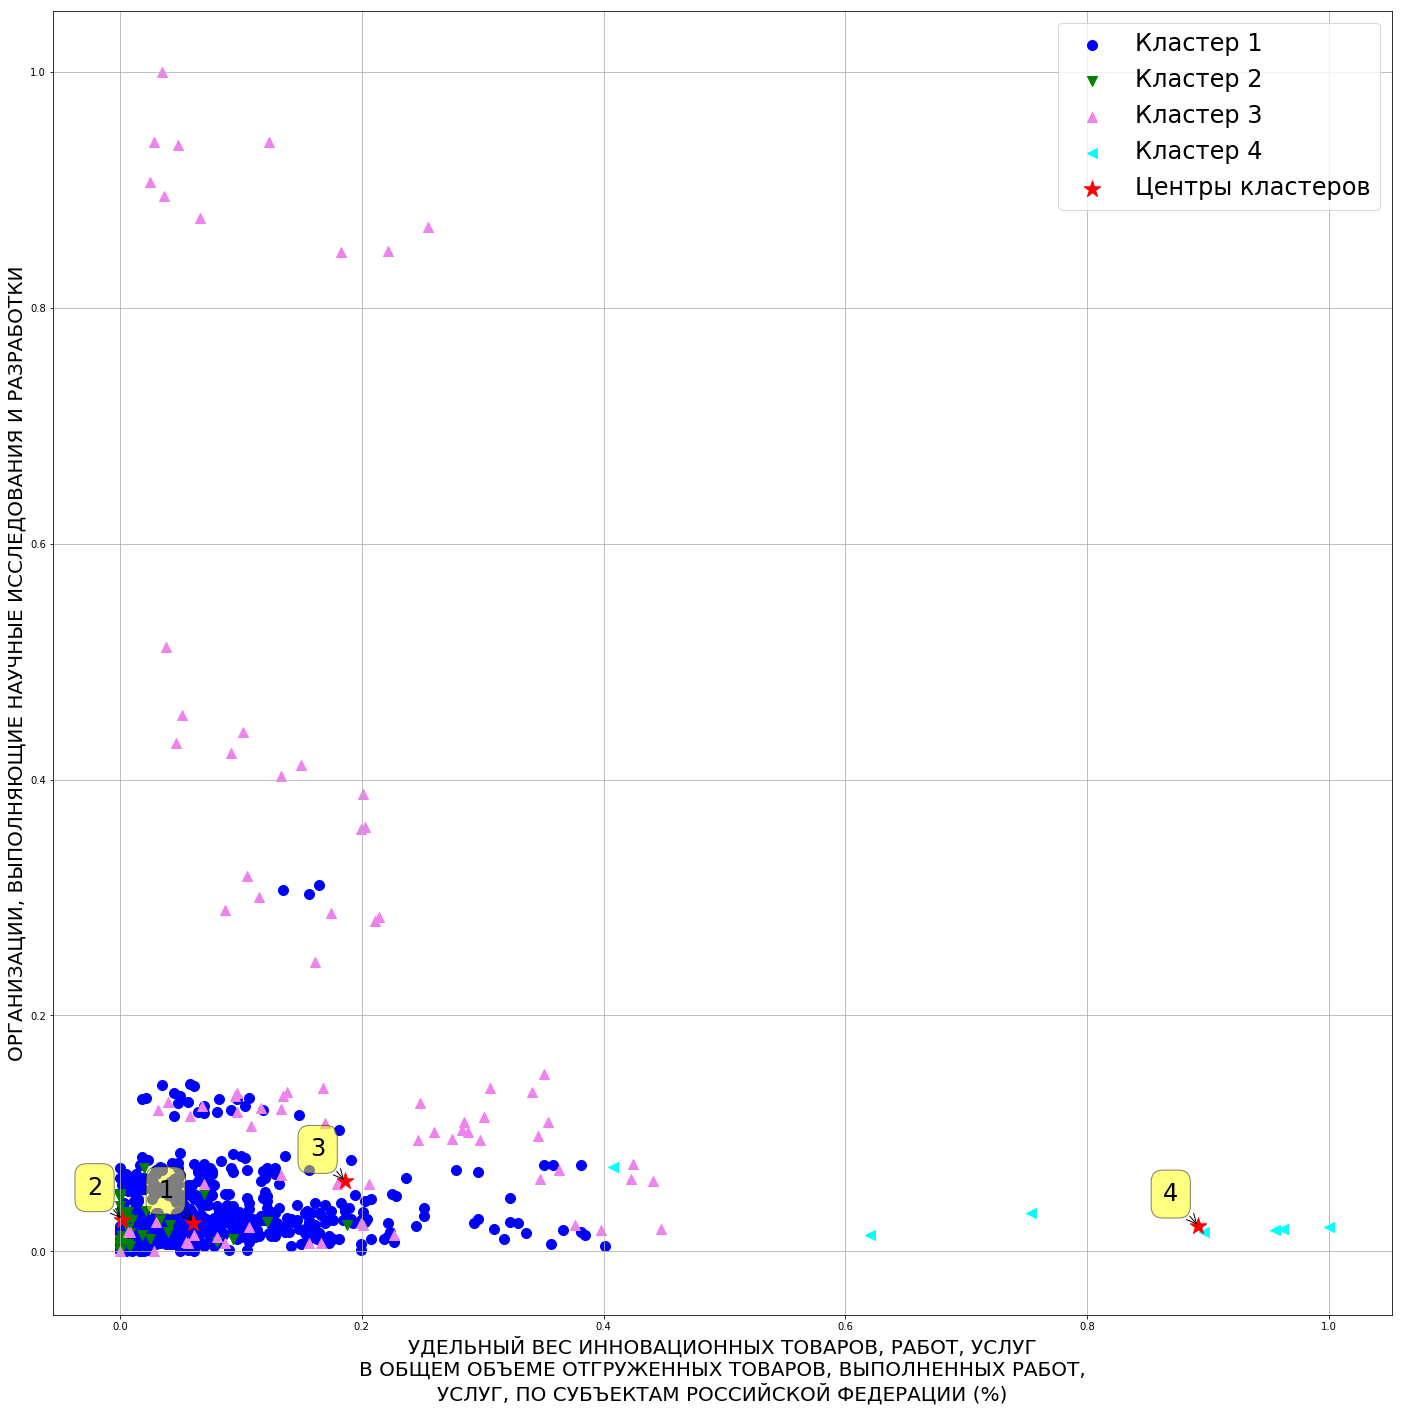

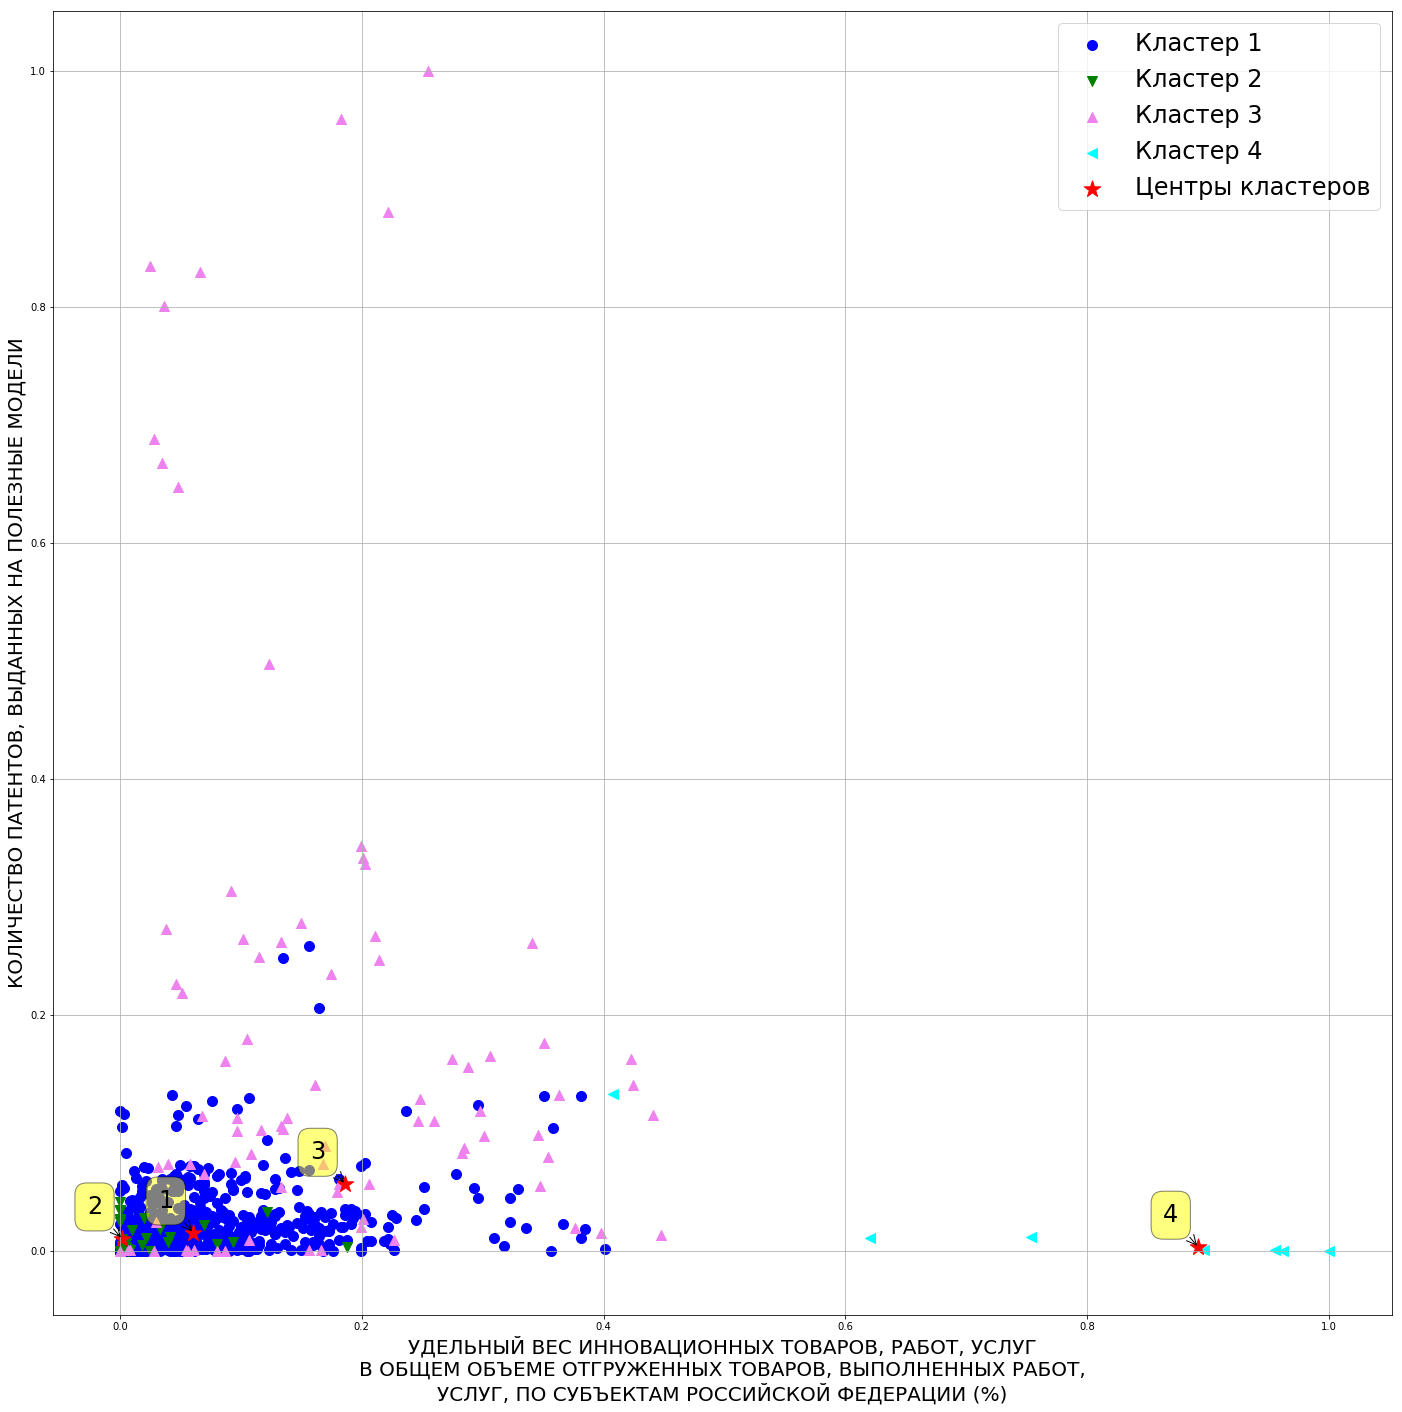

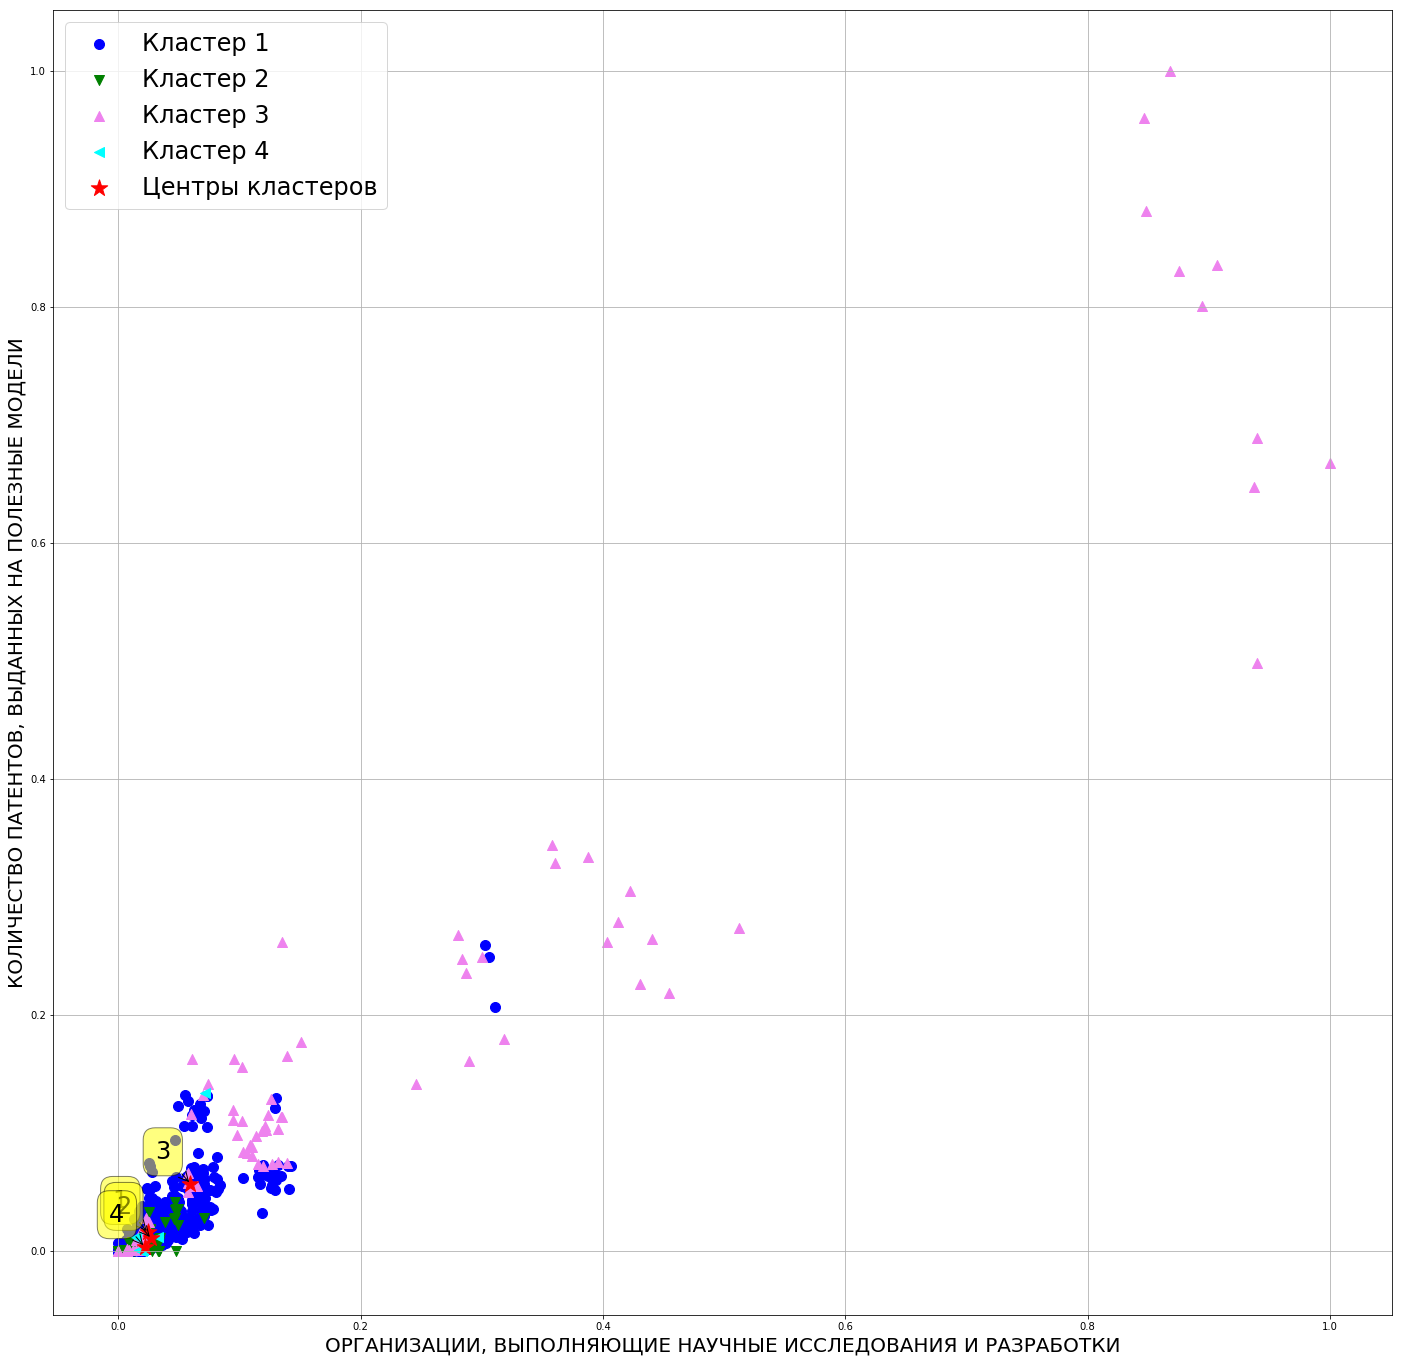

In [141]:
#significant_features = [10, 11, 9, 1, 14]
significant_features = [10, 11, 14, 0, 7]
drawer = clusters_drawer.ClustersDrawer(
    plt,
    ms,
    X,
    significant_features,
    features_names=features_names_ru,
    data_colors = ['blue', 'green', 'violet', 'cyan', 'gray']
)
drawer.data_point_size = 100
drawer.draw()

Для облегчения восприятия выводим попарные сочетания названий пяти наиболее значимых показетелей.

In [142]:
for i, indexes in enumerate(drawer.pair_list(significant_features)):
    x_index, y_index = indexes
    print("\n", i, features_names_ru[x_index], '\n | ', features_names_ru[y_index])


 0 УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ ИСПОЛЬЗОВАВШИХ  ИНТЕРНЕТ
ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ
(В ПРОЦЕНТАХ ОТ ОБЩЕГО ЧИСЛА ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ
СООТВЕТСТВУЮЩЕГО СУБЪЕКТА РОССИЙСКОЙ ФЕДЕРАЦИИ) 
 |  ИННОВАЦИОННАЯ АКТИВНОСТЬ ОРГАНИЗАЦИЙ
(УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ, ОСУЩЕСТВЛЯВШИХ ТЕХНОЛОГИЧЕСКИЕ,
ОРГАНИЗАЦИОННЫЕ, МАРКЕТИНГОВЫЕ ИННОВАЦИИ В ОТЧЕТНОМ ГОДУ,
В ОБЩЕМ ЧИСЛЕ ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ ( %)

 1 УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ ИСПОЛЬЗОВАВШИХ  ИНТЕРНЕТ
ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ
(В ПРОЦЕНТАХ ОТ ОБЩЕГО ЧИСЛА ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ
СООТВЕТСТВУЮЩЕГО СУБЪЕКТА РОССИЙСКОЙ ФЕДЕРАЦИИ) 
 |  УДЕЛЬНЫЙ ВЕС ИННОВАЦИОННЫХ ТОВАРОВ, РАБОТ, УСЛУГ
В ОБЩЕМ ОБЪЕМЕ ОТГРУЖЕННЫХ ТОВАРОВ, ВЫПОЛНЕННЫХ РАБОТ,
УСЛУГ, ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ (%)

 2 УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ ИСПОЛЬЗОВАВШИХ  ИНТЕРНЕТ
ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ
(В ПРОЦЕНТАХ ОТ ОБЩЕГО ЧИСЛА ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ
СООТВЕТСТВУЮЩЕГО СУБЪЕКТА РОССИЙСКОЙ ФЕДЕРАЦИИ) 
 |  ОРГАНИЗАЦИИ, ВЫПОЛНЯЮЩИЕ НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ

 3 У

Сразу стоит указать, что на каждом изображении (двумерной проекции) содеражится полный временной (ударение на \verb'"о"') слепок каждого кластера. То есть каждый регион на изображении встречается несколько раз, (столько раз сколько лет во временном диапазоном на протяжении которого мы кластеризуем), причём он может в общем случае быть обозначен разными значками с разным цветом, обозначающими принадлежность к разным кластерам (может с течением времени \verb'"путешествовать"' по кластерам).
Далее можно попробовать сделать некие общие выводы глядя на построенные нами scatter plot диаграммы, и попробовать определить критерии принадлежности к каждому кластеру (или иначе - попробовать на человеческом языке как то назвать полученные кластеры).
В качестве примера подробнее разберём первый же рисунок, на которм изображена зависимость количества полезных моделей в зависимости от \verb'"степени интернатизации"'.
\\Глядя на изображение можно сделать выввод, что большая часть регионов на протяжении срока наблюдения попадает в кластер 1 для которого довольно высокие значения независимой переменной (степени интернатизации) не приводят тем не менее к высоким значениям зависимой (ну или лучше сказать \verb'"коррелирующей, причём возможно нелинейно"') переменной (количеству полезных патентов).
\\Кластер 2 можно охарактеризовать тем, что низкие значения независимой переменной соответсвуют низким значениям зависимой.
\\Кластер 3 можно охарактеризовать тем, что для него высокие значения независимой переменной соответствует высоким значениям зависимой.
\\Про кластер 4 из анализа 1-го изображения пока ничего определённого сказать нельзя, на первый взгляд он не отличается от кластера 1.
\\Анализ последующих изображений подтверждает выводы о кластерах 1, 2, 3, и проясняет характеристики кластера 4.
Итак:
\begin{enumerate}
\item Кластер 1. Можно охарактеризовать понятием \verb'"середнячки"', или \verb'"эффективность от невысокой до средней"', или \verb'"не очень высокая инновационная отдача на относительно (или даже абсолютно) высокие вложения"'.
\item Кластер 2. Можно охарактеризовать понятием \verb'"отстающие"', или \verb'"малая иновационная отдача в ответ на малые вложения"'.
\item Кластер 3. \verb'"Лидеры"'. Характеризуються высокой инновационной отдачей в ответ на высокие вложения.
\item Кластер 4. Можно охарактеризовать понятием \verb'"аномальная эффективность"'. По некоторым параметрам ведут себя как представители класса 1, но по некоторым показывают высокую инновационную отдачу в ответ на низкие вложения (что отчётливо видно на диаграммах с 14-м показателем: \verb'"ИННОВАЦИОННАЯ АКТИВНОСТЬ ОРГАНИЗАЦИЙ (УДЕЛЬНЫЙ ВЕС  ОРГАНИЗАЦИЙ, ОСУЩЕСТВЛЯВШИХ ТЕХНОЛОГИЧЕСКИЕ, ОРГАНИЗАЦИОННЫЕ, МАРКЕТИНГОВЫЕ ИННОВАЦИИ В ОТЧЕТНОМ ГОДУ, В ОБЩЕМ ЧИСЛЕ ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ ( %)"')
Что не исключает того, что по некоторым показателям в 4-ом кластере, возможно как раз аномально низкое значение одного из показателей в сочетании с высоким значением другого. Впрчем, такая ситуация не исключена и в других кластерах.
\end{enumerate}

Выводим списки регионов сгрупированные в кластера по годам.
Для этого добавляем в главный датафрейм, с которым мы оперируем, информацию о принадлежности региона к кластеру в виде столбца \verb'"cluster_label"'. Разделяем главный датафрейм на список датафреймов в котором каждый элемент списка - отдельный кластер.

In [143]:
hier_concatenated_df['cluster_label'] = ms.labels_
clusters = [
    hier_concatenated_df.loc[hier_concatenated_df['cluster_label'] == i] for i in range(4)
]

Определям функцию для разбиения кластера (датафрейма в котором регионы сгрупированны по кластерам) по годам.

In [144]:
def decompose_clusters_by_years(clusters, years):
    return {year: [cluster.loc[year]['Region'] for cluster in clusters] for year in years}

Определяем временной диапазон.

In [145]:
years = range(2005, 2015)

Разбиваем кластера по годам.

In [146]:
clusters_by_years = decompose_clusters_by_years(clusters, years)

In [147]:
for year in years:
    print("\n\nГод: ", year)
    for i, cluster in enumerate(clusters_by_years[year]):
        print("\nКластер: ", i + 1)
        print(cluster.tolist())



Год:  2005

Кластер:  1
['Белгородская область', 'Владимирская область', 'Воронежская область', 'Калужская область', 'Липецкая область', 'Рязанская область', 'Тамбовская область', 'Ярославская область', 'Республика Карелия', 'Республика Коми', 'Ненецкий автономный округ', 'Вологодская область', 'Калинингpадская область', 'Ленинградская область', 'Мурманская область', 'Новгородская область', 'Псковская область', 'Республика Адыгея', 'Краснодарский край', 'Астраханская область', 'Волгоградская область', 'Ростовская область', 'Республика Дагестан', 'Кабардино-Балкарская Республика', 'Ставропольский край', 'Республика Башкортостан', 'Республика Марий Эл', 'Удмуртская Республика', 'Чувашская Республика', 'Оренбургская область', 'Пензенская область', 'Саратовская область', 'Ханты-Мансийский автономный округ', 'Ямало-Ненецкий автономный округ', 'Челябинская область', 'Республика Алтай', 'Республика Хакасия', 'Алтайский край', 'Иркутская область', 'Кемеровская область', 'Новосибирская област

Из полученного разбиения кластеров по годам можно сделать несколько выводов:
\begin{enumerate}
\item Не во все года в кластер 4 (\verb'"Аномальная эффективность"') попадает хотя бы один регион. Более того, регионы начинают попадать в кластер 4 начиная с середины срока наблюдения, и в особенности ближе к концу срока.
\item Кластер 2 (\verb'"Отстающие"') со временем исчезает (\verb'"рассасывается"') регионы перемещаються из него, в основном в кластер 1 (\verb'"Середнячки"').
\item Большая часть регионов надёжно остаються в своих кластерах, но есть и регионы перемещающиеся в другие кластера (например регионы из разряда \verb'"Отстающие"' перемещающиеся в \verb'"Середнячки"') и регионы \verb'"бродящие"' по различным кластерам, например Самарская область, или Архангельская область которая из \verb'"Отстающих"' переместилась в \verb'"Аномальные"'.
\item Большая часть регионов со временем сосредоточилась в кластере 1.
\end{enumerate}

Далее необходимо решить задачу отображения информации о кластеризованных регионах на карте административных единиц Российской Федерации.

Загружаем значения кодов регионов.

In [148]:
region_codes_df = pd.read_csv('codes.csv', sep=';')
region_codes_with_names = region_codes_df.values

Загружаем карту административных единиц РФ с сопутствующей информацией. Карты  в формате Shapefile находяться в свободном доступе здесь: \url{https://gadm.org/data.html}. Для работы с картами в данном формате используетя Python библиотека с таким же названием.

In [149]:
rus_adm_units = shapefile.Reader('unzip/RUS_adm1')

Из загруженных данных читаем информацию о регионах (содержащую, в частности названия регионов), и собственно, само геометрическое описание регионов (в виде неких многоугольников).

In [150]:
rus_adm_units_records = rus_adm_units.records()
rus_adm_units_shapes = rus_adm_units.shapes()

Дальше определено несколько вспомогательных функций/участков кода в основном предназначенных для сопоставления названий регионов (административных единиц) взятых из различных источников: данных о иновационной активности, кодов регионов, географической информации. Из каждого названия выделяется основная (значимая) часть. Многие регионы в различных источниках пишуться по разному, применяються различные аббревиатуры, и т.д, поэтому некоторые названия пришлось сопоставлять вручную. Имена (названия) определяемых функция и переменных даны с учётом того что имя должно сообщать максимальную информацию о смысле данной функции (переменной), с другой стороны возможности да и необходимости давать (и, следовательно придумывать) максимально \verb'"красивые"' имена с точки зрения программирования у нас здесь нет, поэтому имена получились такими, какими получились. Так же с помощью определённых далее вспомогательных функций производиться сопоставление регионов (их индексов в соответствующих списках) из различных источников, на основе ранее выделенных главных частей названий, что нужно для отрисовки регионов с их кодами на карте.

In [151]:
region_map_names = [record[10] if record[10] else 'Москва' for record in rus_adm_units_records]

In [152]:
cutted_name_part = (
    'край',
    'область',
    'республика',
    'аок',
    'аоб',
    '',
    '(якутия)',
    'респу',
    'респуб',
    '(горсовет)',
    'автономный',
    'автономная',
    'округ',
    'респу́блика'
)
def extract_main_name_part(name):
    lower_case_name = name.lower()
    splitted_name = lower_case_name.split(' ')
    main_name_part_components = []
    for name_part in splitted_name:
        if name_part not in cutted_name_part:
            main_name_part_components.append(name_part)
    return ' '.join(main_name_part_components)

In [153]:
region_map_names_main_part = [extract_main_name_part(name) for name in region_map_names]
region_codes_names_main_part = [
    extract_main_name_part(record[0]) for record in region_codes_with_names
]
region_codes = [record[1]  for record in region_codes_with_names]

In [154]:
def fix_names(region_names):
    #sverdlovsk_count = 0
    fixed_names = []
    for name in region_names:
        if name == 'калинингpадская':
            fixed_names.append('калининградская')
        elif name == 'ингуше́тия':
            fixed_names.append('ингушетия')
        else:
            fixed_names.append(name)
    return fixed_names

In [155]:
fixed_region_map_names_main_part = fix_names(region_map_names_main_part)
fixed_regions_codes_names_main_part = fix_names(region_codes_names_main_part)

In [156]:
region_names_from_dataset = merged_df_list[-1]['Region'].tolist()

In [157]:
region_names_from_dataset_main_part = [
    extract_main_name_part(name) for name in region_names_from_dataset
]

In [158]:
fixed_region_names_from_dataset_main_part = fix_names(region_names_from_dataset_main_part)

In [159]:
def correct_names_from_unit_map(region_names):
    corrected_region_names = []
    for region_name in region_names:
        if region_name == 'пермская':
            corrected_region_names.append('пермский')
        elif region_name == 'камчатская':
            corrected_region_names.append('камчатский')
        elif region_name == 'чечено-ингушска':
            corrected_region_names.append('чеченская')
        elif region_name == 'eврейская':
            corrected_region_names.append('еврейская')
        elif region_name == 'карачаево-черкесская':
            corrected_region_names.append('карачаево-черкессия')
        elif region_name == 'ханты-мансийский - югра':
           corrected_region_names.append('ханты-мансийский')
        elif region_name == 'северная осетия - алания':
            corrected_region_names.append('северная осетия')
        #elif region_name == 'ямало-ненецкий':
        #    corrected_region_names.append('ненецкий')
        else:
            corrected_region_names.append(region_name)
    return corrected_region_names

In [160]:
corrected_region_map_names_main_part = correct_names_from_unit_map(
    fixed_region_map_names_main_part
)    
corrected_regions_codes_names_main_part = correct_names_from_unit_map(
    fixed_regions_codes_names_main_part
)
region_codes_description = [(code, name_main_part, None) for code, name_main_part in zip(
    region_codes,
    corrected_regions_codes_names_main_part
)]

In [161]:
print(corrected_region_map_names_main_part)
print(len(corrected_region_map_names_main_part))
print(corrected_regions_codes_names_main_part)
print(len(corrected_regions_codes_names_main_part))
print()
print([(full_name, name_main_part) for full_name, name_main_part in zip(
    (record[0] for record in region_codes_with_names), corrected_regions_codes_names_main_part)])

['адыгея', 'алтайский', 'амурская', 'архангельская', 'астраханская', 'башкортостан', 'белгородская', 'брянская', 'бурятия', 'чеченская', 'челябинская', 'чукотский', 'чувашская', 'санкт-петербург', 'дагестан', 'алтай', 'ингушетия', 'иркутская', 'ивановская', 'кабардино-балкарская', 'калининградская', 'калмыкия', 'калужская', 'камчатский', 'карачаево-черкессия', 'карелия', 'кемеровская', 'хабаровский', 'хакасия', 'ханты-мансийский', 'кировская', 'коми', 'костромская', 'краснодарский', 'красноярский', 'курганская', 'курская', 'ленинградская', 'липецкая', 'магаданская', 'марий эл', 'мордовия', 'москва', 'московская', 'мурманская', 'ненецкий', 'нижегородская', 'северная осетия', 'новгородская', 'новосибирская', 'омская', 'орловская', 'оренбургская', 'пензенская', 'пермский', 'приморский', 'псковская', 'ростовская', 'рязанская', 'сахалинская', 'саха', 'самарская', 'саратовская', 'смоленская', 'ставропольский', 'свердловская', 'свердловская', 'свердловская', 'тамбовская', 'татарстан', 'томска

In [162]:
corrected_region_map_names_main_part_set = set(corrected_region_map_names_main_part)
corrected_regions_codes_names_main_part_set = set(corrected_regions_codes_names_main_part)
fixed_region_names_from_dataset_main_part_set = set(fixed_region_names_from_dataset_main_part)
for region_map_name_main_part in corrected_region_map_names_main_part:
    if region_map_name_main_part not in corrected_regions_codes_names_main_part:
        print(region_map_name_main_part)

In [163]:
map_codes_indexes_bijection = {}
for i, region_map_name_main_part in enumerate(corrected_region_map_names_main_part):
    for j, region_code_name_main_part in enumerate(corrected_regions_codes_names_main_part):
        if region_map_name_main_part == region_code_name_main_part:
            map_codes_indexes_bijection[i] = j
            break

In [164]:
def extract_sign_part_clustered_names(clusters_by_years):
    sign_names_part = {}
    #print(clusters_by_years)
    for year, clustered_names_list in clusters_by_years.items():
        main_names_parts = [
            [
                extract_main_name_part(name)
                for name in clustered_names
            ]
            for clustered_names in clustered_names_list
        ]
        sign_names_part[year] = [
            fix_names(main_names_parts_cluster)
            for main_names_parts_cluster in main_names_parts
        ]
    return sign_names_part

In [165]:
clustered_sign_names_parts = extract_sign_part_clustered_names(
    clusters_by_years
)

In [166]:
def create_clustered_names_to_codes_bijection(
    clusters_by_years,
    clustered_sign_names_parts,
    region_codes_description
):
    clustered_names_to_codes_bijection = {}
    for year, year_clustered_names in clusters_by_years.items():
        year_clustered_sign_names_parts = clustered_sign_names_parts[year]
        year_clustered_names_with_codes = []
        for names, sign_names_parts in zip(
            year_clustered_names,
            year_clustered_sign_names_parts
        ):
            clustered_names_with_codes = []
            for name, sign_name_part in zip(names, sign_names_parts):
                for code, code_region_name_sign_part, _ in region_codes_description:
                    if sign_name_part == code_region_name_sign_part:
                        clustered_names_with_codes.append((code, name))
                        break
            year_clustered_names_with_codes.append(clustered_names_with_codes)
        clustered_names_to_codes_bijection[year] = year_clustered_names_with_codes
        
    return clustered_names_to_codes_bijection

In [167]:
clustered_names_to_codes_bijection = create_clustered_names_to_codes_bijection(
    clusters_by_years,
    clustered_sign_names_parts,
    region_codes_description
)

In [168]:
def find_cluster_map_indexes(
        year_clustered_sign_names_parts,
        corrected_region_names_main_part
    ):
    year_cluster_indexes = []
    year_cluster_names = []
    for i, name in enumerate(corrected_region_names_main_part):
        if name in year_clustered_sign_names_parts:
            year_cluster_indexes.append(i)
            year_cluster_names.append(name)
    return year_cluster_indexes

In [169]:
def clustered_names_to_map_indexes(
        years,
        clustered_sign_names_parts,
        corrected_region_map_names_main_part
    ):
    clustered_map_indexes = {}
    for year in years:
        clustered_map_indexes[year] = [
            find_cluster_map_indexes(
                year_clustered_sign_names_parts,
                corrected_region_map_names_main_part
            ) for year_clustered_sign_names_parts in clustered_sign_names_parts[year]
        ]
    return clustered_map_indexes

In [170]:
clustered_map_indexes = clustered_names_to_map_indexes(
        years,
        clustered_sign_names_parts,
        corrected_region_map_names_main_part
    )

Отдельная задача - отрисовать код региона на карте так что бы код попал \verb'"внутрь"' границ региона. Стандартных средств для этого в библиотеках Python нет. Задача решена в некоторых проприетарных пакетах, но налаживание  взаимодействия с ними (хотя бы в виде уже готовых карт) может занять весьма неопределённое время. Поэтому попытаемся решить некий простейший вариант данной задачи, с возможнотью \verb'"ручной подстройки"' координат и размера надписи. В общем виде решение данной задачи (разместить объект ограниченный неким прямоугольником \verb'"где-то внутри"' произвольного, и в общем случае, невыпуклого многоуголника \verb'"ближе всего"' к некоторому наиболее удобному для человеческого глаза \verb'"центру восприятия"' многоугольника, смасштабировав к тому же размещаемый объект) превосходит как минимум в несколько раз по трудо и времяёмкости данную работу.
Как показали проведённые эксперименты, достаточно неплохие результаты во многих случаях даёт просто размещение надписи в центре ограничивающего регион прямоугольника (bbox в терминологии shapefiles). Размещение в центре масс многоугольника даёт худший результат, в особенности если регион имеет извилистую береговую линию (тогда центр масс сильно к ней смещён). О регионах состоящих из нескольких островов и говорить не приходится - поможет только установка надписи \verb'"вручную"', как скорее всего и сделано в проприетарном ПО.
Следует оговорить что далее нарушено одно из основных правил написания хорошего программного кода: введено некоторое количество неименнованных \verb'"магических"' чисел (размер шрифта), но код у нас одноразовый, дальнейшей поддержки и развития не предполагает, поэтому вряд ли нарушение этого правила принесёт нам большой вред.

In [171]:
def calculate_code_coords(region_shape_num, adm_units_shapes, region_code_description):
    bbox = adm_units_shapes[region_shape_num].bbox
    len_x = abs(bbox[2] - bbox[0])
    len_y = abs(bbox[3] - bbox[1])
    if len_x > len_y:
        min_bbox_len = len_y
    else:
        min_bbox_len = len_x
    if min_bbox_len > 12:
        fsize = 18
    elif min_bbox_len > 8 and min_bbox_len <= 12:
        fsize = 16
    elif min_bbox_len > 4 and min_bbox_len <= 8:
        fsize = 12
    elif min_bbox_len > 1 and min_bbox_len <= 4:
        fsize = 10
    else:
        fsize = 8
    if region_code_description[2] != None:
        if region_code_description[2][2]:
            return region_code_description
        else:
            return region_code_description[2][0], region_code_description[2][1], fsize
    else:
        x_bbox_centre = (bbox[0] + bbox[2]) / 2
        y_bbox_centre = (bbox[1] + bbox[3]) / 2
        return x_bbox_centre, y_bbox_centre, fsize

Определяем таблицу кодов регионов для которых координаты (и возможно, размер) надписи будем устанавливать вручную.

In [172]:
codes_coords_table = {
    'ARK': (45.0, 65.0, None),
    'CAO': (175, 68.98645782470703, None)
}
def set_codes_coords(region_codes_description):
    new_region_codes_description = []
    for region_code_description in region_codes_description:
        new_region_codes_description.append(
            (
                region_code_description[0],
                region_code_description[1],
                codes_coords_table.get(region_code_description[0])
            )
        )
    return new_region_codes_description

In [173]:
region_codes_description = set_codes_coords(region_codes_description)

Определяем функцию (довольно громоздкую и сложную) отрисовывающую карту регионов.

In [174]:
def draw_clustered_regions(
        year_clustered_map_indexes,
        map_codes_indexes_bijection,
        region_codes,
        cluster_colors,
        adm_units_shapes
    ):
    num_of_shapes = len(adm_units_shapes)
    fig = plt.figure(figsize=(24, 12))
    ax = fig.add_subplot(111)
    list_of_pathes_list = []
    non_clustered_index_set = list(range(num_of_shapes))
    non_clustred_pathes_list = []
    for cluster_map_indexes, cluster_color in zip(year_clustered_map_indexes, cluster_colors):
        clustered_index_set = []
        text_xy_list_mean = []
        text_xy_list_bbox = []
        text_xy_list = []
        codes = []
        for shape_num in non_clustered_index_set:
            cluster_pathes_list = []
            region_code_description = region_codes[map_codes_indexes_bijection[shape_num]]
            points = np.array(adm_units_shapes[shape_num].points)
            text_x, text_y, fsize = calculate_code_coords(
                shape_num,
                adm_units_shapes,
                region_code_description
            )
            text_xy_list.append((text_x, text_y, fsize))
            codes.append(region_code_description)
            parts = adm_units_shapes[shape_num].parts
            par = list(parts) + [points.shape[0]]
            for point_i_j in range(len(parts)):
                if shape_num in cluster_map_indexes:
                    polygon = patches.Polygon(points[par[point_i_j]:par[point_i_j + 1]])
                    cluster_pathes_list.append(polygon)
                    if shape_num not in clustered_index_set:
                        clustered_index_set.append(shape_num)

            list_of_pathes_list.append(cluster_pathes_list)
            cluster_collection = collections.PatchCollection(
                cluster_pathes_list,
                edgecolor='gray',
                linewidths=1.0
            )
            cluster_array = cluster_collection.get_array()
            cluster_collection.set_facecolor(cluster_color)
            ax.add_collection(cluster_collection)
            
        for text_xy, code in zip(text_xy_list, codes):
            ax.text(text_xy[0], text_xy[1], code[0], size=text_xy[2], color='black')
        for i in clustered_index_set:
            if i in non_clustered_index_set:
                non_clustered_index_set.remove(i)
    '''            
    pathes_list = []
    text_xy_list = []
    codes = []
    for shape_num in non_clustered_index_set:
        region_code_description = region_codes[map_codes_indexes_bijection[shape_num]]
        codes.append(region_code_description)
        points = np.array(adm_units_shapes[shape_num].points)
        text_x, text_y, fsize = calculate_code_coords(
            shape_num,
            adm_units_shapes,
            region_code_description
        )
        text_xy_list.append((text_x, text_y, fsize))        
        parts = adm_units_shapes[shape_num].parts
        par = list(parts) + [points.shape[0]]
        for point_i_j in range(len(parts)):
            polygon = patches.Polygon(
                points[par[point_i_j]:par[point_i_j + 1]],
                label=str(shape_num)
            )
            pathes_list.append(polygon)
    non_clustered_collection = collections.PatchCollection(
        pathes_list,
        edgecolor='gray',
        linewidths=2.0
    )
    non_clustered_collection.set_facecolor('purple')
    ax.add_collection(non_clustered_collection)

    for text_xy, code in zip(text_xy_list, codes):
        print(code)
        ax.text(text_xy[0], text_xy[1], code[0], size=text_xy[2], color='black')
    '''
    ax.set_xlim(10, +190)
    ax.set_ylim(40, 84)
    legend_handles = []
    for i, color in enumerate(cluster_colors):
        legend_handles.append(
            mlines.Line2D(
                [],
                [],
                color=color,
                marker='s',
                linestyle='None',
                markersize=10,
                label="Кластер {}".format(i + 1)
            )
        )
    legend_handles.append(
        mlines.Line2D(
            [],
            [],
            color='purple',
            marker='o',
            linestyle='None',
            markersize=10,
            label="Некластеризованные регионы"
        )        
    )
    ax.legend(handles=legend_handles)
    plt.show()

Выводим названия административных единиц вместе с их кодами

In [175]:
for record in region_codes_df.itertuples():
    print(record.region, record.code)

Белгородская область BEL
Брянская область BRY
Владимирская область VLA
Воронежская область VOR
Ивановская область IVA
Калужская область KAL
Костромская область KOS
Курская область KUR
Липецкая область LIP
Московская область MOK
Орловская область ORE
Рязанская область RYA
Смоленская область SMO
Тамбовская область TAM
Тверская область TVE
Тульская область TUL
Ярославская область YAR
Москва MOS
Республика Карелия KAR
Республика Коми KOM
Архангельская область ARK
Ненецкий автономный округ NAO
Вологодская область VOL
Калинингpадская область KAN
Ленинградская область LEN
Мурманская область MUR
Новгородская область NOV
Псковская область PSK
Санкт-Петербург ST.P
Республика Адыгея ADY
Республика Калмыкия KAM
Краснодарский край KRA
Астраханская область AST
Волгоградская область VOG
Ростовская область ROS
Республика Дагестан DAG
Республика Ингушетия ING
Кабардино-Балкарская Республика K.B.R
Карачаево-Черкесская Республика K.C.R
Республика Северная Осетия - Алания CEO
Чеченская Республика CHE
Став

Вызываем функцию draw_clustred_regions для каждого года, отрисовывая регионы принадлежащие данному кластеру в данном году.

Год:  2005


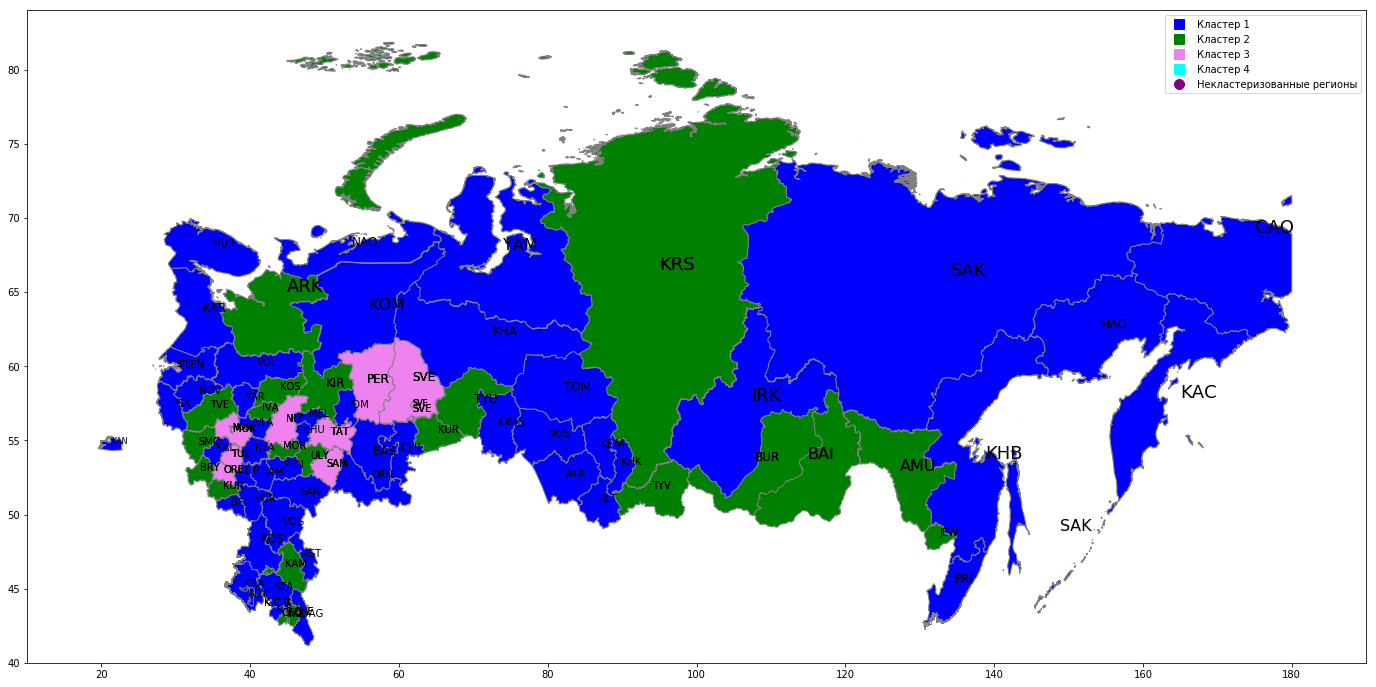


Кластер:  1
[('BEL', 'Белгородская область'), ('VLA', 'Владимирская область'), ('VOR', 'Воронежская область'), ('KAL', 'Калужская область'), ('LIP', 'Липецкая область'), ('RYA', 'Рязанская область'), ('TAM', 'Тамбовская область'), ('YAR', 'Ярославская область'), ('KAR', 'Республика Карелия'), ('KOM', 'Республика Коми'), ('NAO', 'Ненецкий автономный округ'), ('VOL', 'Вологодская область'), ('KAN', 'Калинингpадская область'), ('LEN', 'Ленинградская область'), ('MUR', 'Мурманская область'), ('NOV', 'Новгородская область'), ('PSK', 'Псковская область'), ('ADY', 'Республика Адыгея'), ('KRA', 'Краснодарский край'), ('AST', 'Астраханская область'), ('VOG', 'Волгоградская область'), ('ROS', 'Ростовская область'), ('DAG', 'Республика Дагестан'), ('K.B.R', 'Кабардино-Балкарская Республика'), ('STA', 'Ставропольский край'), ('BAS', 'Республика Башкортостан'), ('MEL', 'Республика Марий Эл'), ('UDM', 'Удмуртская Республика'), ('CHU', 'Чувашская Республика'), ('ORN', 'Оренбургская область'), ('PEN'

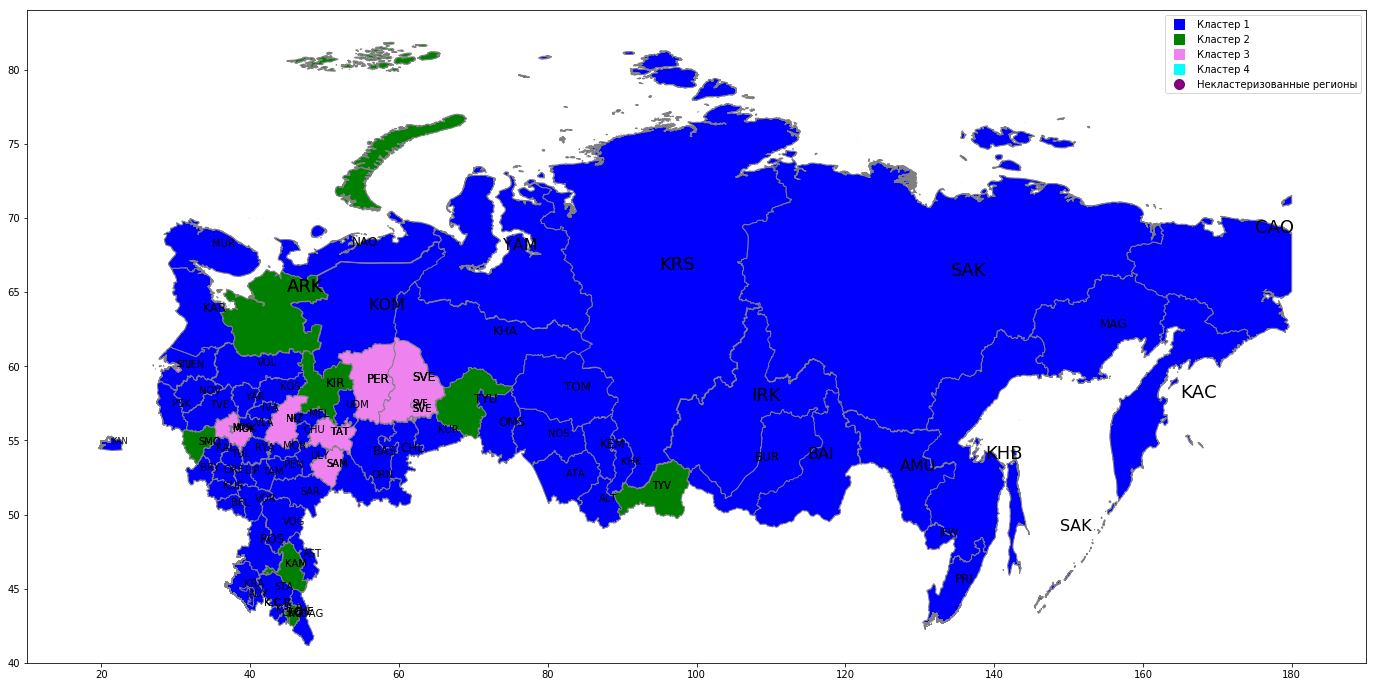


Кластер:  1
[('BEL', 'Белгородская область'), ('BRY', 'Брянская область'), ('VLA', 'Владимирская область'), ('VOR', 'Воронежская область'), ('IVA', 'Ивановская область'), ('KAL', 'Калужская область'), ('KOS', 'Костромская область'), ('KUR', 'Курская область'), ('LIP', 'Липецкая область'), ('ORE', 'Орловская область'), ('RYA', 'Рязанская область'), ('TAM', 'Тамбовская область'), ('TVE', 'Тверская область'), ('TUL', 'Тульская область'), ('YAR', 'Ярославская область'), ('KAR', 'Республика Карелия'), ('KOM', 'Республика Коми'), ('NAO', 'Ненецкий автономный округ'), ('VOL', 'Вологодская область'), ('KAN', 'Калинингpадская область'), ('LEN', 'Ленинградская область'), ('MUR', 'Мурманская область'), ('NOV', 'Новгородская область'), ('PSK', 'Псковская область'), ('ADY', 'Республика Адыгея'), ('KRA', 'Краснодарский край'), ('AST', 'Астраханская область'), ('VOG', 'Волгоградская область'), ('ROS', 'Ростовская область'), ('DAG', 'Республика Дагестан'), ('K.B.R', 'Кабардино-Балкарская Республика')

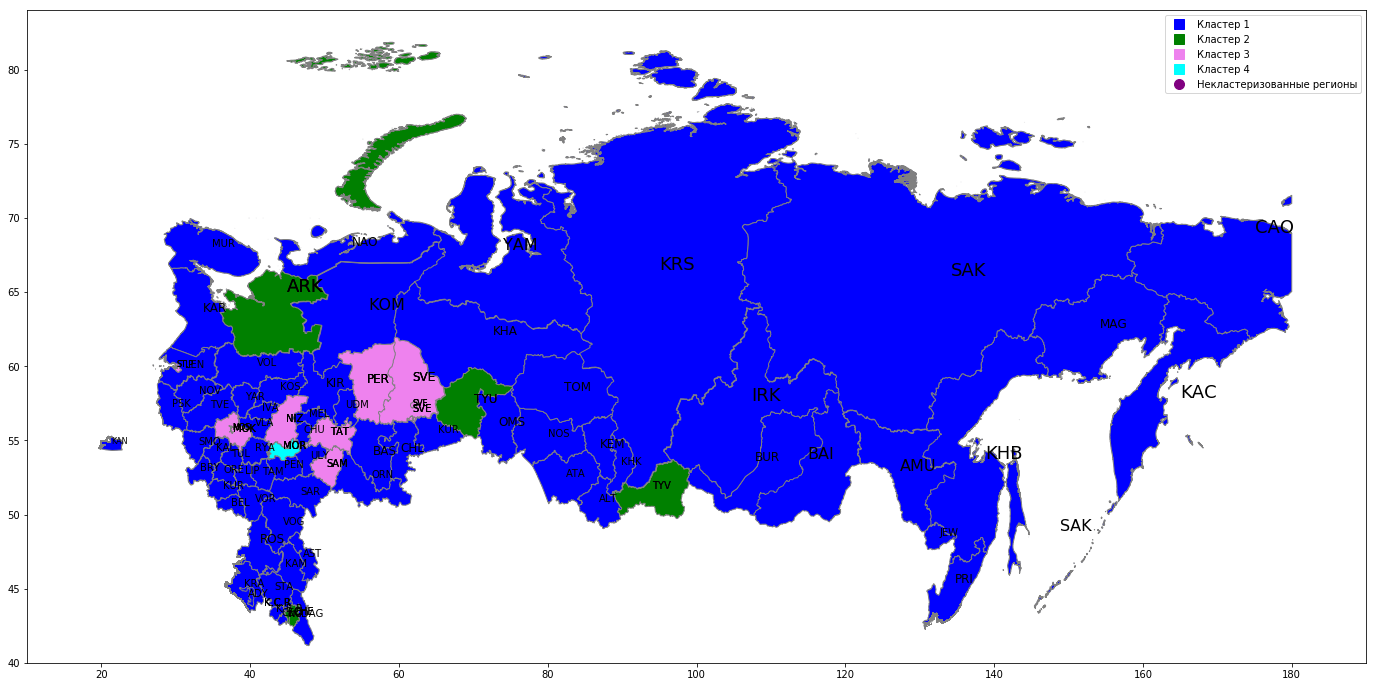


Кластер:  1
[('BEL', 'Белгородская область'), ('BRY', 'Брянская область'), ('VLA', 'Владимирская область'), ('VOR', 'Воронежская область'), ('IVA', 'Ивановская область'), ('KAL', 'Калужская область'), ('KOS', 'Костромская область'), ('KUR', 'Курская область'), ('LIP', 'Липецкая область'), ('ORE', 'Орловская область'), ('RYA', 'Рязанская область'), ('SMO', 'Смоленская область'), ('TAM', 'Тамбовская область'), ('TVE', 'Тверская область'), ('TUL', 'Тульская область'), ('YAR', 'Ярославская область'), ('KAR', 'Республика Карелия'), ('KOM', 'Республика Коми'), ('NAO', 'Ненецкий автономный округ'), ('VOL', 'Вологодская область'), ('KAN', 'Калинингpадская область'), ('LEN', 'Ленинградская область'), ('MUR', 'Мурманская область'), ('NOV', 'Новгородская область'), ('PSK', 'Псковская область'), ('ADY', 'Республика Адыгея'), ('KAM', 'Республика Калмыкия'), ('KRA', 'Краснодарский край'), ('AST', 'Астраханская область'), ('VOG', 'Волгоградская область'), ('ROS', 'Ростовская область'), ('DAG', 'Респ

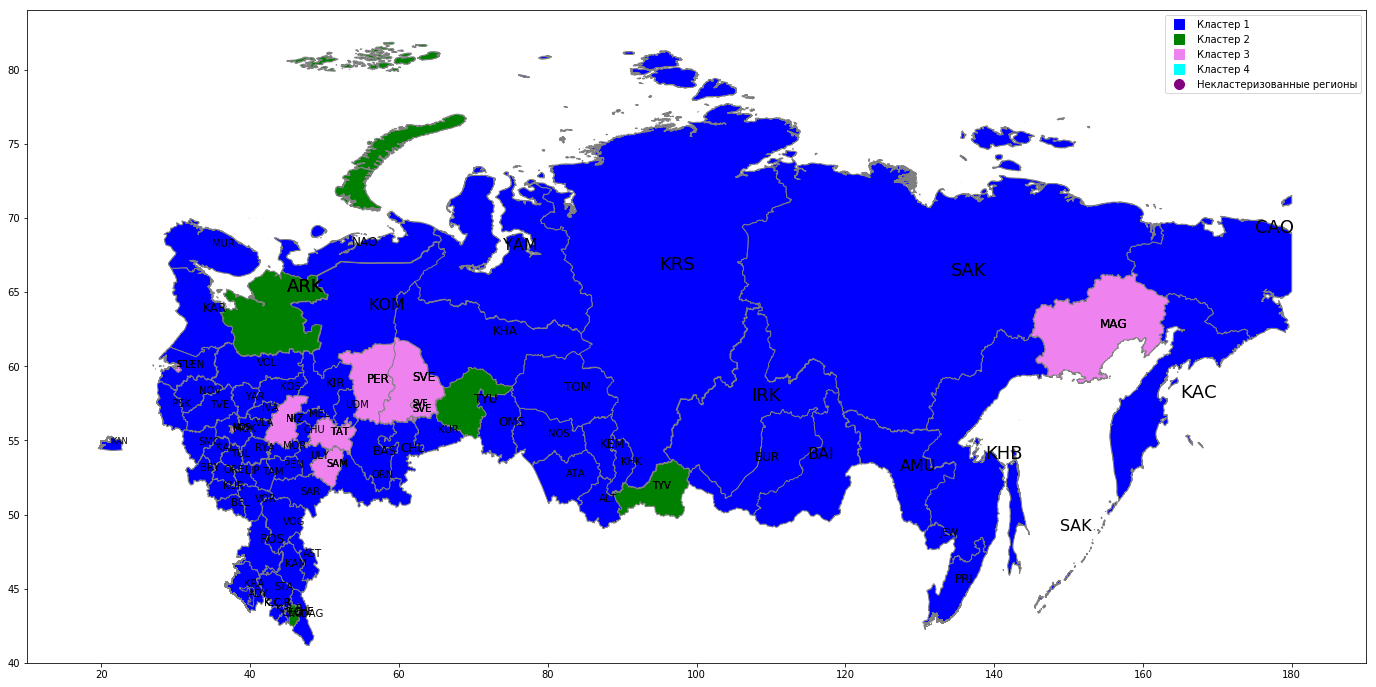


Кластер:  1
[('BEL', 'Белгородская область'), ('BRY', 'Брянская область'), ('VLA', 'Владимирская область'), ('VOR', 'Воронежская область'), ('IVA', 'Ивановская область'), ('KAL', 'Калужская область'), ('KOS', 'Костромская область'), ('KUR', 'Курская область'), ('LIP', 'Липецкая область'), ('MOK', 'Московская область'), ('ORE', 'Орловская область'), ('RYA', 'Рязанская область'), ('SMO', 'Смоленская область'), ('TAM', 'Тамбовская область'), ('TVE', 'Тверская область'), ('TUL', 'Тульская область'), ('YAR', 'Ярославская область'), ('KAR', 'Республика Карелия'), ('KOM', 'Республика Коми'), ('NAO', 'Ненецкий автономный округ'), ('VOL', 'Вологодская область'), ('KAN', 'Калинингpадская область'), ('LEN', 'Ленинградская область'), ('MUR', 'Мурманская область'), ('NOV', 'Новгородская область'), ('PSK', 'Псковская область'), ('ADY', 'Республика Адыгея'), ('KAM', 'Республика Калмыкия'), ('KRA', 'Краснодарский край'), ('AST', 'Астраханская область'), ('VOG', 'Волгоградская область'), ('ROS', 'Рост

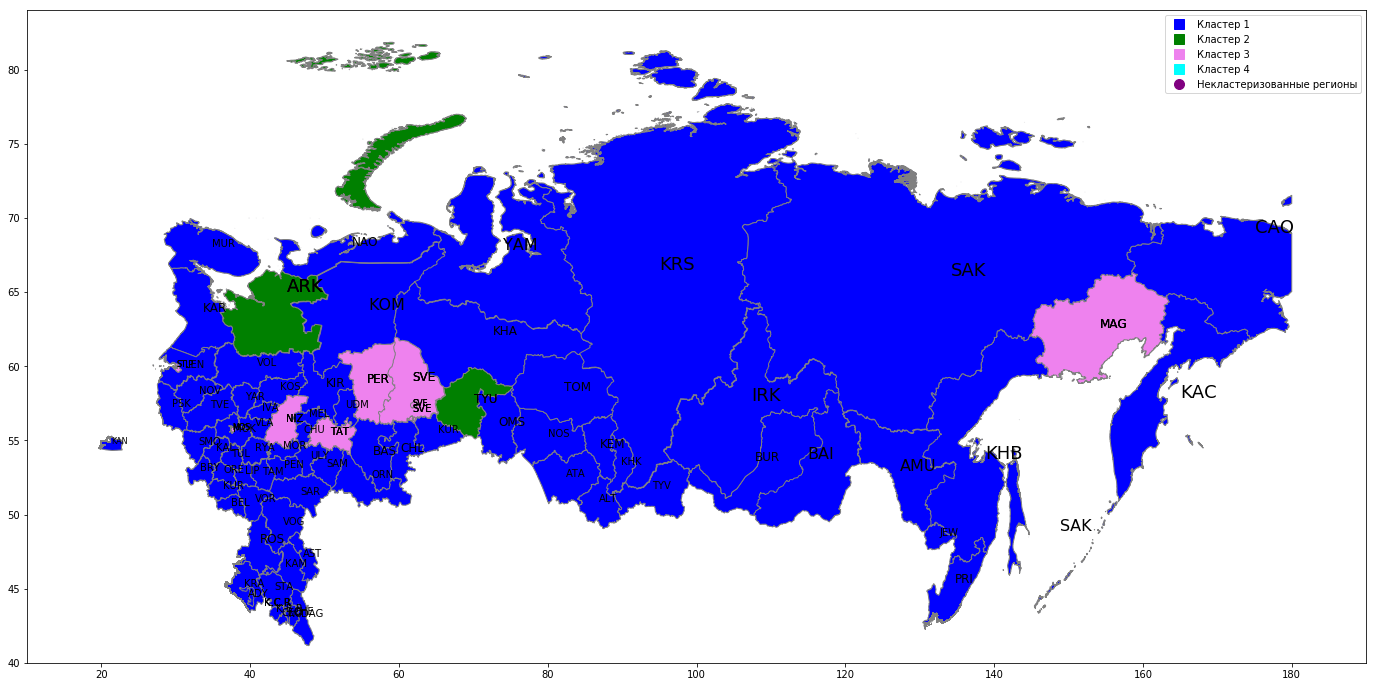


Кластер:  1
[('BEL', 'Белгородская область'), ('BRY', 'Брянская область'), ('VLA', 'Владимирская область'), ('VOR', 'Воронежская область'), ('IVA', 'Ивановская область'), ('KAL', 'Калужская область'), ('KOS', 'Костромская область'), ('KUR', 'Курская область'), ('LIP', 'Липецкая область'), ('MOK', 'Московская область'), ('ORE', 'Орловская область'), ('RYA', 'Рязанская область'), ('SMO', 'Смоленская область'), ('TAM', 'Тамбовская область'), ('TVE', 'Тверская область'), ('TUL', 'Тульская область'), ('YAR', 'Ярославская область'), ('KAR', 'Республика Карелия'), ('KOM', 'Республика Коми'), ('NAO', 'Ненецкий автономный округ'), ('VOL', 'Вологодская область'), ('KAN', 'Калинингpадская область'), ('LEN', 'Ленинградская область'), ('MUR', 'Мурманская область'), ('NOV', 'Новгородская область'), ('PSK', 'Псковская область'), ('ADY', 'Республика Адыгея'), ('KAM', 'Республика Калмыкия'), ('KRA', 'Краснодарский край'), ('AST', 'Астраханская область'), ('VOG', 'Волгоградская область'), ('ROS', 'Рост

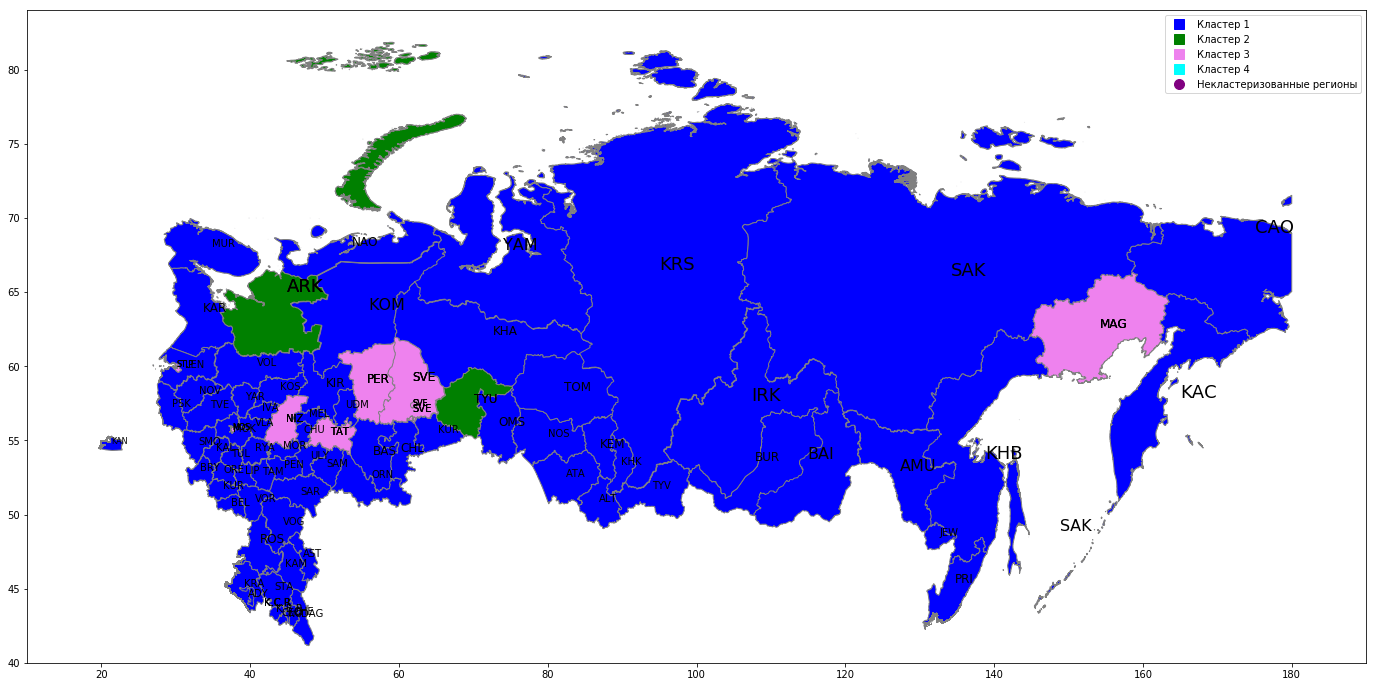


Кластер:  1
[('BEL', 'Белгородская область'), ('BRY', 'Брянская область'), ('VLA', 'Владимирская область'), ('VOR', 'Воронежская область'), ('IVA', 'Ивановская область'), ('KAL', 'Калужская область'), ('KOS', 'Костромская область'), ('KUR', 'Курская область'), ('LIP', 'Липецкая область'), ('MOK', 'Московская область'), ('ORE', 'Орловская область'), ('RYA', 'Рязанская область'), ('SMO', 'Смоленская область'), ('TAM', 'Тамбовская область'), ('TVE', 'Тверская область'), ('TUL', 'Тульская область'), ('YAR', 'Ярославская область'), ('KAR', 'Республика Карелия'), ('KOM', 'Республика Коми'), ('NAO', 'Ненецкий автономный округ'), ('VOL', 'Вологодская область'), ('KAN', 'Калинингpадская область'), ('LEN', 'Ленинградская область'), ('MUR', 'Мурманская область'), ('NOV', 'Новгородская область'), ('PSK', 'Псковская область'), ('ADY', 'Республика Адыгея'), ('KAM', 'Республика Калмыкия'), ('KRA', 'Краснодарский край'), ('AST', 'Астраханская область'), ('VOG', 'Волгоградская область'), ('ROS', 'Рост

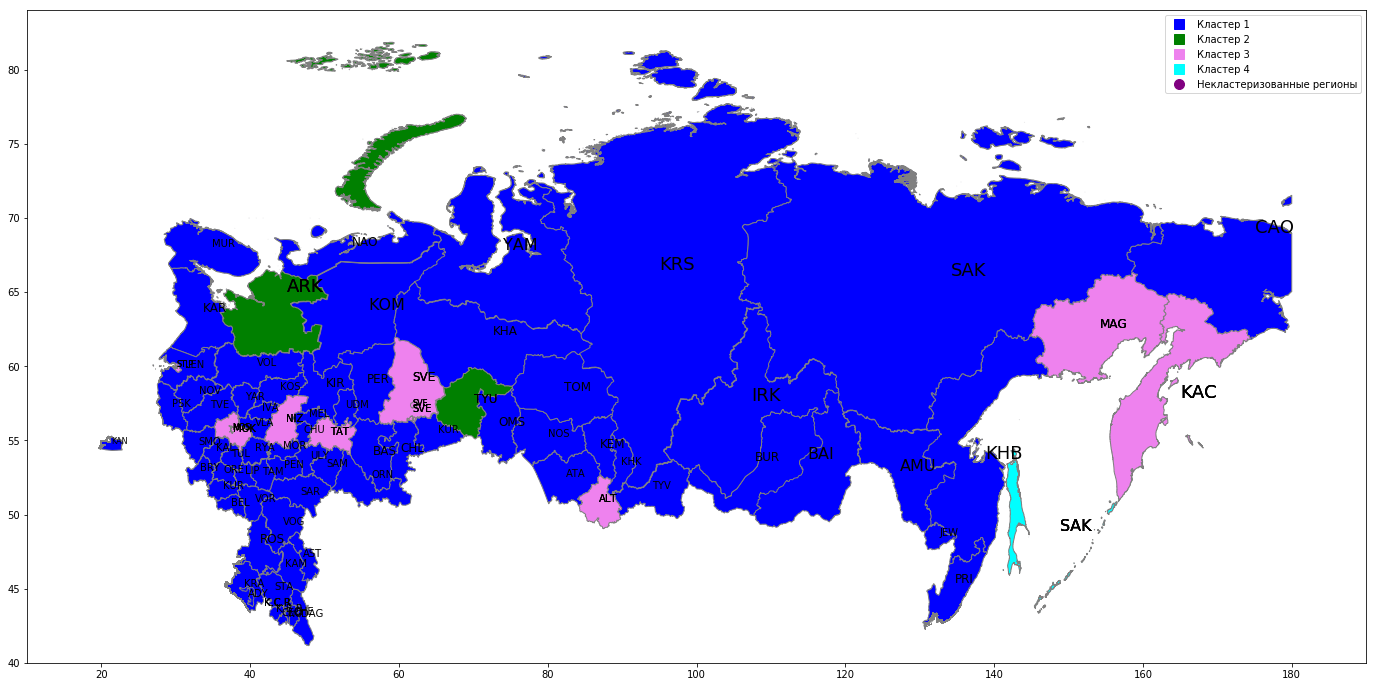


Кластер:  1
[('BEL', 'Белгородская область'), ('BRY', 'Брянская область'), ('VLA', 'Владимирская область'), ('VOR', 'Воронежская область'), ('IVA', 'Ивановская область'), ('KAL', 'Калужская область'), ('KOS', 'Костромская область'), ('KUR', 'Курская область'), ('LIP', 'Липецкая область'), ('ORE', 'Орловская область'), ('RYA', 'Рязанская область'), ('SMO', 'Смоленская область'), ('TAM', 'Тамбовская область'), ('TVE', 'Тверская область'), ('TUL', 'Тульская область'), ('YAR', 'Ярославская область'), ('KAR', 'Республика Карелия'), ('KOM', 'Республика Коми'), ('NAO', 'Ненецкий автономный округ'), ('VOL', 'Вологодская область'), ('KAN', 'Калинингpадская область'), ('LEN', 'Ленинградская область'), ('MUR', 'Мурманская область'), ('NOV', 'Новгородская область'), ('PSK', 'Псковская область'), ('ADY', 'Республика Адыгея'), ('KAM', 'Республика Калмыкия'), ('KRA', 'Краснодарский край'), ('AST', 'Астраханская область'), ('VOG', 'Волгоградская область'), ('ROS', 'Ростовская область'), ('DAG', 'Респ

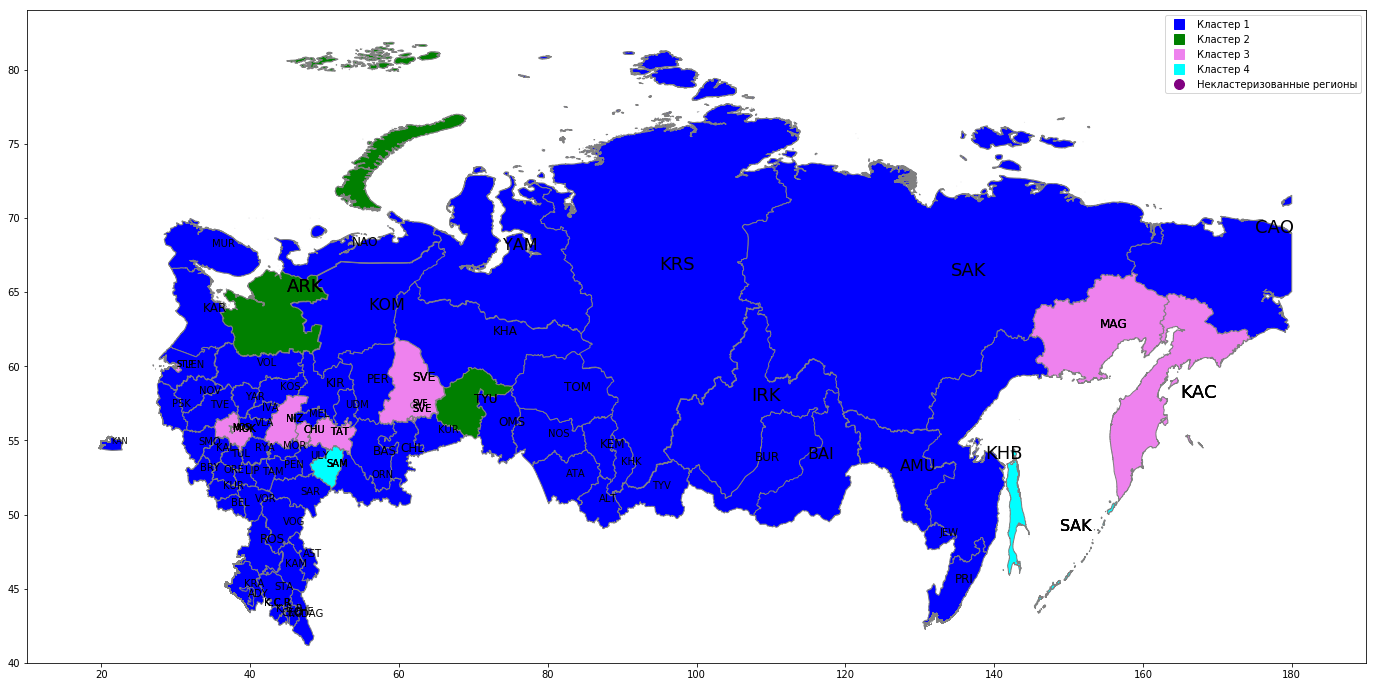


Кластер:  1
[('BEL', 'Белгородская область'), ('BRY', 'Брянская область'), ('VLA', 'Владимирская область'), ('VOR', 'Воронежская область'), ('IVA', 'Ивановская область'), ('KAL', 'Калужская область'), ('KOS', 'Костромская область'), ('KUR', 'Курская область'), ('LIP', 'Липецкая область'), ('ORE', 'Орловская область'), ('RYA', 'Рязанская область'), ('SMO', 'Смоленская область'), ('TAM', 'Тамбовская область'), ('TVE', 'Тверская область'), ('TUL', 'Тульская область'), ('YAR', 'Ярославская область'), ('KAR', 'Республика Карелия'), ('KOM', 'Республика Коми'), ('NAO', 'Ненецкий автономный округ'), ('VOL', 'Вологодская область'), ('KAN', 'Калинингpадская область'), ('LEN', 'Ленинградская область'), ('MUR', 'Мурманская область'), ('NOV', 'Новгородская область'), ('PSK', 'Псковская область'), ('ADY', 'Республика Адыгея'), ('KAM', 'Республика Калмыкия'), ('KRA', 'Краснодарский край'), ('AST', 'Астраханская область'), ('VOG', 'Волгоградская область'), ('ROS', 'Ростовская область'), ('DAG', 'Респ

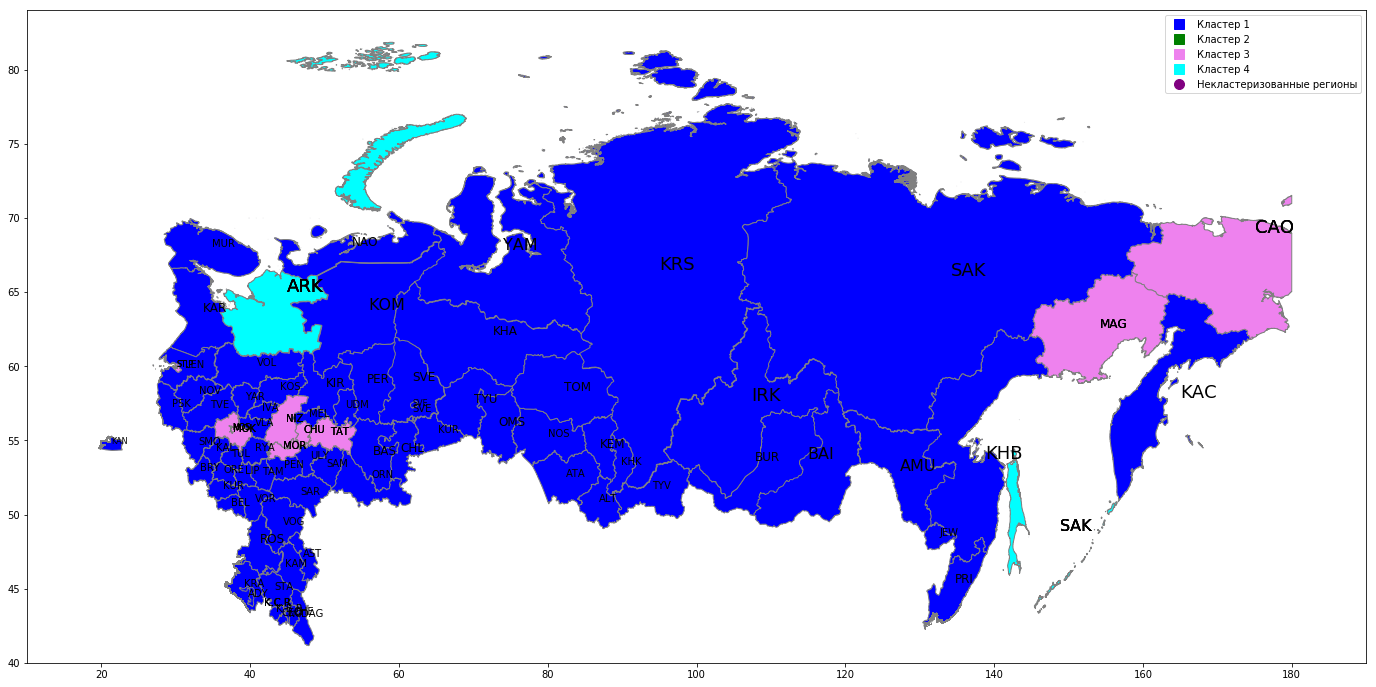


Кластер:  1
[('BEL', 'Белгородская область'), ('BRY', 'Брянская область'), ('VLA', 'Владимирская область'), ('VOR', 'Воронежская область'), ('IVA', 'Ивановская область'), ('KAL', 'Калужская область'), ('KOS', 'Костромская область'), ('KUR', 'Курская область'), ('LIP', 'Липецкая область'), ('ORE', 'Орловская область'), ('RYA', 'Рязанская область'), ('SMO', 'Смоленская область'), ('TAM', 'Тамбовская область'), ('TVE', 'Тверская область'), ('TUL', 'Тульская область'), ('YAR', 'Ярославская область'), ('KAR', 'Республика Карелия'), ('KOM', 'Республика Коми'), ('NAO', 'Ненецкий автономный округ'), ('VOL', 'Вологодская область'), ('KAN', 'Калинингpадская область'), ('LEN', 'Ленинградская область'), ('MUR', 'Мурманская область'), ('NOV', 'Новгородская область'), ('PSK', 'Псковская область'), ('ADY', 'Республика Адыгея'), ('KAM', 'Республика Калмыкия'), ('KRA', 'Краснодарский край'), ('AST', 'Астраханская область'), ('VOG', 'Волгоградская область'), ('ROS', 'Ростовская область'), ('DAG', 'Респ

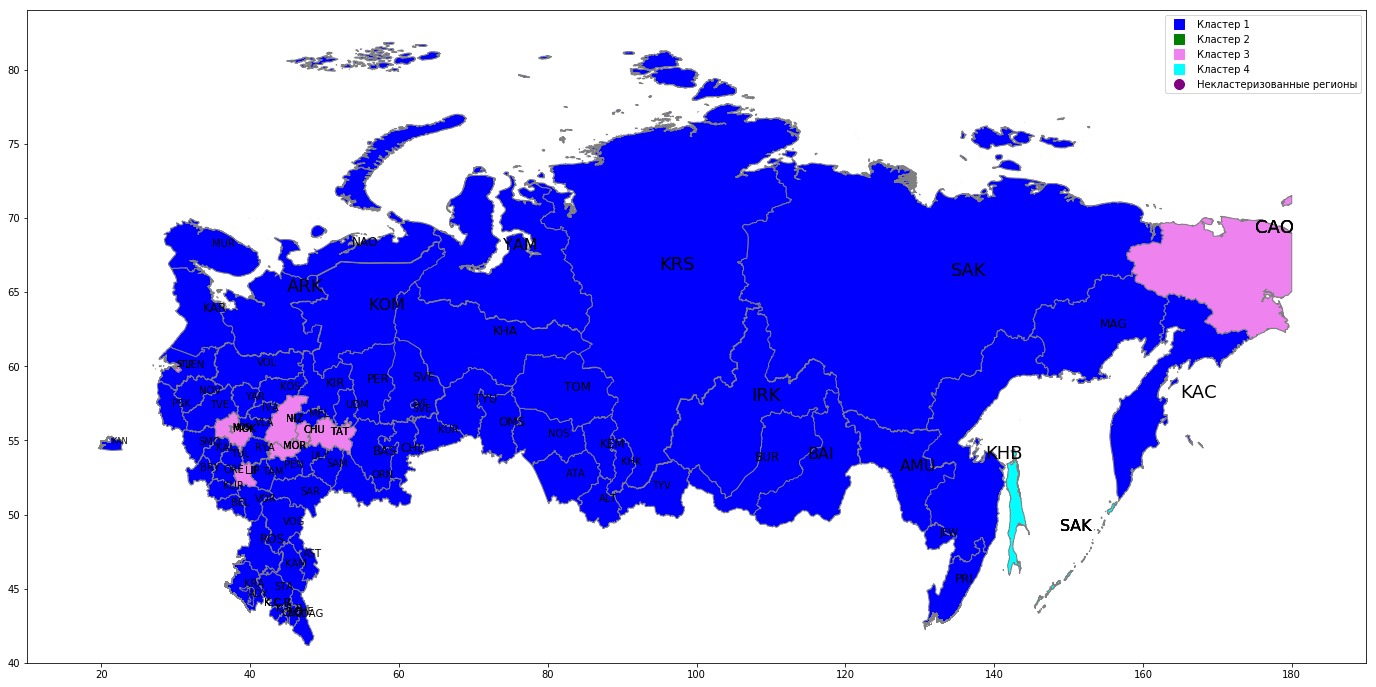


Кластер:  1
[('BEL', 'Белгородская область'), ('BRY', 'Брянская область'), ('VLA', 'Владимирская область'), ('VOR', 'Воронежская область'), ('IVA', 'Ивановская область'), ('KAL', 'Калужская область'), ('KOS', 'Костромская область'), ('KUR', 'Курская область'), ('ORE', 'Орловская область'), ('RYA', 'Рязанская область'), ('SMO', 'Смоленская область'), ('TAM', 'Тамбовская область'), ('TVE', 'Тверская область'), ('TUL', 'Тульская область'), ('YAR', 'Ярославская область'), ('KAR', 'Республика Карелия'), ('KOM', 'Республика Коми'), ('ARK', 'Архангельская область'), ('NAO', 'Ненецкий автономный округ'), ('VOL', 'Вологодская область'), ('KAN', 'Калинингpадская область'), ('LEN', 'Ленинградская область'), ('MUR', 'Мурманская область'), ('NOV', 'Новгородская область'), ('PSK', 'Псковская область'), ('ADY', 'Республика Адыгея'), ('KAM', 'Республика Калмыкия'), ('KRA', 'Краснодарский край'), ('AST', 'Астраханская область'), ('VOG', 'Волгоградская область'), ('ROS', 'Ростовская область'), ('DAG', 

In [176]:
for year in years:
    print("Год: ", year)
    draw_clustered_regions(
        clustered_map_indexes[year],
        map_codes_indexes_bijection,
        region_codes_description,
        ['blue', 'green', 'violet', 'cyan'],
        rus_adm_units_shapes
    )
    for i, year_clustered_names_with_codes in enumerate(
        clustered_names_to_codes_bijection[year]
    ):
        print("\nКластер: ", i + 1)
        print(year_clustered_names_with_codes)

Глядя на карты мы можем сделать ещё несколько выводов:
\begin{enumerate}
\item Большая часть \verb'"Отстающих"' или \verb'"Аномальных"' регионов отстаят далеко от административного центра - Московского региона. Отстающие - в основном некоторые регионы крайнего севера, либо же - республики Кавказа. Аномальные - Сибирь, Дальний восток.
\item Большая часть \verb'"Лидеров"' - центральная Россия, Урал, юг Поволжья: Москва, Свердловская область, Татарстан то есть наиболее богатые/населённые  административные единицы Российской Федерации.
\end{enumerate}
Так же стоить заметить, что в ходе работы выявлено несколько требующих дальнейшего изучения моментов. Прояснение причин перехода регионов из кластера в кластер, дополниетельное исследование регионов относящихся к кластеру 4 (с \verb'"аномальной"' иновационной активностью, имелеет и теоретический и, возможно, практический смысл, но явно выходит за рамки данной работы.

\addcontentsline{toc}{section}{Список источников}
\begin{thebibliography}{}
    \bibitem{litlink0} \href{http://sebastianraschka.com/Articles/2014_kernel_density_est.html}{ Sebastian Raschka. Kernel density estimation via the Parzen-Rosenblatt window method. Очень понятное объяснение того что такое Парзеновское окно и что такое kernel-функция}
    \bibitem{litlink1} \href{https://web.stanford.edu/~hastie/ElemStatLearn/} {Trevor Hastie Robert Tibshirani Jerome Friedman. The Elements of Statistical Learning.  Фундаментальное введение в методы машинного обучения. Наиболее известная книга в этой области.}
    \bibitem{litlink2} \href{https://saravananthirumuruganathan.wordpress.com/about/} { Saravanan Thirumuruganathan. Introduction To Mean Shift Algorithm. Неформальное введение в MeanShift алгоритм c ссылками для дальнейшего изучения}
    \bibitem{litlink3} \href{https://datascience.stackexchange.com/questions/10228/gini-impurity-vs-entropy} {Gini Impurity vs Entropy. Вопрос на Stackexchange с краткими и ясными ответами и всеми необходимыми ссылками}
    \bibitem{litlink4} \href{https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm} {Leo Breiman and Adele Cutler. Random Forests. Описание Random Forest алгоритма от его авторов}
    \bibitem{litlink5} \href{http://scikit-learn.org/stable/documentation.html} {Документация библиотеки ScikitLearn Содержит так же огромное количество теоретических сведений и ссылок для дальнейшего изучения}
    \bibitem{litlink6} \href{https://en.wikipedia.org/wiki/Decision_tree_learning} {Decision tree learning. Статья о деревьях решений в машинном обучении}
    \bibitem{litlink7} \href{https://www.amazon.com/Python-Machine-Learning-Sebastian-Raschka/dp/1783555130} {	Sebastian Raschka. Python Machine Learning. Практическое введени в машинное обучение с использованием языка Python. Лучшее сочетание практичности и строгости изложения.}
\end{thebibliography}